In [1]:
import os
import earthaccess
from earthaccess import DataGranules, DataCollections
import pandas as pd
import geopandas as gp
import numpy as np
import xarray as xr
#import syso
from usgs import api
earthaccess.login(strategy = 'netrc')
#earthaccess.login(strategy = 'interactive', persist = True)

/home/slsmit34/.conda/envs/Py38/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Download MODIS LST of Maryland and get seasonal composite maps of different counties

### 1. Download the MODIS LST from EarthAccess

In [3]:
earthaccess.login(strategy = 'netrc')
#earthaccess.login(strategy = 'interactive', persist = True)

#### Get the shapefile

<Axes: >

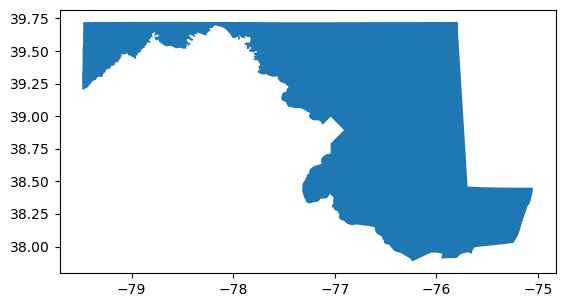

In [2]:
# MD boundary to retrieve files in
import geopandas as gpd
shapefile_path = "/panfs/ccds02/nobackup/people/slsmit34/shapefiles/md_stateBoundary/Maryland_Political_Boundaries_-_State_Boundary.shp"
gdf = gpd.read_file(shapefile_path)
gdf = gdf.to_crs("EPSG:4326")
geom = gdf.geometry.unary_union
gdf.plot()

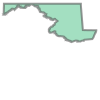

In [8]:
geom

In [5]:
#Get the max and min to crop by
minx, miny, maxx, maxy = geom.bounds
print('Cropping parameters for download')
minx, miny, maxx, maxy

Cropping parameters for download


(-79.4873028815064, 37.8865300198836, -75.04920140727783, 39.722874421633605)

#### Search EarthAccess, Download Scenes

In [5]:
# POINT
years = np.arange(2021,2025,1)
for year in years:
    print(year)
    #query scenes
    results = earthaccess.search_data(
        short_name="MYD11A1",
        #bounding_box = (-79.55859,36.91146,-75.11133,40.11025), #Maryland box   
        bounding_box=(minx, miny, maxx, maxy),
        temporal=(f'{year}-01-01',f'{year+1}-01-01'), 
        #cloud_cover = (0,50), #give min and max cloud cover range
        count=800
    )
    results_df = pd.json_normalize(results)
    results_df.to_csv(f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/MODISA_LST/{year}/{year}_dwld_info.csv')
    results_df.head()

    #Download scenes
    i = 0
    while i < len(results):
        #download file:
        print(f'[{i}] Processing...')
        try: earthaccess.download(results[i],f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/MODISA_LST/{year}')
        except: 
            print('---failed... retrying')
            earthaccess.download(results[i],f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/MODISA_LST/{year}')
        i = i+1

2021
Granules found: 731
[0] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1415.08it/s]


File MYD11A1.A2021001.h12v05.061.2021040150946.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3551.49it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 25731.93it/s]


[1] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 5115.00it/s]


File MYD11A1.A2021001.h11v05.061.2021040151033.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 20262.34it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32768.00it/s]


[2] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 5614.86it/s]


File MYD11A1.A2021002.h11v05.061.2021040152711.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 18808.54it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[3] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2475.98it/s]


File MYD11A1.A2021002.h12v05.061.2021040152725.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 20068.44it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[4] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2025.26it/s]


File MYD11A1.A2021003.h12v05.061.2021040171731.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 21509.25it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35544.95it/s]


[5] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 5722.11it/s]


File MYD11A1.A2021003.h11v05.061.2021040171627.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 21959.71it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[6] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2003.01it/s]


File MYD11A1.A2021004.h12v05.061.2021040173704.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 23045.63it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35544.95it/s]


[7] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 5309.25it/s]


File MYD11A1.A2021004.h11v05.061.2021040173937.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 22192.08it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32263.88it/s]


[8] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2242.94it/s]


File MYD11A1.A2021005.h11v05.061.2021040192819.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 23831.27it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 36792.14it/s]


[9] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1854.25it/s]


File MYD11A1.A2021005.h12v05.061.2021040192823.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 23431.87it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35544.95it/s]


[10] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 6204.59it/s]


File MYD11A1.A2021006.h11v05.061.2021040194337.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 24672.38it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 36792.14it/s]


[11] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 6204.59it/s]


File MYD11A1.A2021006.h12v05.061.2021040194411.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 24385.49it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 36472.21it/s]


[12] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2066.16it/s]


File MYD11A1.A2021007.h12v05.061.2021040205833.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 23967.45it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 37449.14it/s]


[13] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 6026.30it/s]


File MYD11A1.A2021007.h11v05.061.2021040205838.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 22550.02it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[14] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2326.29it/s]


File MYD11A1.A2021008.h12v05.061.2021040210919.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 22671.91it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[15] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2155.35it/s]


File MYD11A1.A2021008.h11v05.061.2021040210949.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 22429.43it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 36472.21it/s]


[16] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3401.71it/s]


File MYD11A1.A2021009.h12v05.061.2021040224219.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 24528.09it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 36157.79it/s]


[17] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 6374.32it/s]


File MYD11A1.A2021009.h11v05.061.2021040224155.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 24244.53it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 36792.14it/s]


[18] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2152.03it/s]


File MYD11A1.A2021010.h12v05.061.2021040224819.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 22671.91it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[19] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2577.94it/s]


File MYD11A1.A2021010.h11v05.061.2021040224819.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 22671.91it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 37449.14it/s]


[20] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1589.96it/s]


File MYD11A1.A2021011.h11v05.061.2021041001211.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 23696.63it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 37117.73it/s]


[21] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 6009.03it/s]


File MYD11A1.A2021011.h12v05.061.2021041001220.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 23563.51it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 36157.79it/s]


[22] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 5924.16it/s]


File MYD11A1.A2021012.h12v05.061.2021041002334.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 22429.43it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 36472.21it/s]


[23] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 6765.01it/s]


File MYD11A1.A2021012.h11v05.061.2021041002306.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 23563.51it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[24] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2442.81it/s]


File MYD11A1.A2021013.h11v05.061.2021041015505.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 23696.63it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[25] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 6000.43it/s]


File MYD11A1.A2021013.h12v05.061.2021041015534.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 25115.59it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 36472.21it/s]


[26] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2183.40it/s]


File MYD11A1.A2021014.h12v05.061.2021041020130.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 23563.51it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35848.75it/s]


[27] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 6462.72it/s]


File MYD11A1.A2021014.h11v05.061.2021041020201.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 24385.49it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 36792.14it/s]


[28] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2098.20it/s]


File MYD11A1.A2021015.h12v05.061.2021041052105.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 24385.49it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 36472.21it/s]


[29] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2042.02it/s]


File MYD11A1.A2021015.h11v05.061.2021041052149.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 24244.53it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 37449.14it/s]


[30] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 6754.11it/s]


File MYD11A1.A2021016.h12v05.061.2021041053235.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 24818.37it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 36157.79it/s]


[31] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4068.19it/s]


File MYD11A1.A2021016.h11v05.061.2021041053301.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 24672.38it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 36792.14it/s]


[32] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 6831.11it/s]


File MYD11A1.A2021017.h11v05.061.2021041063327.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 24672.38it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 36157.79it/s]


[33] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 6887.20it/s]


File MYD11A1.A2021017.h12v05.061.2021041063422.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 24818.37it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 36472.21it/s]


[34] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2084.64it/s]


File MYD11A1.A2021018.h12v05.061.2021041064051.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 24672.38it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 36157.79it/s]


[35] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2538.92it/s]


File MYD11A1.A2021018.h11v05.061.2021041064200.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 23696.63it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35848.75it/s]


[36] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 5857.97it/s]


File MYD11A1.A2021019.h12v05.061.2021041080405.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 24244.53it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35848.75it/s]


[37] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 6393.76it/s]


File MYD11A1.A2021019.h11v05.061.2021041080452.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 24385.49it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 36157.79it/s]


[38] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1574.44it/s]


File MYD11A1.A2021020.h11v05.061.2021041081532.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 23967.45it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 36157.79it/s]


[39] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2616.53it/s]


File MYD11A1.A2021020.h12v05.061.2021041081646.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 24105.20it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 36157.79it/s]


[40] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 6355.01it/s]


File MYD11A1.A2021021.h12v05.061.2021041092132.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 24966.10it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35848.75it/s]


[41] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 6482.70it/s]


File MYD11A1.A2021021.h11v05.061.2021041092108.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 23172.95it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34663.67it/s]


[42] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2234.58it/s]


File MYD11A1.A2021022.h12v05.061.2021041092529.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 24105.20it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 36472.21it/s]


[43] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 6492.73it/s]


File MYD11A1.A2021022.h11v05.061.2021041092622.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 24966.10it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35848.75it/s]


[44] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 6492.73it/s]


File MYD11A1.A2021023.h12v05.061.2021041103231.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 23563.51it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[45] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2455.68it/s]


File MYD11A1.A2021023.h11v05.061.2021041103314.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 23045.63it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27413.75it/s]


[46] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2581.11it/s]


File MYD11A1.A2021024.h11v05.061.2021041103943.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 23431.87it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 36472.21it/s]


[47] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2264.74it/s]


File MYD11A1.A2021024.h12v05.061.2021041103913.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 24818.37it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 37117.73it/s]


[48] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4036.87it/s]


File MYD11A1.A2021025.h11v05.061.2021041114751.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 24385.49it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 36157.79it/s]


[49] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2571.61it/s]


File MYD11A1.A2021025.h12v05.061.2021041114703.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 24528.09it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 37117.73it/s]


[50] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2056.03it/s]


File MYD11A1.A2021026.h12v05.061.2021041115744.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 24528.09it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35544.95it/s]


[51] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 6413.31it/s]


File MYD11A1.A2021026.h11v05.061.2021041115826.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 23831.27it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35544.95it/s]


[52] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 6512.89it/s]


File MYD11A1.A2021027.h12v05.061.2021041125718.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 23172.95it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35544.95it/s]


[53] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 6797.90it/s]

File MYD11A1.A2021027.h11v05.061.2021041125758.hdf already downloaded



PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 21845.33it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[54] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1556.91it/s]


File MYD11A1.A2021028.h12v05.061.2021041130933.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 23967.45it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35848.75it/s]


[55] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1587.55it/s]


File MYD11A1.A2021028.h11v05.061.2021041130936.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 23967.45it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 36157.79it/s]


[56] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2470.14it/s]

File MYD11A1.A2021029.h11v05.061.2021041141055.hdf already downloaded



PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 23696.63it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31068.92it/s]


[57] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2156.45it/s]


File MYD11A1.A2021029.h12v05.061.2021041141116.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 23563.51it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 36472.21it/s]


[58] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 6543.38it/s]

File MYD11A1.A2021030.h12v05.061.2021041142106.hdf already downloaded



PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 23831.27it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34663.67it/s]


[59] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 6017.65it/s]

File MYD11A1.A2021030.h11v05.061.2021041142132.hdf already downloaded



PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 22795.13it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 36792.14it/s]


[60] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2680.07it/s]


File MYD11A1.A2021031.h11v05.061.2021041154754.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 23967.45it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35848.75it/s]


[61] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2152.03it/s]


File MYD11A1.A2021031.h12v05.061.2021041154806.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 23563.51it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34663.67it/s]


[62] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1954.48it/s]


File MYD11A1.A2021032.h12v05.061.2021042222129.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 23967.45it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 36792.14it/s]


[63] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2383.13it/s]


File MYD11A1.A2021032.h11v05.061.2021042222207.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 23696.63it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 36792.14it/s]


[64] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2222.74it/s]


File MYD11A1.A2021033.h12v05.061.2021042223208.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 24385.49it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 37117.73it/s]


[65] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 6159.04it/s]


File MYD11A1.A2021033.h11v05.061.2021042223123.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 23967.45it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35848.75it/s]


[66] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2162.01it/s]


File MYD11A1.A2021034.h12v05.061.2021042224017.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 22919.69it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[67] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4140.48it/s]


File MYD11A1.A2021034.h11v05.061.2021042223919.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 23696.63it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32768.00it/s]


[68] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3741.57it/s]


File MYD11A1.A2021035.h12v05.061.2021042224516.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 24105.20it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32768.00it/s]


[69] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2853.27it/s]


File MYD11A1.A2021035.h11v05.061.2021042224550.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 23831.27it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[70] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2269.65it/s]

File MYD11A1.A2021036.h12v05.061.2021042225359.hdf already downloaded



PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 22795.13it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 36472.21it/s]


[71] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 5817.34it/s]

File MYD11A1.A2021036.h11v05.061.2021042225439.hdf already downloaded



PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 23172.95it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 36792.14it/s]


[72] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 5890.88it/s]


File MYD11A1.A2021037.h11v05.061.2021042230236.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 22550.02it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 36157.79it/s]


[73] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2040.03it/s]


File MYD11A1.A2021037.h12v05.061.2021042230259.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 23696.63it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 36472.21it/s]


[74] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

File MYD11A1.A2021038.h11v05.061.2021042231129.hdf already downloaded

QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4029.11it/s]


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 24244.53it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[75] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 6132.02it/s]


File MYD11A1.A2021038.h12v05.061.2021042231044.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 23831.27it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 37117.73it/s]


[76] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2868.88it/s]


File MYD11A1.A2021039.h12v05.061.2021042231940.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 24385.49it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 36472.21it/s]


[77] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2283.24it/s]


File MYD11A1.A2021039.h11v05.061.2021042231936.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 24385.49it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 37117.73it/s]


[78] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2289.47it/s]


File MYD11A1.A2021040.h12v05.061.2021042222736.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 24105.20it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 37449.14it/s]


[79] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4044.65it/s]


File MYD11A1.A2021040.h11v05.061.2021042222730.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 18808.54it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 36157.79it/s]


[80] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2943.37it/s]


File MYD11A1.A2021041.h11v05.061.2021042223604.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 23967.45it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 37449.14it/s]


[81] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 5706.54it/s]


File MYD11A1.A2021041.h12v05.061.2021042223516.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 23831.27it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 36157.79it/s]


[82] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2194.82it/s]


File MYD11A1.A2021042.h12v05.061.2021043174008.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 23696.63it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 36157.79it/s]

[83] Processing...
 Getting 1 granules, approx download size: 0.0 GB



QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 5890.88it/s]


File MYD11A1.A2021042.h11v05.061.2021043173938.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 24105.20it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35544.95it/s]


[84] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2642.91it/s]


File MYD11A1.A2021043.h12v05.061.2021044165753.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 23301.69it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32513.98it/s]


[85] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

File MYD11A1.A2021043.h11v05.061.2021044165821.hdf already downloaded


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 189.45it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 23696.63it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35848.75it/s]


[86] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2730.67it/s]


File MYD11A1.A2021044.h11v05.061.2021045170616.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 24244.53it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35246.25it/s]


[87] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 5857.97it/s]


File MYD11A1.A2021044.h12v05.061.2021045170611.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 23831.27it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 36157.79it/s]


[88] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2593.88it/s]


File MYD11A1.A2021045.h12v05.061.2021046173530.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 22192.08it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 36472.21it/s]


[89] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3865.72it/s]


File MYD11A1.A2021045.h11v05.061.2021046173600.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 22795.13it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[90] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 6423.13it/s]


File MYD11A1.A2021046.h12v05.061.2021047195851.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 23967.45it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35544.95it/s]


[91] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 5874.38it/s]


File MYD11A1.A2021046.h11v05.061.2021047195848.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 23696.63it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 36157.79it/s]


[92] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1864.14it/s]


File MYD11A1.A2021047.h11v05.061.2021048173216.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 23831.27it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 36157.79it/s]


[93] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3054.85it/s]


File MYD11A1.A2021047.h12v05.061.2021048173248.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 23563.51it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 36472.21it/s]


[94] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2357.68it/s]


File MYD11A1.A2021048.h12v05.061.2021061165113.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 23172.95it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[95] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 6335.81it/s]


File MYD11A1.A2021048.h11v05.061.2021061165103.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 22550.02it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[96] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 5289.16it/s]


File MYD11A1.A2021049.h11v05.061.2021061204958.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 23563.51it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[97] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

File MYD11A1.A2021049.h12v05.061.2021061205051.hdf already downloaded


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2020.38it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 22919.69it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 36472.21it/s]


[98] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4190.11it/s]

File MYD11A1.A2021050.h12v05.061.2021061235630.hdf already downloaded



PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 22795.13it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35848.75it/s]


[99] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 5849.80it/s]

File MYD11A1.A2021050.h11v05.061.2021061235518.hdf already downloaded



PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 22550.02it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35848.75it/s]


[100] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 5698.78it/s]

File MYD11A1.A2021051.h11v05.061.2021062013729.hdf already downloaded



PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 22919.69it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35544.95it/s]


[101] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1837.99it/s]


File MYD11A1.A2021051.h12v05.061.2021062013816.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 24105.20it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 36157.79it/s]


[102] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2428.66it/s]


File MYD11A1.A2021052.h12v05.061.2021062024045.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 23563.51it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35848.75it/s]


[103] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2231.01it/s]


File MYD11A1.A2021052.h11v05.061.2021062024025.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 23563.51it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[104] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2111.94it/s]


File MYD11A1.A2021053.h12v05.061.2021062033950.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 23696.63it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 36157.79it/s]


[105] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4132.32it/s]


File MYD11A1.A2021053.h11v05.061.2021062033952.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 24385.49it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 36157.79it/s]


[106] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2221.56it/s]


File MYD11A1.A2021054.h11v05.061.2021062041949.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 23696.63it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 36157.79it/s]


[107] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2454.24it/s]


File MYD11A1.A2021054.h12v05.061.2021062042236.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 23967.45it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 36157.79it/s]


[108] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2108.75it/s]


File MYD11A1.A2021055.h12v05.061.2021062054757.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 23967.45it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35848.75it/s]


[109] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3945.72it/s]


File MYD11A1.A2021055.h11v05.061.2021062055713.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 23831.27it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35544.95it/s]


[110] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2274.57it/s]


File MYD11A1.A2021056.h12v05.061.2021062072437.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 23831.27it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[111] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 6345.39it/s]


File MYD11A1.A2021056.h11v05.061.2021062073525.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 22192.08it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[112] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 6462.72it/s]


File MYD11A1.A2021057.h12v05.061.2021062082020.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 24105.20it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 36792.14it/s]


[113] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 6605.20it/s]


File MYD11A1.A2021057.h11v05.061.2021062082656.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 23172.95it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 37117.73it/s]


[114] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 6615.62it/s]


File MYD11A1.A2021058.h12v05.061.2021062084149.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 22429.43it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[115] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 6250.83it/s]


File MYD11A1.A2021058.h11v05.061.2021062084304.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 23831.27it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35848.75it/s]


[116] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2016.49it/s]


File MYD11A1.A2021059.h12v05.061.2021062101057.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 23967.45it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 36157.79it/s]


[117] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2486.25it/s]


File MYD11A1.A2021059.h11v05.061.2021062101213.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 23563.51it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35848.75it/s]


[118] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4084.04it/s]


File MYD11A1.A2021060.h12v05.061.2021062104247.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 23563.51it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35848.75it/s]


[119] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2205.21it/s]


File MYD11A1.A2021060.h11v05.061.2021062104317.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 22671.91it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[120] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

File MYD11A1.A2021061.h11v05.061.2021062204236.hdf already downloaded


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3945.72it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 22671.91it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 36472.21it/s]


[121] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 5966.29it/s]


File MYD11A1.A2021061.h12v05.061.2021062204221.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 23967.45it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35848.75it/s]


[122] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2513.06it/s]


File MYD11A1.A2021062.h12v05.061.2021065035620.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 21509.25it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35848.75it/s]

[123] Processing...
 Getting 1 granules, approx download size: 0.0 GB



QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

File MYD11A1.A2021062.h11v05.061.2021065035607.hdf already downloaded


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2457.12it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 22671.91it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 36792.14it/s]


[124] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

File MYD11A1.A2021063.h11v05.061.2021068002550.hdf already downloaded


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1810.23it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 22429.43it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35848.75it/s]


[125] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1473.75it/s]


File MYD11A1.A2021063.h12v05.061.2021068002649.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 22192.08it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 36157.79it/s]


[126] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2166.48it/s]


File MYD11A1.A2021064.h12v05.061.2021068042908.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 21732.15it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35246.25it/s]


[127] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 5675.65it/s]


File MYD11A1.A2021064.h11v05.061.2021068042925.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 23831.27it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[128] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2692.11it/s]


File MYD11A1.A2021065.h12v05.061.2021068093534.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 23967.45it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[129] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 5769.33it/s]

File MYD11A1.A2021065.h11v05.061.2021068093512.hdf already downloaded



PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 23045.63it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 36792.14it/s]


[130] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3994.58it/s]

File MYD11A1.A2021066.h11v05.061.2021068104457.hdf already downloaded



PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 22671.91it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 36472.21it/s]


[131] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 5555.37it/s]

File MYD11A1.A2021066.h12v05.061.2021068104453.hdf already downloaded



PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 23301.69it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32768.00it/s]


[132] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3754.97it/s]

File MYD11A1.A2021067.h11v05.061.2021068195801.hdf already downloaded



PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 22795.13it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 36472.21it/s]


[133] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 5866.16it/s]


File MYD11A1.A2021067.h12v05.061.2021068195622.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 23967.45it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 36472.21it/s]


[134] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2295.73it/s]


File MYD11A1.A2021068.h11v05.061.2021069181642.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 23831.27it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 37117.73it/s]


[135] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2047.00it/s]


File MYD11A1.A2021068.h12v05.061.2021069181800.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 23431.87it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30615.36it/s]


[136] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 5915.80it/s]

File MYD11A1.A2021069.h12v05.061.2021070190009.hdf already downloaded



PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 22795.13it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35848.75it/s]


[137] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1708.47it/s]


File MYD11A1.A2021069.h11v05.061.2021070185943.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 24105.20it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 36157.79it/s]


[138] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 6502.80it/s]


File MYD11A1.A2021070.h12v05.061.2021075075039.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 23967.45it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 36157.79it/s]


[139] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

File MYD11A1.A2021070.h11v05.061.2021075074954.hdf already downloaded


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1876.65it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 22795.13it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 36472.21it/s]


[140] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2557.50it/s]

File MYD11A1.A2021071.h12v05.061.2021075194401.hdf already downloaded



PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 22795.13it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35848.75it/s]


[141] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2165.36it/s]


File MYD11A1.A2021071.h11v05.061.2021075194457.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 22075.28it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[142] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 5949.37it/s]


File MYD11A1.A2021072.h11v05.061.2021075213125.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 24244.53it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 36157.79it/s]


[143] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 6384.02it/s]


File MYD11A1.A2021072.h12v05.061.2021075213844.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 23967.45it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 36157.79it/s]


[144] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 6316.72it/s]


File MYD11A1.A2021073.h11v05.061.2021076033015.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 23831.27it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 36472.21it/s]


[145] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 6141.00it/s]

File MYD11A1.A2021073.h12v05.061.2021076033015.hdf already downloaded



PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 23967.45it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 36472.21it/s]


[146] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 6462.72it/s]

File MYD11A1.A2021074.h11v05.061.2021076054548.hdf already downloaded



PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 23563.51it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35848.75it/s]


[147] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2685.21it/s]


File MYD11A1.A2021074.h12v05.061.2021076054536.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 24385.49it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35848.75it/s]


[148] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 6364.65it/s]

File MYD11A1.A2021075.h11v05.061.2021076184826.hdf already downloaded



PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 24244.53it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 36157.79it/s]


[149] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4410.41it/s]

File MYD11A1.A2021075.h12v05.061.2021076185254.hdf already downloaded



PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 24244.53it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 36157.79it/s]


[150] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 6052.39it/s]

File MYD11A1.A2021076.h12v05.061.2021077194414.hdf already downloaded



PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 23831.27it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[151] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2461.45it/s]


File MYD11A1.A2021076.h11v05.061.2021077194746.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 23696.63it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35544.95it/s]


[152] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2659.67it/s]


File MYD11A1.A2021077.h11v05.061.2021082124129.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 23172.95it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[153] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

File MYD11A1.A2021077.h12v05.061.2021082125003.hdf already downloaded

QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2156.45it/s]


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 22310.13it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35848.75it/s]


[154] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 6636.56it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.20s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[155] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3396.20it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.76s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[156] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4934.48it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.78s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[157] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2548.18it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.15s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31300.78it/s]


[158] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4080.06it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.75s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26886.56it/s]


[159] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2686.93it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.97s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[160] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2593.88it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.90s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[161] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1062.39it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.77s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[162] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3097.71it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.72s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27594.11it/s]


[163] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2484.78it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.57s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29959.31it/s]


[164] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2663.05it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.06s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[165] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2499.59it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.38s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26715.31it/s]


[166] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2504.06it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.71s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[167] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2587.48it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.72s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[168] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2668.13it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.65s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[169] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4639.72it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.97s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[170] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2490.68it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.83s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[171] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2661.36it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.97s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[172] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2656.30it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.70s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[173] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2451.38it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.04s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[174] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2669.83it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.40s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[175] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2601.93it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.08s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[176] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2020.38it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.84s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[177] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2637.93it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.10s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[178] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2972.58it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.95s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[179] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2280.75it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.64s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26546.23it/s]


[180] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2272.10it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.80s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 25731.93it/s]


[181] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2739.58it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.76s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[182] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1065.90it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.80s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32768.00it/s]


[183] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2788.77it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.91s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[184] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2955.82it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.97s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32263.88it/s]


[185] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2995.93it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.68s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31300.78it/s]


[186] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2884.67it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.77s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27060.03it/s]


[187] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2417.47it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.85s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32513.98it/s]


[188] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3028.38it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.00s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31300.78it/s]


[189] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2939.25it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.94s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[190] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2613.27it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.88s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26715.31it/s]


[191] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2331.46it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.40s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26051.58it/s]


[192] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2663.05it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.13s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[193] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2935.13it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.66s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32017.59it/s]


[194] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2061.08it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.61s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[195] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3248.88it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.95s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27413.75it/s]


[196] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2590.68it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.02s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 24672.38it/s]


[197] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2504.06it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.02s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27235.74it/s]


[198] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2608.40it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.86s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[199] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2534.32it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.88s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26546.23it/s]


[200] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2507.06it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.26s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29330.80it/s]


[201] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2448.51it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.60s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27060.03it/s]


[202] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1003.66it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.01s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29746.84it/s]


[203] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2702.52it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.77s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26546.23it/s]


[204] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2309.64it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.03s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30615.36it/s]


[205] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2920.82it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.61s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[206] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2574.77it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.61s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27413.75it/s]


[207] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2680.07it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.94s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32513.98it/s]


[208] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2668.13it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.70s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27413.75it/s]


[209] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2565.32it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.89s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30393.51it/s]


[210] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2759.41it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.98s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 23696.63it/s]


[211] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2525.17it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.07s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32513.98it/s]


[212] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2924.90it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.13s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[213] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2347.12it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.95s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31775.03it/s]


[214] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2619.80it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.01s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[215] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2851.33it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.79s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[216] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1076.29it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.05s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29537.35it/s]


[217] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3923.58it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.90s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31775.03it/s]


[218] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4391.94it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.73s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29127.11it/s]


[219] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2571.61it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.02s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30174.85it/s]


[220] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2513.06it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.04s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31775.03it/s]


[221] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2628.01it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.80s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27235.74it/s]


[222] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2501.08it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.64s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27413.75it/s]


[223] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1032.83it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.02s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32263.88it/s]


[224] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3352.76it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.09s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26886.56it/s]


[225] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 985.74it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.01s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29746.84it/s]


[226] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2565.32it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.77s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[227] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2548.18it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.78s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32017.59it/s]


[228] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1090.28it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.91s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31068.92it/s]


[229] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2757.60it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.71s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[230] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2407.75it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.09s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[231] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2945.44it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.02s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 25890.77it/s]


[232] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2158.67it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.09s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32768.00it/s]


[233] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2959.99it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.75s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[234] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3041.55it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.83s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[235] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3506.94it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.85s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32768.00it/s]


[236] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2912.71it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.98s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32513.98it/s]


[237] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2976.79it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.58s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[238] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2976.79it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.04s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[239] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2786.91it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.82s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32263.88it/s]


[240] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2692.11it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.68s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[241] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2822.55it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.91s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[242] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4194.30it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.57s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32017.59it/s]


[243] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3102.30it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.70s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[244] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2882.68it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.02s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31068.92it/s]


[245] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2721.81it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.78s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[246] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2931.03it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.90s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[247] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3052.62it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.92s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[248] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4975.45it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.03s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[249] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2900.63it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.75s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34952.53it/s]


[250] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1274.48it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[251] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3097.71it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.05s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26379.27it/s]


[252] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2826.35it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.93s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27060.03it/s]


[253] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3063.77it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.90s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34663.67it/s]


[254] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3066.01it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.66s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31536.12it/s]


[255] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2799.94it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.11s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32768.00it/s]


[256] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2918.79it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34952.53it/s]


[257] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3116.12it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.02s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[258] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3246.37it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.91s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32263.88it/s]


[259] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2904.64it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.83s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[260] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3054.85it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.74s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34952.53it/s]


[261] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2775.85it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.97s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31068.92it/s]


[262] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2861.05it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.80s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[263] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3151.24it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.81s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[264] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3132.42it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.73s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[265] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2955.82it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.10s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[266] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2674.94it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.71s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32263.88it/s]


[267] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3158.36it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.11s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29746.84it/s]


[268] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2841.67it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.72s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27594.11it/s]


[269] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2255.00it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.89s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29959.31it/s]


[270] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2801.81it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.83s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32513.98it/s]


[271] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3030.57it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.98s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[272] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2514.57it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.57s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26051.58it/s]


[273] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2442.81it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.97s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 22075.28it/s]


[274] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2859.10it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.55s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[275] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2611.65it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.99s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27060.03it/s]


[276] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2634.61it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.65s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[277] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3216.49it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.17s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34663.67it/s]


[278] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3218.96it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.89s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35848.75it/s]


[279] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3194.44it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.35s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[280] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2818.75it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.89s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[281] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2898.62it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.84s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34663.67it/s]


[282] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3236.35it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.87s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32263.88it/s]


[283] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2880.70it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.84s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[284] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2794.34it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.81s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[285] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3116.12it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.97s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[286] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4410.41it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.69s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32263.88it/s]


[287] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3331.46it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.13s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[288] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3153.61it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.08s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35544.95it/s]


[289] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3187.16it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.80s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32263.88it/s]


[290] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2861.05it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.83s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35246.25it/s]


[291] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4860.14it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.17s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[292] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3070.50it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.78s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 17260.51it/s]


[293] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3066.01it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.05s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[294] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4777.11it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.87s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[295] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3153.61it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.91s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34952.53it/s]


[296] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3090.87it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.73s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[297] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2837.82it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  3.00s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 23831.27it/s]


[298] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1222.47it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.81s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[299] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4136.39it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.79s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[300] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2833.99it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.09s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[301] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2886.65it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.10s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[302] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3125.41it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.82s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[303] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2866.92it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.07s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26214.40it/s]


[304] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2365.65it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.64s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32768.00it/s]


[305] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3323.54it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.73s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27060.03it/s]


[306] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1061.04it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.76s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 23696.63it/s]


[307] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2647.92it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.05s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26546.23it/s]


[308] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2381.77it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.78s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27413.75it/s]


[309] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1072.44it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.33s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30840.47it/s]


[310] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2652.94it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.86s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[311] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2809.31it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.99s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30615.36it/s]


[312] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2851.33it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.05s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[313] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2631.31it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.38s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[314] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2685.21it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.75s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27594.11it/s]


[315] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2384.48it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.73s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[316] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4190.11it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.97s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26886.56it/s]


[317] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2253.79it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.27s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34663.67it/s]


[318] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 5127.51it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.97s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[319] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 5165.40it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.73s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[320] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4573.94it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.79s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[321] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3079.52it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.17s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34663.67it/s]


[322] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3116.12it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.05s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29127.11it/s]


[323] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1226.40it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.91s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[324] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4378.19it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.11s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[325] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1174.55it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[326] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4578.93it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.81s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32017.59it/s]


[327] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2639.59it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.91s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[328] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2966.27it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.13s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[329] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2993.79it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.93s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32513.98it/s]


[330] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1214.33it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.24s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[331] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2686.93it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.21s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[332] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4415.06it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.95s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[333] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2786.91it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.87s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[334] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2659.67it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.84s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[335] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4696.87it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.31s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[336] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3228.87it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.99s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[337] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3006.67it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.17s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[338] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3179.91it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.09s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34663.67it/s]


[339] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3194.44it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.23s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30615.36it/s]


[340] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2774.01it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.76s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[341] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3127.74it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.74s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34663.67it/s]


[342] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3125.41it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.58s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 16912.52it/s]


[343] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3289.65it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.10s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 25890.77it/s]


[344] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2369.66it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.36s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[345] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3175.10it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.63s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27060.03it/s]


[346] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1051.20it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.80s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[347] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2353.71it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.72s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29959.31it/s]


[348] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2837.82it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.07s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34663.67it/s]


[349] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3127.74it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.84s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[350] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2464.34it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.18s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26546.23it/s]


[351] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3151.24it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.93s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[352] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2487.72it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.82s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27235.74it/s]


[353] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2478.90it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.74s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31536.12it/s]


[354] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1106.38it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.92s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[355] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2460.00it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.76s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[356] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2757.60it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.92s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[357] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2654.62it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.65s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 25420.02it/s]


[358] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2281.99it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.05s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[359] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2957.90it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.68s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[360] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3097.71it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.15s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[361] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2736.01it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.24s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32017.59it/s]


[362] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2845.53it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.73s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[363] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3081.78it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.65s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32768.00it/s]


[364] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2779.53it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.70s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32513.98it/s]


[365] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3350.08it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.81s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32017.59it/s]


[366] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3017.48it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.94s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[367] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3146.51it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.64s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[368] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2835.91it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.73s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32513.98it/s]


[369] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3021.83it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.09s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[370] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3111.50it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.75s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[371] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3241.35it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.16s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[372] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2900.63it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32768.00it/s]


[373] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2099.25it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.69s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[374] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3137.10it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.79s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31775.03it/s]


[375] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2951.66it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32263.88it/s]


[376] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3032.76it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.84s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32017.59it/s]


[377] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3063.77it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.53s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[378] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2824.45it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.78s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31536.12it/s]


[379] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2721.81it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.77s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32263.88it/s]


[380] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3214.03it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.80s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[381] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3132.42it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.84s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[382] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2916.76it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.05s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32017.59it/s]


[383] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2763.05it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.99s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[384] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1219.63it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [08:43<00:00, 523.09s/it]


Error while downloading the file MYD11A1.A2021193.h12v05.061.2021194174240.hdf
Traceback (most recent call last):
  File "/home/slsmit34/.conda/envs/Py38/lib/python3.11/site-packages/urllib3/connection.py", line 174, in _new_conn
    conn = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/slsmit34/.conda/envs/Py38/lib/python3.11/site-packages/urllib3/util/connection.py", line 95, in create_connection
    raise err
  File "/home/slsmit34/.conda/envs/Py38/lib/python3.11/site-packages/urllib3/util/connection.py", line 85, in create_connection
    sock.connect(sa)
TimeoutError: [Errno 110] Connection timed out

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/slsmit34/.conda/envs/Py38/lib/python3.11/site-packages/urllib3/connectionpool.py", line 715, in urlopen
    httplib_response = self._make_request(
                       ^^^^^^^^^^^^^^^^^^^
  File "/home/slsmit34/.conda/envs/Py38/l

COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 24672.38it/s]


[385] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3039.35it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.31s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[386] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3041.55it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.27s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32513.98it/s]


[387] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 934.56it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.97s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32513.98it/s]


[388] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3102.30it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.23s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34663.67it/s]


[389] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2772.18it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.66s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 25420.02it/s]


[390] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3956.89it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.88s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[391] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2741.38it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.92s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 18477.11it/s]


[392] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3004.52it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.24s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34952.53it/s]


[393] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2656.30it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.03s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[394] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3194.44it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.09s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[395] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1995.39it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.88s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[396] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2859.10it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.25s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32513.98it/s]


[397] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2931.03it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.47s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31536.12it/s]


[398] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1071.07it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.83s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 16912.52it/s]


[399] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2807.43it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.00s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[400] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2918.79it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.97s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[401] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4359.98it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.18s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[402] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2818.75it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.80s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30174.85it/s]


[403] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3054.85it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.10s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34663.67it/s]


[404] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1191.56it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.26s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[405] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2962.08it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.17s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[406] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3778.65it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.31s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[407] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2654.62it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.28s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32513.98it/s]


[408] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2659.67it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.00s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32263.88it/s]


[409] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2629.66it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.33s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35544.95it/s]


[410] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3581.81it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.79s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[411] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2728.89it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.19s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32513.98it/s]


[412] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2832.08it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.97s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[413] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3102.30it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[414] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4359.98it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.94s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35246.25it/s]


[415] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2888.64it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.60s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[416] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3184.74it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.04s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35246.25it/s]


[417] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 5171.77it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.31s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[418] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2704.26it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.27s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[419] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3010.99it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.90s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[420] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3008.83it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.07s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[421] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2807.43it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.24s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32768.00it/s]


[422] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2972.58it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.90s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[423] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2884.67it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.94s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27413.75it/s]


[424] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 5548.02it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.00s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[425] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2964.17it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.44s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[426] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3175.10it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.73s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[427] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2695.57it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.22s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 25890.77it/s]


[428] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2671.53it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.72s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[429] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4064.25it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.07s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[430] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 934.35it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.29s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35246.25it/s]


[431] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3100.00it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.15s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34952.53it/s]


[432] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2974.68it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.01s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[433] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2906.66it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.16s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[434] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2709.50it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.18s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32263.88it/s]


[435] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2931.03it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.89s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34663.67it/s]


[436] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3081.78it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.28s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34663.67it/s]


[437] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3041.55it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.07s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[438] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1102.60it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.75s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[439] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1101.16it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[440] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1097.12it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.97s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31300.78it/s]


[441] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3530.56it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.85s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34663.67it/s]


[442] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3281.93it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.97s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[443] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2947.51it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.26s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[444] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2763.05it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.94s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 19878.22it/s]


[445] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4481.09it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.19s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26051.58it/s]


[446] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3104.59it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.26s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[447] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2144.33it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  3.00s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31775.03it/s]


[448] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2894.62it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.19s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29959.31it/s]


[449] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 5023.12it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.79s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 21509.25it/s]


[450] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2646.25it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.10s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35246.25it/s]


[451] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2995.93it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.06s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[452] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2878.73it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.01s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[453] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2900.63it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.21s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[454] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3059.30it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.86s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34952.53it/s]


[455] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3141.80it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.05s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35848.75it/s]


[456] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2957.90it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.94s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[457] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3116.12it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.87s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35544.95it/s]


[458] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4315.13it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.05s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[459] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2636.27it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.89s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[460] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2801.81it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.94s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 25420.02it/s]


[461] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 5289.16it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.11s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[462] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2966.27it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.03s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34952.53it/s]


[463] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2853.27it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.77s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[464] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3120.76it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.77s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 18558.87it/s]


[465] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3127.74it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.38s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26715.31it/s]


[466] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2820.65it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.11s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[467] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2951.66it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.85s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[468] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2697.30it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.33s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[469] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3953.16it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.83s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31300.78it/s]


[470] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2692.11it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.31s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34952.53it/s]


[471] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1881.70it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.89s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34663.67it/s]


[472] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3052.62it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31300.78it/s]


[473] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3724.96it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.25s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[474] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3002.37it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.06s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[475] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3059.30it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27235.74it/s]


[476] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3039.35it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.87s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[477] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2964.17it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.05s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35544.95it/s]


[478] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4999.17it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.88s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27235.74it/s]


[479] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3026.19it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.29s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[480] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3144.16it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.68s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34663.67it/s]


[481] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2894.62it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.98s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29537.35it/s]


[482] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2906.66it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.85s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32768.00it/s]


[483] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2686.93it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.12s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26051.58it/s]


[484] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2962.08it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.24s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29537.35it/s]


[485] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3015.32it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.22s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[486] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4112.06it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.69s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34663.67it/s]


[487] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2587.48it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.74s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[488] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4410.41it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.41s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[489] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 908.45it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.85s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32768.00it/s]


[490] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2772.18it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.17s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34952.53it/s]


[491] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2928.98it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.06s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[492] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3155.98it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.21s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35544.95it/s]


[493] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 5165.40it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.71s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[494] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3057.07it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.10s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[495] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3088.59it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.93s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35544.95it/s]


[496] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2894.62it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.02s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[497] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2972.58it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.16s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[498] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3189.58it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.64s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35848.75it/s]


[499] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3043.76it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.01s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[500] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2654.62it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.05s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35246.25it/s]


[501] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2874.78it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.93s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[502] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3034.95it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.02s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[503] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2783.21it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.91s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[504] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3194.44it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.79s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[505] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 5084.00it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.22s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[506] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2666.44it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.42s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[507] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3010.99it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.75s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35544.95it/s]


[508] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2805.55it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.24s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[509] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2933.08it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.07s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[510] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2892.62it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.86s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 8756.38it/s]


[511] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2528.21it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.93s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26715.31it/s]


[512] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3218.96it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.50s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 23172.95it/s]


[513] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3347.41it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.29s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26715.31it/s]


[514] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3059.30it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.93s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35544.95it/s]


[515] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3182.32it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.18s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29959.31it/s]


[516] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2859.10it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.40s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34663.67it/s]


[517] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3492.34it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.92s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35544.95it/s]


[518] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2983.15it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.03s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[519] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2972.58it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.11s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26379.27it/s]


[520] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3008.83it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.84s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[521] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2345.81it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.16s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32768.00it/s]


[522] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4387.35it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.07s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[523] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2681.78it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.09s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[524] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1112.25it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.87s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[525] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2597.09it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.09s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[526] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2959.99it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.83s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26214.40it/s]


[527] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2818.75it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.90s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[528] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3236.35it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.01s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32263.88it/s]


[529] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2876.75it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.03s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[530] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2775.85it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.02s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34663.67it/s]


[531] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2385.84it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.19s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[532] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3155.98it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.97s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[533] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3048.19it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.10s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35848.75it/s]


[534] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3158.36it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34952.53it/s]


[535] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2939.25it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.86s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[536] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3799.19it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.42s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34663.67it/s]


[537] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3844.46it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.17s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31300.78it/s]


[538] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2959.99it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.12s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34663.67it/s]


[539] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2943.37it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.99s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[540] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3057.07it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.30s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34663.67it/s]


[541] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 5518.82it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.17s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34952.53it/s]


[542] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2631.31it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.87s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[543] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3116.12it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.79s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32768.00it/s]


[544] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4116.10it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.22s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32263.88it/s]


[545] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2945.44it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.16s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27413.75it/s]


[546] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2759.41it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.81s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 23431.87it/s]


[547] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1129.63it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.30s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32513.98it/s]


[548] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2916.76it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.16s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[549] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2707.75it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.10s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[550] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2718.28it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.22s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32513.98it/s]


[551] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2957.90it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.86s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26214.40it/s]


[552] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2866.92it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.00s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32263.88it/s]


[553] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2699.04it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.81s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32513.98it/s]


[554] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2801.81it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.97s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[555] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3052.62it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.03s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31775.03it/s]


[556] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2972.58it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.29s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[557] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3079.52it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.99s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[558] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4524.60it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.98s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[559] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3017.48it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.38s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 22192.08it/s]


[560] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3041.55it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.81s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[561] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2968.37it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.95s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34663.67it/s]


[562] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2799.94it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.13s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[563] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3819.95it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.15s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32768.00it/s]


[564] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4206.92it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.85s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34952.53it/s]


[565] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3032.76it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.91s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[566] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2634.61it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.09s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34952.53it/s]


[567] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3054.85it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.16s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[568] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2928.98it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.93s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[569] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3086.32it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.94s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[570] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2732.45it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.90s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[571] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3041.55it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.92s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[572] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2964.17it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.84s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[573] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2143.23it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.92s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34952.53it/s]


[574] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3221.43it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.10s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34952.53it/s]


[575] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2759.41it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.01s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[576] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2908.67it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.71s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35848.75it/s]


[577] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2922.86it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.15s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[578] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3050.40it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.85s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32768.00it/s]


[579] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3079.52it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.15s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[580] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3028.38it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.99s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34663.67it/s]


[581] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2926.94it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.35s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[582] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3019.66it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.90s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30615.36it/s]


[583] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2805.55it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.79s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[584] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4068.19it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.31s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35246.25it/s]


[585] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2699.04it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.89s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32768.00it/s]


[586] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2755.78it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.51s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[587] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4733.98it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.29s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[588] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3233.85it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.20s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32768.00it/s]


[589] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2974.68it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.95s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[590] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3100.00it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.39s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[591] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2126.93it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.38s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32263.88it/s]


[592] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1833.17it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.98s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[593] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2918.79it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.24s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 25731.93it/s]


[594] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 5336.26it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.90s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30615.36it/s]


[595] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3041.55it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.51s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[596] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2880.70it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.50s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35246.25it/s]


[597] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2475.98it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.02s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[598] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2849.39it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.36s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30174.85it/s]


[599] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2900.63it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.28s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[600] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2964.17it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.33s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[601] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2420.26it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.83s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32513.98it/s]


[602] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3102.30it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.99s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32768.00it/s]


[603] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3081.78it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.29s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[604] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3158.36it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.12s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[605] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3032.76it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.85s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32513.98it/s]


[606] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3057.07it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.13s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32513.98it/s]


[607] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2721.81it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.33s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[608] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3116.12it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.16s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[609] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3037.15it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.10s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[610] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2878.73it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.88s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[611] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2746.76it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.03s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[612] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2955.82it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.05s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34952.53it/s]


[613] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2554.39it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.32s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32768.00it/s]


[614] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2826.35it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.46s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32263.88it/s]


[615] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3088.59it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.94s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[616] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3041.55it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.99s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[617] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2859.10it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.10s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29127.11it/s]


[618] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2389.92it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.22s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 24818.37it/s]


[619] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3026.19it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.09s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32513.98it/s]


[620] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2671.53it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.69s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34952.53it/s]


[621] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3179.91it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.24s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[622] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2993.79it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27413.75it/s]


[623] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2757.60it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.23s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[624] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2704.26it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.21s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30393.51it/s]


[625] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3013.15it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.13s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32263.88it/s]


[626] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 5059.47it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.46s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[627] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2970.47it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.23s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34952.53it/s]


[628] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2786.91it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.17s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[629] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2531.26it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.17s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32017.59it/s]


[630] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2799.94it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.92s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35544.95it/s]


[631] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3024.01it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.81s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32263.88it/s]


[632] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2699.04it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.02s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31068.92it/s]


[633] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2803.68it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.82s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[634] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2730.67it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.26s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29330.80it/s]


[635] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2818.75it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.99s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[636] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2714.76it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.13s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[637] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2822.55it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.20s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[638] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2737.80it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.83s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[639] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3006.67it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.80s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[640] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2966.27it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.01s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32263.88it/s]


[641] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3063.77it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.12s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34952.53it/s]


[642] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 5029.14it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.70s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[643] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2987.40it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.95s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35848.75it/s]


[644] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3109.19it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.25s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[645] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2872.81it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.06s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[646] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2943.37it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.98s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27235.74it/s]


[647] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3153.61it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.98s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[648] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3034.95it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[649] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2737.80it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.21s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34952.53it/s]


[650] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4328.49it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.82s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[651] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2896.62it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.52s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[652] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2704.26it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.60s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[653] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2894.62it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.95s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[654] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2805.55it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.83s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[655] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2105.57it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.99s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[656] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2673.23it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.06s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34663.67it/s]


[657] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3880.02it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.13s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[658] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3095.43it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.26s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[659] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2727.12it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.79s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[660] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4894.17it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.38s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[661] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2743.17it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.73s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32017.59it/s]


[662] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2323.71it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.25s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[663] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2790.62it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.24s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[664] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2755.78it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.12s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32513.98it/s]


[665] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2659.67it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.02s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[666] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2876.75it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.84s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[667] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2680.07it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.20s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[668] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2859.10it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.79s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[669] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2822.55it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.17s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32263.88it/s]


[670] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2959.99it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.71s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32263.88it/s]


[671] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2603.54it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.99s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[672] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3017.48it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.02s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29537.35it/s]


[673] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2730.67it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.09s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31300.78it/s]


[674] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2922.86it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.60s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31775.03it/s]


[675] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2807.43it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.97s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[676] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2770.35it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.18s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32513.98it/s]


[677] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2755.78it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.93s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31068.92it/s]


[678] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 5377.31it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.13s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[679] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3146.51it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.92s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34952.53it/s]


[680] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3153.61it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.76s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30840.47it/s]


[681] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4324.02it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.88s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29330.80it/s]


[682] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3034.95it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.76s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[683] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2565.32it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.89s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[684] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2314.74it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.61s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[685] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2523.65it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.87s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27060.03it/s]


[686] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2471.60it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.02s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30174.85it/s]


[687] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2608.40it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.75s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29127.11it/s]


[688] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2755.78it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.89s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[689] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3075.00it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.28s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32263.88it/s]


[690] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2523.65it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.29s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[691] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3100.00it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.18s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[692] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4452.55it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.66s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31300.78it/s]


[693] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2759.41it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.68s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34952.53it/s]


[694] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3139.45it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.03s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[695] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2951.66it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.12s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35246.25it/s]


[696] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2870.84it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.70s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[697] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3045.97it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.99s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34952.53it/s]


[698] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2102.41it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.94s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[699] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4975.45it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.85s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34663.67it/s]


[700] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3137.10it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.99s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32513.98it/s]


[701] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3177.50it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.81s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34952.53it/s]


[702] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2868.88it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.98s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[703] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2888.64it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.85s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34952.53it/s]


[704] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2989.53it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.31s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[705] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3017.48it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.92s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32768.00it/s]


[706] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2811.20it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.12s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35246.25it/s]


[707] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3061.54it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.94s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[708] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2970.47it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.67s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[709] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2752.17it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.21s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[710] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2924.90it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.80s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[711] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2894.62it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.22s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[712] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3123.09it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.92s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[713] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2788.77it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.97s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[714] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 5077.85it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.16s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[715] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2900.63it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.93s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[716] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2828.26it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.82s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29746.84it/s]


[717] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2468.69it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.72s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32263.88it/s]


[718] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2945.44it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.92s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[719] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2513.06it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.98s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[720] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2611.65it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.70s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34952.53it/s]


[721] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3393.45it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.84s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[722] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2794.34it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.33s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26886.56it/s]


[723] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2702.52it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.81s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30174.85it/s]


[724] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2589.08it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.11s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[725] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2768.52it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.29s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[726] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2392.64it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.67s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[727] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2790.62it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.86s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29746.84it/s]


[728] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2590.68it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.86s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27413.75it/s]


[729] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2480.37it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.13s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29746.84it/s]


[730] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1877.49it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.94s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35246.25it/s]


2022
Granules found: 714
[0] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1125.38it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.81s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35246.25it/s]


[1] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2906.66it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.86s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[2] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3057.07it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.01s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32513.98it/s]


[3] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2949.58it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.86s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[4] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2983.15it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.13s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35246.25it/s]


[5] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1240.92it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.67s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[6] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1139.45it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.98s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[7] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2327.58it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.86s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[8] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3246.37it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.67s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35544.95it/s]


[9] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3276.80it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.32s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[10] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2928.98it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.58s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34663.67it/s]


[11] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3339.41it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.14s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32017.59it/s]


[12] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3075.00it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.89s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[13] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2947.51it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.03s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[14] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2902.63it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.60s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34663.67it/s]


[15] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3102.30it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.91s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32768.00it/s]


[16] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2737.80it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.85s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34663.67it/s]


[17] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3214.03it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.80s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 36157.79it/s]


[18] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3109.19it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.99s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[19] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3111.50it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.07s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[20] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2805.55it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.17s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[21] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2077.42it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.95s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[22] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3048.19it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.13s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[23] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4462.03it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.08s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[24] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2695.57it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.08s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27594.11it/s]


[25] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 812.38it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.78s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29746.84it/s]


[26] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2674.94it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.75s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[27] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1157.69it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.25s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[28] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2671.53it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.45s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29127.11it/s]


[29] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2654.62it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.03s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[30] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2372.34it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.45s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[31] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2573.19it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.09s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[32] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3986.98it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.88s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[33] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2383.13it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.03s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[34] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2628.01it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.70s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[35] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2619.80it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.31s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31536.12it/s]


[36] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2892.62it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.34s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[37] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2631.31it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:05<00:00,  5.99s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27594.11it/s]


[38] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1031.56it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.86s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 24672.38it/s]


[39] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2727.12it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.79s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[40] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2403.61it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.92s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27594.11it/s]


[41] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1068.61it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.99s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26379.27it/s]


[42] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2551.28it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.14s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31300.78it/s]


[43] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2807.43it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.35s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26715.31it/s]


[44] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2734.23it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.14s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32017.59it/s]


[45] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3057.07it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.97s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27060.03it/s]


[46] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2501.08it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.77s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29746.84it/s]


[47] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2920.82it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.14s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[48] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 940.01it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.78s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27413.75it/s]


[49] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2340.57it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.23s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[50] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2613.27it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.23s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[51] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2355.03it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.15s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29537.35it/s]


[52] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2552.83it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.98s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29746.84it/s]


[53] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2616.53it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.88s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31536.12it/s]


[54] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2890.63it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.87s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26886.56it/s]


[55] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2366.99it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.62s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29330.80it/s]


[56] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2600.31it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.95s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29127.11it/s]


[57] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4275.54it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.41s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31300.78it/s]


[58] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2880.70it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.98s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[59] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2519.10it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.85s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[60] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2959.99it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.42s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29959.31it/s]


[61] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2770.35it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.85s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[62] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 988.99it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.84s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29537.35it/s]


[63] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2584.29it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.88s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[64] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1035.89it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.27s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[65] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2900.63it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.70s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32768.00it/s]


[66] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2916.76it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.76s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31775.03it/s]


[67] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4391.94it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.66s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[68] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3021.83it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.94s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[69] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3151.24it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.44s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[70] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3358.13it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.15s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29959.31it/s]


[71] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2686.93it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.11s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29959.31it/s]


[72] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2545.09it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.26s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29746.84it/s]


[73] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2748.56it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.78s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[74] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2598.70it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.10s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[75] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1087.73it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.82s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[76] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2538.92it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.04s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30174.85it/s]


[77] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2832.08it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.93s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[78] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3209.11it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.08s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32017.59it/s]


[79] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2820.65it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.74s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 17848.10it/s]


[80] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2711.25it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.37s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32768.00it/s]


[81] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3175.10it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.93s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26715.31it/s]


[82] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2468.69it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.06s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29537.35it/s]


[83] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2794.34it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.82s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[84] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2659.67it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.27s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29537.35it/s]


[85] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4905.62it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.76s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31068.92it/s]


[86] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2949.58it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.89s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 25266.89it/s]


[87] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2470.14it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.83s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27060.03it/s]


[88] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2396.75it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.99s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27594.11it/s]


[89] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2406.37it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.11s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[90] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2884.67it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.78s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32513.98it/s]


[91] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3045.97it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.11s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27060.03it/s]


[92] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3155.98it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.52s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29330.80it/s]


[93] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2657.99it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.97s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[94] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1190.89it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.72s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[95] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2294.48it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.80s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 23831.27it/s]


[96] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2639.59it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.06s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[97] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1022.50it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.83s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[98] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2692.11it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.74s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27060.03it/s]


[99] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2377.72it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.37s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31068.92it/s]


[100] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4337.44it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.83s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[101] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2505.56it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.88s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29959.31it/s]


[102] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2525.17it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.24s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29959.31it/s]


[103] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2849.39it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.77s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[104] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2623.08it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.93s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27060.03it/s]


[105] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2573.19it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.65s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26886.56it/s]


[106] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2584.29it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.98s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[107] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2688.66it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.81s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[108] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2439.97it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.92s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[109] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2299.51it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.88s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[110] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2560.63it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.10s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[111] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2568.47it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.13s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[112] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2481.84it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.33s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[113] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2511.56it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.30s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[114] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2532.79it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.58s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[115] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2690.38it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[116] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2502.57it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.03s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29330.80it/s]


[117] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2639.59it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.45s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[118] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2316.02it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.04s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[119] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2554.39it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.17s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29537.35it/s]


[120] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2739.58it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.05s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[121] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2364.32it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.80s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27413.75it/s]


[122] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2406.37it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.92s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[123] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3090.87it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.94s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30615.36it/s]


[124] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2737.80it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.09s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27060.03it/s]


[125] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2605.16it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32513.98it/s]


[126] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3206.65it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.66s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 21183.35it/s]


[127] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2702.52it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.06s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29330.80it/s]


[128] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2532.79it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.93s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[129] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2455.68it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.88s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[130] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2621.44it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.91s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[131] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2417.47it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.54s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[132] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2285.72it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.07s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29746.84it/s]


[133] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2597.09it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.89s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[134] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2661.36it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.89s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[135] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2628.01it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.10s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[136] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2396.75it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.86s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29127.11it/s]


[137] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2628.01it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.94s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[138] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3013.15it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.94s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[139] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2409.13it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.95s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29537.35it/s]


[140] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2855.21it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.79s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[141] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1051.73it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.45s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[142] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2613.27it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.86s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[143] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2449.94it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.00s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29330.80it/s]


[144] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3211.57it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.93s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29537.35it/s]


[145] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2557.50it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.78s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27235.74it/s]


[146] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2305.83it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.80s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27594.11it/s]


[147] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2642.91it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.11s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[148] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2966.27it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.92s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[149] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2676.65it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.98s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 24105.20it/s]


[150] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2295.73it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.19s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35848.75it/s]


[151] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3320.91it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.75s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29959.31it/s]


[152] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2532.79it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.64s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27413.75it/s]


[153] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2259.86it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.27s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[154] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1030.04it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.28s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[155] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2565.32it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.91s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[156] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2514.57it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.12s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31775.03it/s]


[157] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2987.40it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.51s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29127.11it/s]


[158] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2559.06it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.01s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[159] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2753.98it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.95s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[160] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2526.69it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  3.00s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31300.78it/s]


[161] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2830.16it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.88s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29330.80it/s]


[162] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2619.80it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.04s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[163] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 983.65it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.81s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 25890.77it/s]


[164] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2725.34it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.78s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29330.80it/s]


[165] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2826.35it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.98s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27594.11it/s]


[166] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2576.35it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.25s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30174.85it/s]


[167] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1107.55it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.94s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[168] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2777.68it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.88s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32263.88it/s]


[169] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2916.76it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31068.92it/s]


[170] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2777.68it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.65s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[171] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2538.92it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.18s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31300.78it/s]


[172] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2454.24it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.91s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30393.51it/s]


[173] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2505.56it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.86s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[174] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2576.35it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[175] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2695.57it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.37s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[176] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 942.12it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.15s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27594.11it/s]


[177] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2571.61it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.70s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 21509.25it/s]


[178] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1132.07it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.65s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26546.23it/s]


[179] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2770.35it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.36s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[180] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1014.10it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.07s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 19065.02it/s]


[181] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2661.36it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.19s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[182] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4691.62it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.75s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29127.11it/s]


[183] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2651.27it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.97s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[184] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2582.70it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.06s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26546.23it/s]


[185] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2377.72it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.27s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[186] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2656.30it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.02s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32513.98it/s]


[187] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3144.16it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.65s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[188] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2523.65it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.00s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[189] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2935.13it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.85s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[190] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2720.04it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.15s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[191] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2737.80it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.92s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 25731.93it/s]


[192] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2725.34it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.72s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32768.00it/s]


[193] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2943.37it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.85s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29330.80it/s]


[194] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2568.47it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.20s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 22919.69it/s]


[195] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1196.66it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.99s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[196] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2384.48it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.04s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32017.59it/s]


[197] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2835.91it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.87s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[198] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2486.25it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.59s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27060.03it/s]


[199] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2413.29it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.25s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30393.51it/s]


[200] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2330.17it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.95s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27060.03it/s]


[201] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2535.85it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.36s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[202] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2313.46it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.91s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31775.03it/s]


[203] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2933.08it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.97s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26886.56it/s]


[204] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2595.49it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.92s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32017.59it/s]


[205] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3334.10it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.24s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32017.59it/s]


[206] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2857.16it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.00s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[207] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2642.91it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.45s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[208] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2546.63it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.68s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[209] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2290.72it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.07s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[210] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2590.68it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.88s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[211] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2460.00it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.84s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27235.74it/s]


[212] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2353.71it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.00s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31775.03it/s]


[213] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2786.91it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.86s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27594.11it/s]


[214] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2704.26it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.15s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29959.31it/s]


[215] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2557.50it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.93s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[216] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2425.86it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.62s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[217] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2637.93it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.05s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[218] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2535.85it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.87s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 23831.27it/s]


[219] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2441.39it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.72s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[220] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2626.36it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.81s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[221] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2581.11it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.82s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34952.53it/s]


[222] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3134.76it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.40s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27413.75it/s]


[223] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2418.86it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.66s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 24105.20it/s]


[224] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2716.52it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.64s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 25420.02it/s]


[225] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2962.08it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.73s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[226] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2084.64it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.73s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32017.59it/s]


[227] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2910.69it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[228] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2428.66it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  3.00s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[229] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3015.32it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.51s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 19328.59it/s]


[230] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2543.54it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.28s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32017.59it/s]


[231] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2983.15it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.51s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[232] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2368.33it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.65s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32513.98it/s]


[233] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2775.85it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.85s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29746.84it/s]


[234] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2623.08it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.29s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29959.31it/s]


[235] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2766.69it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.87s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30174.85it/s]


[236] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2798.07it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.43s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[237] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2406.37it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.91s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31775.03it/s]


[238] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2709.50it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.88s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[239] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2590.68it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[240] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2365.65it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.89s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[241] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2651.27it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.91s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[242] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1080.73it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.78s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[243] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2813.08it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.10s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31300.78it/s]


[244] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3201.76it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.20s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 21509.25it/s]


[245] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2573.19it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.93s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[246] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2851.33it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.10s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31300.78it/s]


[247] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4975.45it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.81s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27060.03it/s]


[248] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2400.86it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.81s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29127.11it/s]


[249] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2805.55it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.05s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29537.35it/s]


[250] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2641.25it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.64s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31300.78it/s]


[251] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2702.52it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.12s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30393.51it/s]


[252] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2673.23it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.19s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[253] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2560.63it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[254] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2570.04it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.93s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30393.51it/s]


[255] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2707.75it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.83s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[256] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2721.81it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.08s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[257] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2444.23it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.85s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[258] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2693.84it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.19s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29127.11it/s]


[259] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3809.54it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.73s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27060.03it/s]


[260] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2331.46it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.76s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[261] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2413.29it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.72s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27413.75it/s]


[262] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2484.78it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.23s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34663.67it/s]


[263] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2818.75it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.80s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27594.11it/s]


[264] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2420.26it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.75s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[265] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2991.66it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.03s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29746.84it/s]


[266] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4452.55it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.67s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27594.11it/s]


[267] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2624.72it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.13s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30615.36it/s]


[268] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2626.36it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.73s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26715.31it/s]


[269] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2753.98it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.03s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29330.80it/s]


[270] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3625.15it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.14s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[271] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2508.56it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.01s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30393.51it/s]


[272] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2699.04it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.91s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[273] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4288.65it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.89s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[274] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2669.83it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.76s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29537.35it/s]


[275] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2814.97it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.13s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 24966.10it/s]


[276] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2557.50it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.77s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[277] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2280.75it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.60s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[278] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2581.11it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.12s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[279] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2748.56it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.23s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32263.88it/s]


[280] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2723.57it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[281] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2505.56it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.99s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[282] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4782.56it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.31s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 25420.02it/s]


[283] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2537.39it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.74s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[284] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2568.47it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.07s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[285] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2565.32it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.77s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[286] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3182.32it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.37s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29537.35it/s]


[287] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2535.85it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.87s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[288] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2437.13it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.84s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[289] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2601.93it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.78s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31068.92it/s]


[290] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2737.80it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.78s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29537.35it/s]


[291] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2674.94it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.83s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[292] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2723.57it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[293] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2890.63it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.83s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29127.11it/s]


[294] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2618.17it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.07s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[295] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1120.87it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.01s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27594.11it/s]


[296] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2508.56it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.02s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29537.35it/s]


[297] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2540.46it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.90s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[298] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2532.79it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.95s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29746.84it/s]


[299] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2644.58it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.89s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[300] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2435.72it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.20s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[301] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2995.93it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.01s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[302] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2571.61it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.84s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27235.74it/s]


[303] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2290.72it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.83s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[304] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2855.21it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.90s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[305] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2557.50it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 21509.25it/s]


[306] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 981.81it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.01s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29330.80it/s]


[307] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2781.37it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.85s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[308] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2637.93it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.26s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35246.25it/s]


[309] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3320.91it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.97s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[310] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2413.29it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.85s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 19508.39it/s]


[311] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2681.78it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.18s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31775.03it/s]


[312] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4324.02it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.89s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[313] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2507.06it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  3.00s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31068.92it/s]


[314] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2743.17it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.83s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27413.75it/s]


[315] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2581.11it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.21s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[316] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2748.56it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.85s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29330.80it/s]


[317] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2598.70it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.51s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 25890.77it/s]


[318] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2592.28it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.20s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[319] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3281.93it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.20s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32263.88it/s]


[320] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2663.05it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.98s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[321] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2568.47it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.13s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32017.59it/s]


[322] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2878.73it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.07s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30174.85it/s]


[323] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2601.93it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.01s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[324] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2516.08it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.54s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[325] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2595.49it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.95s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30393.51it/s]


[326] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1061.85it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.63s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[327] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2460.00it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.93s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32513.98it/s]


[328] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2152.03it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.81s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29330.80it/s]


[329] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2428.66it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.48s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[330] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1130.84it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.69s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29330.80it/s]


[331] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2743.17it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 21509.25it/s]


[332] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2886.65it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.92s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[333] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2425.86it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.93s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32263.88it/s]


[334] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2706.00it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.61s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[335] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2585.88it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.89s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30393.51it/s]


[336] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2700.78it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.62s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30840.47it/s]


[337] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2912.71it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.17s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30615.36it/s]


[338] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4120.14it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.35s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32263.88it/s]


[339] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2902.63it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.18s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[340] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2619.80it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.23s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27235.74it/s]


[341] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2279.51it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.12s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[342] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2668.13it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.29s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30393.51it/s]


[343] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2647.92it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[344] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2637.93it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.85s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29127.11it/s]


[345] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2657.99it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.83s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[346] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2528.21it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.20s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31536.12it/s]


[347] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2972.58it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.60s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[348] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2634.61it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.81s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[349] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2753.98it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.76s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[350] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 5256.02it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.73s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[351] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3148.88it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.78s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34952.53it/s]


[352] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2955.82it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.40s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32513.98it/s]


[353] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2777.68it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.59s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[354] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2766.69it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.85s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[355] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3043.76it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.77s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[356] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3279.36it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.26s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[357] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2931.03it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.83s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27235.74it/s]


[358] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2579.52it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.04s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[359] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2853.27it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.76s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29330.80it/s]


[360] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3048.19it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.83s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[361] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2920.82it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.07s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[362] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2843.60it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.70s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31536.12it/s]


[363] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 5262.61it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.83s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34952.53it/s]


[364] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2995.93it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.90s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[365] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2807.43it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.91s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[366] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3483.64it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.80s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[367] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3041.55it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.88s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26051.58it/s]


[368] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3137.10it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.11s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35246.25it/s]


[369] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2890.63it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.33s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[370] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3057.07it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.89s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[371] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3068.25it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.11s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[372] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 5146.39it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.84s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[373] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3151.24it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.23s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[374] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1153.87it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.76s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[375] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2953.74it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.50s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27413.75it/s]


[376] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3095.43it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.06s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34663.67it/s]


[377] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3052.62it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.69s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[378] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2595.49it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.11s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 25575.02it/s]


[379] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1189.20it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.22s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34663.67it/s]


[380] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3323.54it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.08s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[381] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2953.74it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.75s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35848.75it/s]


[382] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2987.40it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.97s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[383] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3028.38it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.20s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[384] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2114.06it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.75s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35246.25it/s]


[385] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4888.47it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.05s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[386] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4519.72it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.05s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[387] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3004.52it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.86s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[388] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3097.71it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.22s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32513.98it/s]


[389] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3075.00it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.33s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32768.00it/s]


[390] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3093.14it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.81s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32513.98it/s]


[391] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2801.81it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.89s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34952.53it/s]


[392] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3068.25it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.82s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[393] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2880.70it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.82s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[394] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2843.60it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.62s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27060.03it/s]


[395] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2381.77it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.98s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27060.03it/s]


[396] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2546.63it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.98s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[397] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3498.17it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:06<00:00,  6.36s/it]


Error while downloading the file MYD11A1.A2022214.h12v05.061.2022215223036.hdf
Traceback (most recent call last):
  File "/home/slsmit34/.conda/envs/Py38/lib/python3.11/site-packages/earthaccess/store.py", line 594, in _download_file
    r.raise_for_status()
  File "/home/slsmit34/.conda/envs/Py38/lib/python3.11/site-packages/requests/models.py", line 1024, in raise_for_status
    raise HTTPError(http_error_msg, response=self)
requests.exceptions.HTTPError: 502 Server Error: Bad Gateway for url: https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MYD11A1.061/MYD11A1.A2022214.h12v05.061.2022215223036/MYD11A1.A2022214.h12v05.061.2022215223036.hdf



COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 19152.07it/s]


[398] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2566.89it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.81s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[399] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2713.00it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.08s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27594.11it/s]


[400] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2475.98it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.84s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[401] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2666.44it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.94s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[402] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2669.83it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.69s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 24966.10it/s]


[403] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2706.00it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.83s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[404] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2452.81it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.89s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[405] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2711.25it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.23s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27413.75it/s]


[406] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2549.73it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.93s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[407] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2587.48it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.17s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30393.51it/s]


[408] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2833.99it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.89s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27594.11it/s]


[409] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2492.16it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.21s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30174.85it/s]


[410] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2727.12it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.45s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31300.78it/s]


[411] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2728.89it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.19s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 24818.37it/s]


[412] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2671.53it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.03s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[413] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2794.34it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:05<00:00,  5.07s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[414] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2448.51it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.11s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[415] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2445.66it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.70s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[416] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2455.68it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31775.03it/s]


[417] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2766.69it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.76s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29537.35it/s]


[418] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2777.68it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.21s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[419] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4894.17it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.83s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26715.31it/s]


[420] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2375.03it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.04s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30174.85it/s]


[421] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2824.45it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.87s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26715.31it/s]


[422] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2489.20it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.19s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26546.23it/s]


[423] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2240.55it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.94s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[424] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2739.58it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.24s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32768.00it/s]


[425] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2991.66it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.82s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32768.00it/s]


[426] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3030.57it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.90s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[427] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2652.94it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.93s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30174.85it/s]


[428] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4447.83it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.06s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[429] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3155.98it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.09s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29127.11it/s]


[430] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2417.47it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.88s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[431] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2394.01it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.42s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31536.12it/s]


[432] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2644.58it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.33s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27235.74it/s]


[433] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2565.32it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.92s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29746.84it/s]


[434] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2495.12it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.77s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30840.47it/s]


[435] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2766.69it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.34s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29746.84it/s]


[436] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2552.83it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.03s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29746.84it/s]


[437] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2566.89it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.76s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[438] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2746.76it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.97s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29537.35it/s]


[439] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2614.90it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.08s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[440] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2489.20it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.24s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31536.12it/s]


[441] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2880.70it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.80s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29127.11it/s]


[442] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2523.65it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.40s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32017.59it/s]


[443] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2686.93it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.60s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29959.31it/s]


[444] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2876.75it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.40s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[445] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2565.32it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[446] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2445.66it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.92s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26886.56it/s]


[447] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2637.93it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.63s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[448] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2554.39it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.69s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[449] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3039.35it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.79s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[450] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2579.52it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.51s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[451] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2525.17it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.03s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29746.84it/s]


[452] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2695.57it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.11s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[453] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2379.07it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.69s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29537.35it/s]


[454] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2720.04it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.71s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[455] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2632.96it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.69s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29746.84it/s]


[456] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2618.17it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.20s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[457] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2409.13it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.03s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26214.40it/s]


[458] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2554.39it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.89s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26379.27it/s]


[459] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2570.04it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.51s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[460] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2416.07it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.80s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29127.11it/s]


[461] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1023.25it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.85s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[462] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2379.07it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.67s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[463] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2399.49it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.24s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29959.31it/s]


[464] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1010.68it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.23s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[465] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2628.01it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.01s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[466] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2593.88it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.99s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27413.75it/s]


[467] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2659.67it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.92s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27413.75it/s]


[468] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2727.12it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.03s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[469] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2851.33it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.80s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27594.11it/s]


[470] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2212.19it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.05s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26214.40it/s]


[471] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2590.68it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.03s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[472] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2526.69it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.89s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29959.31it/s]


[473] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2809.31it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.95s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29330.80it/s]


[474] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2718.28it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.95s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29127.11it/s]


[475] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2563.76it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.93s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 25731.93it/s]


[476] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2634.61it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.92s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27413.75it/s]


[477] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2327.58it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.24s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29330.80it/s]


[478] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2651.27it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.44s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[479] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3187.16it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.71s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[480] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2392.64it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.89s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 20460.02it/s]


[481] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2501.08it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.91s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 25115.59it/s]


[482] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3102.30it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.07s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32513.98it/s]


[483] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2136.68it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.82s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[484] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2761.23it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.03s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31300.78it/s]


[485] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2743.17it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.99s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[486] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2073.31it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.74s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26379.27it/s]


[487] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2668.13it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.18s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30174.85it/s]


[488] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2822.55it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.15s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[489] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2845.53it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27594.11it/s]


[490] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2514.57it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.87s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[491] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2410.52it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.10s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27413.75it/s]


[492] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2414.68it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.77s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[493] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2559.06it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.20s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31536.12it/s]


[494] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2725.34it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.70s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[495] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3175.10it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.89s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32263.88it/s]


[496] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2702.52it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.87s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31536.12it/s]


[497] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2641.25it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.10s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[498] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2632.96it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.26s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32263.88it/s]


[499] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4328.49it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.86s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 22429.43it/s]


[500] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2406.37it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.73s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[501] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2409.13it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.07s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26886.56it/s]


[502] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2513.06it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.06s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27413.75it/s]


[503] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2328.88it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.33s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30393.51it/s]


[504] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2618.17it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.16s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[505] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2566.89it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.27s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34663.67it/s]


[506] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2805.55it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.03s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[507] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3187.16it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.25s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30393.51it/s]


[508] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2716.52it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.21s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[509] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2144.33it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.41s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[510] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2519.10it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.15s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32513.98it/s]


[511] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2732.45it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.82s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[512] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2552.83it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.98s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[513] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2700.78it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.11s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[514] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2849.39it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  3.00s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31775.03it/s]


[515] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 5121.25it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.93s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 24528.09it/s]


[516] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2531.26it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.99s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[517] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2659.67it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.85s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29127.11it/s]


[518] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2483.31it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.64s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[519] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2576.35it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.17s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[520] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2546.63it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.05s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[521] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2728.89it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.21s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34663.67it/s]


[522] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4519.72it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.05s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30840.47it/s]


[523] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2528.21it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.15s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29537.35it/s]


[524] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2690.38it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.04s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31775.03it/s]


[525] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2908.67it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.92s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[526] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2545.09it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.01s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[527] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3876.44it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.14s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32263.88it/s]


[528] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2820.65it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.02s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31536.12it/s]


[529] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2707.75it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.86s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[530] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2481.84it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.09s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[531] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4084.04it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.23s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[532] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2495.12it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.54s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[533] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2646.25it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.05s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31775.03it/s]


[534] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3021.83it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.78s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29127.11it/s]


[535] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2554.39it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.12s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[536] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2629.66it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 21620.12it/s]


[537] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2721.81it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.58s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[538] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2706.00it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.10s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27413.75it/s]


[539] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2335.36it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.61s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[540] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2439.97it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.90s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31300.78it/s]


[541] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2634.61it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.35s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29127.11it/s]


[542] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2499.59it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.06s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[543] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2690.38it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.30s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29537.35it/s]


[544] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2549.73it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.35s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[545] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2628.01it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.67s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29959.31it/s]


[546] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2693.84it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.29s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29127.11it/s]


[547] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2534.32it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.26s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31300.78it/s]


[548] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2720.04it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.51s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[549] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2501.08it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.15s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[550] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2574.77it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.29s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27594.11it/s]


[551] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2642.91it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.31s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26546.23it/s]


[552] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3127.74it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.02s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32263.88it/s]


[553] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2826.35it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.42s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29127.11it/s]


[554] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1013.85it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.22s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[555] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2299.51it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.43s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[556] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2504.06it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.86s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[557] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2964.17it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.47s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27594.11it/s]


[558] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2471.60it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.57s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[559] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3466.37it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.12s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27235.74it/s]


[560] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2402.24it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.45s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[561] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2894.62it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.34s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26886.56it/s]


[562] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2489.20it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.79s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31300.78it/s]


[563] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2753.98it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.08s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27413.75it/s]


[564] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2348.43it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.90s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31300.78it/s]


[565] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2704.26it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.78s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[566] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3017.48it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.25s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27413.75it/s]


[567] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2568.47it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.15s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 24818.37it/s]


[568] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2857.16it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.68s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[569] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2692.11it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.15s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[570] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2814.97it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.90s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29537.35it/s]


[571] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2757.60it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.17s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31536.12it/s]


[572] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2851.33it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.90s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[573] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2837.82it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.63s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32513.98it/s]


[574] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3034.95it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.92s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[575] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2709.50it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.46s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[576] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4490.69it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.48s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[577] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2387.20it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.78s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[578] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2468.69it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.47s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[579] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2406.37it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:06<00:00,  6.31s/it]


Error while downloading the file MYD11A1.A2022300.h12v05.061.2022301231959.hdf
Traceback (most recent call last):
  File "/home/slsmit34/.conda/envs/Py38/lib/python3.11/site-packages/earthaccess/store.py", line 594, in _download_file
    r.raise_for_status()
  File "/home/slsmit34/.conda/envs/Py38/lib/python3.11/site-packages/requests/models.py", line 1024, in raise_for_status
    raise HTTPError(http_error_msg, response=self)
requests.exceptions.HTTPError: 502 Server Error: Bad Gateway for url: https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MYD11A1.061/MYD11A1.A2022300.h12v05.061.2022301231959/MYD11A1.A2022300.h12v05.061.2022301231959.hdf



COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 20068.44it/s]


[580] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1283.84it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.11s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29330.80it/s]


[581] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2448.51it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.33s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[582] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2704.26it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:05<00:00,  5.32s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29330.80it/s]


[583] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2788.77it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.82s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[584] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2774.01it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.28s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[585] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2628.01it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.31s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[586] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2775.85it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.25s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[587] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2926.94it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.61s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[588] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2464.34it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.99s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27413.75it/s]


[589] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2601.93it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.13s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31068.92it/s]


[590] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2855.21it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.97s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34663.67it/s]


[591] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3111.50it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.23s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30393.51it/s]


[592] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2974.68it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.18s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[593] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2664.74it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.07s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[594] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2526.69it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.41s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29330.80it/s]


[595] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2641.25it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.70s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[596] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2664.74it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.21s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 18893.26it/s]


[597] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2431.48it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.25s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35246.25it/s]


[598] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3090.87it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.73s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[599] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2495.12it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.14s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[600] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2362.99it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.73s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[601] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2557.50it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.42s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[602] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3880.02it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.94s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34952.53it/s]


[603] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3137.10it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.86s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30174.85it/s]


[604] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2962.08it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.30s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29127.11it/s]


[605] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2505.56it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.10s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32263.88it/s]


[606] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2947.51it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.89s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[607] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2796.20it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.21s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32513.98it/s]


[608] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2882.68it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.81s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[609] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2671.53it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.10s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[610] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2551.28it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.71s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[611] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2587.48it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.12s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[612] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1811.01it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.41s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29537.35it/s]


[613] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2414.68it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.34s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[614] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2697.30it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.54s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[615] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2304.56it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.29s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30615.36it/s]


[616] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2764.87it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.34s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[617] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2312.19it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.53s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30840.47it/s]


[618] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2554.39it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.26s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27235.74it/s]


[619] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2559.06it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.20s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[620] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2449.94it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.11s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27594.11it/s]


[621] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2649.59it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.74s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[622] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2406.37it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.63s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[623] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2511.56it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.36s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[624] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2573.19it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.06s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29746.84it/s]


[625] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2616.53it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.48s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 22671.91it/s]


[626] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2537.39it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.13s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29127.11it/s]


[627] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2458.56it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.35s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30615.36it/s]


[628] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2566.89it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.85s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[629] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2467.24it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.27s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34952.53it/s]


[630] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3054.85it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:05<00:00,  5.03s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32017.59it/s]


[631] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2863.01it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.33s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[632] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2546.63it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.36s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29330.80it/s]


[633] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2285.72it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.08s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 22192.08it/s]


[634] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2616.53it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.93s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31775.03it/s]


[635] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2686.93it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.07s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29330.80it/s]


[636] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2473.06it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.63s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[637] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2365.65it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.15s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29746.84it/s]


[638] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2912.71it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.15s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29537.35it/s]


[639] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2616.53it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[640] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2375.03it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.22s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[641] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2328.88it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.75s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[642] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2247.75it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.25s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[643] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2616.53it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.07s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30393.51it/s]


[644] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3019.66it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.98s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[645] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2277.04it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.01s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[646] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2455.68it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.35s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34952.53it/s]


[647] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3196.88it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.46s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[648] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2307.10it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[649] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2523.65it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.86s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29127.11it/s]


[650] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2454.24it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.14s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[651] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2389.92it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.87s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[652] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2465.79it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.25s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[653] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2695.57it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.26s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[654] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2400.86it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.97s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[655] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2600.31it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.17s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[656] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2647.92it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.02s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[657] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2448.51it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.06s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29537.35it/s]


[658] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2794.34it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.12s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[659] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2659.67it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.73s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29127.11it/s]


[660] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2552.83it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.63s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[661] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2345.81it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.86s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29330.80it/s]


[662] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2523.65it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.92s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[663] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2464.34it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.93s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32263.88it/s]


[664] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2939.25it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.71s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[665] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2683.50it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.84s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27594.11it/s]


[666] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2351.07it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[667] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2434.30it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.15s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[668] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2314.74it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.32s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29537.35it/s]


[669] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2383.13it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.77s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29330.80it/s]


[670] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2449.94it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.72s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[671] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2037.06it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.18s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29537.35it/s]


[672] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2471.60it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.85s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[673] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2702.52it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.97s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31300.78it/s]


[674] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2693.84it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.89s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26214.40it/s]


[675] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2649.59it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.99s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29959.31it/s]


[676] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3398.95it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.70s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[677] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2639.59it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.71s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[678] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2637.93it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.33s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27594.11it/s]


[679] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2565.32it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.93s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[680] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2734.23it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.28s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29127.11it/s]


[681] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2781.37it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.30s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[682] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2385.84it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.07s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27413.75it/s]


[683] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2322.43it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.76s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29746.84it/s]


[684] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2444.23it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.79s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30174.85it/s]


[685] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1978.45it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.26s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[686] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2985.27it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.30s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[687] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3300.00it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.70s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29127.11it/s]


[688] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2430.07it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.85s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27594.11it/s]


[689] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2563.76it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.92s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27594.11it/s]


[690] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2537.39it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.00s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[691] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2234.58it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.85s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29537.35it/s]


[692] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2549.73it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.63s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[693] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2601.93it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.94s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29330.80it/s]


[694] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2605.16it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.85s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[695] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2537.39it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.32s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[696] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2484.78it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.84s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[697] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2610.02it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.82s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[698] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2239.35it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.46s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[699] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2629.66it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.40s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[700] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2702.52it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.19s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27594.11it/s]


[701] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2349.75it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.10s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 25575.02it/s]


[702] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3612.66it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.43s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[703] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2337.96it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.85s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[704] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4712.70it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.77s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[705] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2272.10it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.02s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[706] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2976.79it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.58s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[707] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2616.53it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.02s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29959.31it/s]


[708] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2628.01it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.87s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34663.67it/s]


[709] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3172.70it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.04s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30174.85it/s]


[710] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4443.12it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.82s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30840.47it/s]


[711] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2788.77it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.80s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30615.36it/s]


[712] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2452.81it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.97s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29746.84it/s]


[713] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2639.59it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.19s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31068.92it/s]


2023
Granules found: 740
[0] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1069.43it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.80s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[1] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1042.58it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.87s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[2] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2548.18it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.60s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27594.11it/s]


[3] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2368.33it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.29s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[4] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2631.31it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.17s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[5] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2439.97it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.61s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27060.03it/s]


[6] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2299.51it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 23563.51it/s]


[7] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2611.65it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.87s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[8] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1151.96it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.44s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29127.11it/s]


[9] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1064.00it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.86s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[10] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2839.75it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.37s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[11] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2573.19it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.65s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[12] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2563.76it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.05s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27413.75it/s]


[13] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2526.69it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.83s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[14] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1099.14it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.47s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27413.75it/s]


[15] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2741.38it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.65s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[16] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2830.16it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.66s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[17] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2380.42it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.52s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[18] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2941.31it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.99s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29330.80it/s]


[19] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2755.78it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.84s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[20] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2471.60it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.21s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 24818.37it/s]


[21] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2611.65it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.79s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27235.74it/s]


[22] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2759.41it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.85s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[23] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 951.95it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.90s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[24] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1039.22it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.67s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[25] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2362.99it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.97s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32768.00it/s]


[26] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2880.70it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.94s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[27] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2495.12it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.16s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[28] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2449.94it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.31s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[29] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2537.39it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.12s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31068.92it/s]


[30] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1015.32it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.84s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29746.84it/s]


[31] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2628.01it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.98s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27594.11it/s]


[32] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2545.09it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.11s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27594.11it/s]


[33] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2455.68it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.12s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29127.11it/s]


[34] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2585.88it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.94s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[35] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2623.08it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.06s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[36] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2603.54it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.90s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27413.75it/s]


[37] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2478.90it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.09s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[38] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2718.28it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.77s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29537.35it/s]


[39] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2732.45it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.04s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30615.36it/s]


[40] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2709.50it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.60s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 24966.10it/s]


[41] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2663.05it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.86s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29127.11it/s]


[42] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2759.41it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.72s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27413.75it/s]


[43] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2514.57it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.80s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[44] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2678.36it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.69s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[45] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2828.26it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.92s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27235.74it/s]


[46] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2399.49it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.10s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29127.11it/s]


[47] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2375.03it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.84s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 23301.69it/s]


[48] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2716.52it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.75s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27594.11it/s]


[49] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2475.98it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.05s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[50] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2384.48it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[51] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1118.18it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.78s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[52] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2510.06it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.99s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[53] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2634.61it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.30s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29127.11it/s]


[54] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 873.45it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.91s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 20560.31it/s]


[55] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2699.04it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.19s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29127.11it/s]


[56] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2540.46it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.69s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[57] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2439.97it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.10s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[58] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2781.37it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.17s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[59] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2673.23it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.72s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27235.74it/s]


[60] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2552.83it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.75s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29959.31it/s]


[61] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2674.94it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.87s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29959.31it/s]


[62] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2798.07it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.02s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29127.11it/s]


[63] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2713.00it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.89s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[64] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1072.99it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.71s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26546.23it/s]


[65] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2589.08it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.91s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[66] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 917.59it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.57s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[67] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2435.72it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.90s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29330.80it/s]


[68] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3563.55it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.06s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[69] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3160.74it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.95s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27413.75it/s]


[70] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2341.88it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.75s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[71] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2695.57it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.26s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 23696.63it/s]


[72] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2619.80it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.76s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[73] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2537.39it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.80s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29537.35it/s]


[74] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2674.94it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.61s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[75] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2589.08it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.49s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30393.51it/s]


[76] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2734.23it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.86s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[77] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2403.61it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.41s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 24105.20it/s]


[78] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2746.76it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.67s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27413.75it/s]


[79] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2587.48it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.72s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[80] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1164.11it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.80s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27594.11it/s]


[81] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 886.18it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.73s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29330.80it/s]


[82] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3223.91it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  3.00s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29746.84it/s]


[83] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2629.66it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.65s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[84] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2898.62it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.72s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[85] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3111.50it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.70s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[86] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3032.76it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[87] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 5005.14it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.77s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27594.11it/s]


[88] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2305.83it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.78s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30393.51it/s]


[89] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1058.90it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.20s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[90] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2452.81it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.35s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[91] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 944.45it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.03s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35544.95it/s]


[92] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1312.77it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.49s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35246.25it/s]


[93] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1235.80it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.95s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[94] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1940.91it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.70s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35544.95it/s]


[95] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3175.10it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.63s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34663.67it/s]


[96] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2099.25it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.00s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34952.53it/s]


[97] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3323.54it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.94s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32017.59it/s]


[98] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2659.67it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.11s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[99] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2798.07it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.81s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[100] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3238.84it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.81s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[101] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3120.76it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.98s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35246.25it/s]


[102] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3206.65it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.86s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[103] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3167.90it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.02s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[104] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2894.62it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.98s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[105] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1094.55it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.30s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31775.03it/s]


[106] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3279.36it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.90s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[107] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3672.77it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.61s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[108] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3052.62it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.87s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35246.25it/s]


[109] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3201.76it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.79s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[110] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2768.52it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.82s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26715.31it/s]


[111] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3039.35it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.70s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[112] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2851.33it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.00s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 25731.93it/s]


[113] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4899.89it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.28s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30393.51it/s]


[114] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1274.86it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.81s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32263.88it/s]


[115] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4223.87it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.91s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[116] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1995.39it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34663.67it/s]


[117] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3077.26it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.95s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[118] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3127.74it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.83s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34663.67it/s]


[119] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 5440.08it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.93s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[120] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3123.09it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.77s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35544.95it/s]


[121] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3305.20it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.78s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31536.12it/s]


[122] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2570.04it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.90s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34952.53it/s]


[123] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3192.01it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.03s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[124] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3077.26it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.84s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[125] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2763.05it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.06s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[126] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1215.74it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.88s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32263.88it/s]


[127] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2813.08it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.32s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[128] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3052.62it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.02s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35246.25it/s]


[129] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3956.89it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.91s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32513.98it/s]


[130] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4029.11it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.66s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[131] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2874.78it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26886.56it/s]


[132] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3300.00it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.15s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34952.53it/s]


[133] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4140.48it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.97s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34952.53it/s]


[134] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3090.87it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.91s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[135] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3155.98it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.80s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35848.75it/s]


[136] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2935.13it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.64s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[137] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3379.78it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.10s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[138] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2763.05it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.94s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[139] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 5405.03it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.01s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34663.67it/s]


[140] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2906.66it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.97s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[141] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3028.38it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.67s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34663.67it/s]


[142] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4452.55it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.81s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[143] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 5504.34it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.84s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[144] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4202.71it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[145] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2805.55it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.53s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[146] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3106.89it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.05s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[147] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3238.84it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.84s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[148] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1177.51it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.00s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34952.53it/s]


[149] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3048.19it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.28s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[150] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3118.44it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.89s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[151] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2790.62it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.99s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34663.67it/s]


[152] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3127.74it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.92s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35544.95it/s]


[153] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3281.93it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.10s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34952.53it/s]


[154] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3192.01it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.29s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[155] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2968.37it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.01s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27594.11it/s]


[156] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3037.15it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.94s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[157] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3175.10it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.05s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32768.00it/s]


[158] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2439.97it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.78s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35544.95it/s]


[159] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1312.36it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.25s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[160] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1280.70it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.75s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27060.03it/s]


[161] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 815.38it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.91s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[162] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2669.83it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.07s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[163] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2839.75it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.76s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[164] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3184.74it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.81s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[165] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2461.45it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.08s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[166] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2626.36it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.19s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 24818.37it/s]


[167] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1096.55it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.18s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[168] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2552.83it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.10s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29537.35it/s]


[169] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2614.90it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.97s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27594.11it/s]


[170] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2353.71it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.98s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27060.03it/s]


[171] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2269.65it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.86s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29127.11it/s]


[172] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2418.86it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.98s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[173] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2581.11it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.20s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27594.11it/s]


[174] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2595.49it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.37s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27594.11it/s]


[175] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2375.03it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.97s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30393.51it/s]


[176] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1045.70it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.12s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[177] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3221.43it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.66s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[178] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 985.27it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.51s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[179] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 5053.38it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[180] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3034.95it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.86s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32768.00it/s]


[181] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4198.50it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.12s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[182] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2959.99it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.06s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35246.25it/s]


[183] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1197.00it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.94s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34952.53it/s]


[184] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3054.85it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.97s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34663.67it/s]


[185] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3165.51it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.83s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[186] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 5256.02it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.02s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[187] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3034.95it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.03s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[188] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2835.91it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.91s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[189] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2894.62it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.67s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[190] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3052.62it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.95s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32263.88it/s]


[191] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3004.52it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.00s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 25890.77it/s]


[192] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3196.88it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.20s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[193] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3118.44it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.94s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[194] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3264.05it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.86s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32768.00it/s]


[195] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2985.27it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.03s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[196] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3006.67it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.87s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[197] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1222.12it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.12s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30840.47it/s]


[198] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2786.91it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.90s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[199] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3102.30it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.13s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[200] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 5637.51it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.34s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[201] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3109.19it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.25s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[202] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2970.47it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.99s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[203] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2949.58it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.18s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[204] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2924.90it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.74s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29537.35it/s]


[205] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2957.90it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.10s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[206] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2955.82it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.02s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30393.51it/s]


[207] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4092.00it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.91s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27235.74it/s]


[208] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2516.08it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.93s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[209] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1015.57it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.90s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[210] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2508.56it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.87s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27594.11it/s]


[211] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2245.34it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.03s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[212] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2502.57it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.38s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27413.75it/s]


[213] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1004.14it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.57s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26379.27it/s]


[214] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2264.74it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.01s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[215] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2146.52it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.91s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26715.31it/s]


[216] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3506.94it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.78s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[217] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1081.01it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.05s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[218] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2331.46it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.08s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[219] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2605.16it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.90s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27413.75it/s]


[220] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2445.66it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.11s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32017.59it/s]


[221] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2991.66it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.85s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29330.80it/s]


[222] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2783.21it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.59s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29746.84it/s]


[223] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2582.70it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.86s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[224] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2835.91it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.42s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[225] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3163.13it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.22s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27235.74it/s]


[226] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 991.80it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.30s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32017.59it/s]


[227] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1068.07it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.70s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27594.11it/s]


[228] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2373.69it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.62s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 23967.45it/s]


[229] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1094.83it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.30s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[230] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2538.92it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.94s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[231] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2334.06it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.20s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[232] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2582.70it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.15s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 25115.59it/s]


[233] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2816.86it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.14s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[234] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2534.32it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.03s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29330.80it/s]


[235] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2788.77it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.28s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27413.75it/s]


[236] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2641.25it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.77s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29127.11it/s]


[237] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2702.52it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.12s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 24105.20it/s]


[238] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2720.04it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.77s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29330.80it/s]


[239] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2832.08it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.36s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[240] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2484.78it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.38s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29330.80it/s]


[241] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2477.44it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.88s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26715.31it/s]


[242] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2718.28it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.73s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27413.75it/s]


[243] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2623.08it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.49s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27060.03it/s]


[244] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2289.47it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.30s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29537.35it/s]


[245] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1070.52it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.27s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27594.11it/s]


[246] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2560.63it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.04s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[247] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2384.48it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.10s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[248] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1046.74it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.41s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[249] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2384.48it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.12s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26886.56it/s]


[250] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2387.20it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.93s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29746.84it/s]


[251] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2654.62it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.84s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30840.47it/s]


[252] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4471.54it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.42s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 25890.77it/s]


[253] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2582.70it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.07s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26715.31it/s]


[254] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2654.62it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.85s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 23831.27it/s]


[255] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2688.66it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.22s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[256] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 950.87it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.72s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[257] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1083.24it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.06s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31068.92it/s]


[258] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2870.84it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.56s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[259] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2752.17it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.73s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 22075.28it/s]


[260] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2455.68it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.18s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31068.92it/s]


[261] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2702.52it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.86s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27413.75it/s]


[262] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2554.39it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.14s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26546.23it/s]


[263] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2584.29it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.91s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[264] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2757.60it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.92s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[265] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2574.77it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.87s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26715.31it/s]


[266] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2430.07it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.81s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[267] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1065.90it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.08s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30840.47it/s]


[268] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2876.75it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.00s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[269] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2441.39it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.79s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[270] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2360.33it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.80s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[271] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1035.63it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.84s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[272] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2394.01it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.27s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27594.11it/s]


[273] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2349.75it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.12s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29537.35it/s]


[274] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2495.12it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.29s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[275] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2585.88it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.87s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[276] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2351.07it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.94s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27413.75it/s]


[277] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2634.61it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.99s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27594.11it/s]


[278] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2304.56it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.75s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[279] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2589.08it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[280] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2377.72it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.98s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29330.80it/s]


[281] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2606.78it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.85s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[282] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2647.92it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.91s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[283] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2437.13it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.88s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 16070.13it/s]


[284] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2768.52it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.80s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[285] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2537.39it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.86s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29127.11it/s]


[286] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2674.94it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.99s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[287] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2173.21it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.88s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 23967.45it/s]


[288] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1080.73it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.23s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29127.11it/s]


[289] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2680.07it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.81s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 25731.93it/s]


[290] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2298.25it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.91s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[291] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2526.69it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.14s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[292] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2428.66it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.92s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26051.58it/s]


[293] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2439.97it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.93s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[294] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2573.19it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.75s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26886.56it/s]


[295] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2532.79it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.95s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29537.35it/s]


[296] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2661.36it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.97s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27235.74it/s]


[297] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2498.10it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.58s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27594.11it/s]


[298] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2520.62it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.87s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[299] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2663.05it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.91s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26051.58it/s]


[300] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3201.76it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.85s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27413.75it/s]


[301] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3718.35it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.77s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29746.84it/s]


[302] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2673.23it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.81s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[303] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2483.31it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.69s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[304] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3118.44it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.83s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26886.56it/s]


[305] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2507.06it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.78s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26379.27it/s]


[306] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2624.72it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.90s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31536.12it/s]


[307] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2830.16it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.90s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[308] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4040.76it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.97s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26546.23it/s]


[309] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3758.34it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.27s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26546.23it/s]


[310] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2449.94it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.84s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[311] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2369.66it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.22s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[312] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2631.31it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.63s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[313] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3869.28it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.05s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27235.74it/s]


[314] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2348.43it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.80s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29959.31it/s]


[315] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2584.29it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.90s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[316] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2514.57it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.28s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30615.36it/s]


[317] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2108.75it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.83s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27235.74it/s]


[318] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2673.23it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.29s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26379.27it/s]


[319] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2577.94it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.73s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26379.27it/s]


[320] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1028.77it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.90s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 22075.28it/s]


[321] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2212.19it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.94s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29537.35it/s]


[322] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2606.78it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.91s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[323] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2430.07it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.75s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[324] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2477.44it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.95s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29127.11it/s]


[325] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2693.84it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.82s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27235.74it/s]


[326] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2707.75it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.66s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[327] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2552.83it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.19s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31775.03it/s]


[328] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2017.46it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.76s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27413.75it/s]


[329] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2445.66it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.03s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[330] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2499.59it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.85s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27060.03it/s]


[331] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2490.68it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.35s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[332] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2457.12it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  3.00s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[333] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2582.70it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.05s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32017.59it/s]


[334] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2813.08it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.28s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29330.80it/s]


[335] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2516.08it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.27s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30615.36it/s]


[336] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3209.11it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.80s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29330.80it/s]


[337] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4064.25it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.03s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[338] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1030.79it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.74s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26546.23it/s]


[339] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2410.52it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.93s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[340] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2657.99it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.74s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29330.80it/s]


[341] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2418.86it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  3.00s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[342] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2720.04it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.71s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29127.11it/s]


[343] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2707.75it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[344] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2951.66it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.89s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[345] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2631.31it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.00s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30615.36it/s]


[346] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2830.16it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.97s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[347] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2396.75it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.72s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[348] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1001.74it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.11s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 22671.91it/s]


[349] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1011.16it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.84s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[350] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3116.12it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.72s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[351] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2922.86it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.97s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[352] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2600.31it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.97s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29746.84it/s]


[353] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2616.53it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.93s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[354] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2525.17it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.00s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 25731.93it/s]


[355] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2723.57it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.56s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[356] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2621.44it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.99s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[357] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2761.23it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.73s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[358] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2904.64it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.88s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29537.35it/s]


[359] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2557.50it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.10s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32513.98it/s]


[360] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3261.51it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.99s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29746.84it/s]


[361] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2538.92it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.58s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[362] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2327.58it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.76s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29127.11it/s]


[363] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2814.97it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.93s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[364] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2685.21it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.94s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 24672.38it/s]


[365] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2666.44it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.12s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29746.84it/s]


[366] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2699.04it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.85s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31068.92it/s]


[367] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2924.90it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.70s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[368] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2618.17it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.67s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26715.31it/s]


[369] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2432.89it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.90s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 10672.53it/s]


[370] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2353.71it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.87s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26715.31it/s]


[371] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 955.64it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.86s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27594.11it/s]


[372] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2380.42it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.99s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[373] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2540.46it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.32s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[374] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2636.27it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.10s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[375] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3184.74it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.10s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27413.75it/s]


[376] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2279.51it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  3.00s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 24818.37it/s]


[377] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2603.54it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.98s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30393.51it/s]


[378] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2816.86it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.97s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27060.03it/s]


[379] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2293.22it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.19s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[380] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2495.12it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.14s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[381] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2595.49it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.99s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32768.00it/s]


[382] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2661.36it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.88s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 21399.51it/s]


[383] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2721.81it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.93s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[384] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3111.50it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.99s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[385] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4882.78it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.01s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 25115.59it/s]


[386] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2666.44it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.06s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 23831.27it/s]


[387] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4401.16it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.78s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[388] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2559.06it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.00s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30393.51it/s]


[389] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2562.19it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.69s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31300.78it/s]


[390] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2721.81it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.22s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32017.59it/s]


[391] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1112.84it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.67s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27235.74it/s]


[392] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2114.06it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.87s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[393] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2611.65it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.95s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31300.78it/s]


[394] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4124.19it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.12s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29330.80it/s]


[395] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2534.32it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.62s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29330.80it/s]


[396] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2525.17it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.80s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29330.80it/s]


[397] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2786.91it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.04s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27413.75it/s]


[398] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2483.31it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.15s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[399] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2318.58it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.95s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29537.35it/s]


[400] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2654.62it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.93s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30615.36it/s]


[401] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2809.31it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.58s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[402] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2448.51it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.81s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[403] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2343.19it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.05s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[404] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3106.89it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.86s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[405] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2496.61it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.95s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31536.12it/s]


[406] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2654.62it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.80s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27594.11it/s]


[407] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2394.01it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.77s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[408] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2467.24it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.58s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[409] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2523.65it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.10s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[410] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2552.83it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.07s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31775.03it/s]


[411] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2761.23it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.84s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[412] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2906.66it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.59s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 22919.69it/s]


[413] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2326.29it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.91s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29959.31it/s]


[414] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2603.54it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  3.00s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31300.78it/s]


[415] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2818.75it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.88s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[416] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2489.20it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.73s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[417] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2613.27it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.24s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32513.98it/s]


[418] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3170.30it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.20s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[419] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2807.43it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.83s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27060.03it/s]


[420] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2240.55it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.01s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32017.59it/s]


[421] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3002.37it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.82s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27235.74it/s]


[422] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1080.17it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.10s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30393.51it/s]


[423] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2661.36it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.98s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[424] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2508.56it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.11s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[425] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2392.64it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.87s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31300.78it/s]


[426] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2753.98it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.89s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29127.11it/s]


[427] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2216.86it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32513.98it/s]


[428] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2570.04it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.85s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26379.27it/s]


[429] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 938.32it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.99s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27235.74it/s]


[430] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2542.00it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.09s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29959.31it/s]


[431] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2651.27it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.76s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32263.88it/s]


[432] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3698.68it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.06s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30393.51it/s]


[433] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2585.88it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.74s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[434] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2611.65it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.74s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[435] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1076.57it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32263.88it/s]


[436] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4364.52it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.69s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27060.03it/s]


[437] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2442.81it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.95s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27413.75it/s]


[438] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3741.57it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.84s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27413.75it/s]


[439] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3731.59it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.07s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27413.75it/s]


[440] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2437.13it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.83s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[441] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2439.97it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.69s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26886.56it/s]


[442] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2686.93it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.31s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26715.31it/s]


[443] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2270.87it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.20s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32263.88it/s]


[444] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2023.30it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.37s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26715.31it/s]


[445] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2566.89it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.06s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27413.75it/s]


[446] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2471.60it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.09s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27235.74it/s]


[447] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2540.46it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.03s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26379.27it/s]


[448] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2420.26it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.97s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[449] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2693.84it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.91s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[450] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2548.18it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.82s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29127.11it/s]


[451] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2477.44it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.91s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32513.98it/s]


[452] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2924.90it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.91s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27060.03it/s]


[453] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2444.23it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.08s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31536.12it/s]


[454] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4092.00it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.65s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26546.23it/s]


[455] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2563.76it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.99s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31300.78it/s]


[456] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2770.35it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26214.40it/s]


[457] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2418.86it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.86s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30393.51it/s]


[458] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2799.94it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.01s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[459] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2457.12it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.68s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30615.36it/s]


[460] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2945.44it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.29s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26051.58it/s]


[461] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3524.63it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.30s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30174.85it/s]


[462] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4240.95it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.86s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26546.23it/s]


[463] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2402.24it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.97s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[464] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3251.40it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.75s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 24244.53it/s]


[465] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2434.30it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.06s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29959.31it/s]


[466] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2766.69it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.23s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[467] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3276.80it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.75s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[468] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2585.88it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.98s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32017.59it/s]


[469] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1069.98it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.83s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32768.00it/s]


[470] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2783.21it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.92s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[471] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2631.31it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.16s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[472] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2752.17it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.14s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26214.40it/s]


[473] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 899.49it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.85s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27235.74it/s]


[474] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 908.45it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.69s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26379.27it/s]


[475] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2465.79it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.03s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26715.31it/s]


[476] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2514.57it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.15s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[477] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2438.55it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.79s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[478] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1030.29it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.73s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[479] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2646.25it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.08s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[480] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2621.44it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.21s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26886.56it/s]


[481] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2290.72it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.20s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[482] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2523.65it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.10s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26886.56it/s]


[483] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2562.19it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.98s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[484] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2801.81it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.05s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[485] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2502.57it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.09s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31300.78it/s]


[486] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3256.45it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 25890.77it/s]


[487] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2573.19it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.95s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[488] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2772.18it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.11s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27060.03it/s]


[489] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2595.49it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.09s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32017.59it/s]


[490] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2666.44it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.32s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27413.75it/s]


[491] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2619.80it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.79s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27060.03it/s]


[492] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2396.75it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.85s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27594.11it/s]


[493] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2303.30it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.24s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29127.11it/s]


[494] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2508.56it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.24s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[495] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2664.74it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.03s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32768.00it/s]


[496] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 5053.38it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 25731.93it/s]


[497] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2646.25it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.19s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29127.11it/s]


[498] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2307.10it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.89s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[499] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2534.32it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.22s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31300.78it/s]


[500] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2736.01it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.64s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[501] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2770.35it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.07s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29959.31it/s]


[502] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2792.48it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.02s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[503] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2391.28it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30615.36it/s]


[504] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2866.92it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.68s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[505] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2646.25it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.18s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30174.85it/s]


[506] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2755.78it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.98s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[507] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2457.12it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.66s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 25890.77it/s]


[508] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2411.91it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.82s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26886.56it/s]


[509] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2603.54it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.84s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29127.11it/s]


[510] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2483.31it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.07s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[511] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2557.50it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.69s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[512] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2344.50it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.03s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31300.78it/s]


[513] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2964.17it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.49s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29127.11it/s]


[514] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2647.92it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.25s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29959.31it/s]


[515] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2554.39it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.63s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[516] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2400.86it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.99s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[517] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2455.68it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.78s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29746.84it/s]


[518] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2634.61it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.48s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29959.31it/s]


[519] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2681.78it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.07s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30840.47it/s]


[520] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2693.84it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.78s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26886.56it/s]


[521] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2584.29it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.15s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32263.88it/s]


[522] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2811.20it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.85s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29127.11it/s]


[523] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2573.19it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.07s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29537.35it/s]


[524] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2414.68it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32263.88it/s]


[525] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2686.93it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.13s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31068.92it/s]


[526] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2663.05it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.98s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[527] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2438.55it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.43s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32017.59it/s]


[528] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3315.66it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.23s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 22671.91it/s]


[529] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2656.30it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.19s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31068.92it/s]


[530] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2864.96it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27413.75it/s]


[531] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2748.56it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.97s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32263.88it/s]


[532] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2788.77it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.87s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[533] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2416.07it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.11s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[534] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2833.99it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.89s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[535] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3953.16it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.18s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[536] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3930.93it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.21s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29537.35it/s]


[537] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2387.20it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.99s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29537.35it/s]


[538] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3320.91it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.15s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30393.51it/s]


[539] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4315.13it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.84s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[540] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2398.12it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.76s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[541] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2734.23it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.25s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31775.03it/s]


[542] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2882.68it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.60s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29537.35it/s]


[543] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2574.77it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.05s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32513.98it/s]


[544] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2695.57it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.65s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29127.11it/s]


[545] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2430.07it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.05s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[546] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2592.28it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.91s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29959.31it/s]


[547] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2555.94it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.31s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[548] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3184.74it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.90s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 22310.13it/s]


[549] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2484.78it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.84s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29537.35it/s]


[550] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3179.91it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.09s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29127.11it/s]


[551] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2744.96it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.65s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27594.11it/s]


[552] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2385.84it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.91s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26546.23it/s]


[553] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2414.68it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.08s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 25731.93it/s]


[554] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2511.56it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.08s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[555] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2807.43it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.97s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[556] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2582.70it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.70s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31536.12it/s]


[557] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2626.36it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.70s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[558] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2495.12it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.99s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29127.11it/s]


[559] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2551.28it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.21s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32513.98it/s]


[560] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3155.98it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.32s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30174.85it/s]


[561] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2611.65it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.79s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[562] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2666.44it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.93s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[563] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2499.59it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.15s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[564] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2434.30it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.87s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29746.84it/s]


[565] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2690.38it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.08s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[566] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2281.99it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.84s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30174.85it/s]


[567] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2978.91it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.26s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31300.78it/s]


[568] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2693.84it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.24s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32017.59it/s]


[569] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2750.36it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.25s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[570] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2424.45it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.82s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29330.80it/s]


[571] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2618.17it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.98s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[572] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2614.90it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.83s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29330.80it/s]


[573] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2507.06it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.13s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32263.88it/s]


[574] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3075.00it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.95s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[575] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2683.50it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.32s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27235.74it/s]


[576] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2659.67it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.31s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30840.47it/s]


[577] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2610.02it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.90s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27594.11it/s]


[578] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2552.83it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[579] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2830.16it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.11s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32017.59it/s]


[580] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2845.53it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.09s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[581] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2449.94it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.86s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[582] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2666.44it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.05s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[583] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2328.88it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.95s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[584] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2531.26it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.91s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29127.11it/s]


[585] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2695.57it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.89s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[586] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2502.57it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.82s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32768.00it/s]


[587] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3246.37it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.08s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29127.11it/s]


[588] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2589.08it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.06s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31300.78it/s]


[589] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2692.11it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.85s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30174.85it/s]


[590] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2750.36it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.87s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[591] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2478.90it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.85s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31300.78it/s]


[592] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3037.15it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.90s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 25890.77it/s]


[593] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2799.94it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.05s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29330.80it/s]


[594] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2428.66it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.71s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[595] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2770.35it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.88s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32263.88it/s]


[596] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3070.50it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.22s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27060.03it/s]


[597] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2332.76it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.09s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[598] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2868.88it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.63s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[599] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2725.34it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.16s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29537.35it/s]


[600] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2490.68it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.92s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29537.35it/s]


[601] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2427.26it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.95s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[602] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3006.67it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.87s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[603] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2534.32it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32017.59it/s]


[604] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2736.01it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.79s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29127.11it/s]


[605] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2587.48it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.20s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[606] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3109.19it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.71s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 25890.77it/s]


[607] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2340.57it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.05s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32017.59it/s]


[608] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 5262.61it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.92s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31300.78it/s]


[609] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2559.06it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.85s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32263.88it/s]


[610] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2847.46it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.89s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27594.11it/s]


[611] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2959.99it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.88s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29127.11it/s]


[612] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2624.72it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.89s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29127.11it/s]


[613] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2307.10it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  3.00s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[614] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2641.25it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.70s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[615] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2566.89it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.84s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[616] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2577.94it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.07s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[617] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2987.40it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.31s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32263.88it/s]


[618] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2924.90it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.82s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[619] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2579.52it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.21s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[620] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4120.14it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.15s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30840.47it/s]


[621] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2816.86it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.78s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[622] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2781.37it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.89s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[623] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2656.30it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.20s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29746.84it/s]


[624] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2410.52it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.21s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[625] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2428.66it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.72s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 21183.35it/s]


[626] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3880.02it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.08s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[627] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2768.52it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.84s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27594.11it/s]


[628] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2657.99it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.78s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[629] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2814.97it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.11s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[630] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2605.16it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.97s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[631] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2344.50it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.01s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[632] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2841.67it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.05s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[633] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2495.12it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.18s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32768.00it/s]


[634] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2941.31it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.79s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[635] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2688.66it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.05s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[636] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2428.66it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.82s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31536.12it/s]


[637] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3960.63it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.86s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30615.36it/s]


[638] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2744.96it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.84s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[639] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2628.01it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.08s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32513.98it/s]


[640] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2757.60it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.15s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31775.03it/s]


[641] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2826.35it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.86s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[642] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2348.43it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.94s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31536.12it/s]


[643] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2369.66it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.97s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[644] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2474.52it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.11s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[645] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2410.52it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.92s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31536.12it/s]


[646] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2794.34it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.10s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[647] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2908.67it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.77s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[648] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2614.90it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.06s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[649] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2798.07it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.84s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[650] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2688.66it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.78s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30174.85it/s]


[651] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2678.36it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.04s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[652] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4634.59it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.10s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31068.92it/s]


[653] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2457.12it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.18s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31300.78it/s]


[654] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2692.11it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.88s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[655] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2683.50it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.97s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30174.85it/s]


[656] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2600.31it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.72s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[657] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2566.89it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.77s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31536.12it/s]


[658] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2811.20it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.67s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[659] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2657.99it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.88s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32768.00it/s]


[660] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2820.65it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.02s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[661] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2688.66it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.87s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[662] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2420.26it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.95s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[663] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2739.58it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.71s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[664] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2395.38it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.75s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29746.84it/s]


[665] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2538.92it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.00s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[666] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2574.77it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.67s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[667] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2700.78it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.93s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[668] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3218.96it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.85s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[669] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2501.08it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.05s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27060.03it/s]


[670] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2783.21it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.88s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31775.03it/s]


[671] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2953.74it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.80s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29537.35it/s]


[672] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2666.44it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.91s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[673] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2519.10it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.05s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32513.98it/s]


[674] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2813.08it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[675] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2394.01it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.93s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29959.31it/s]


[676] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2623.08it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.97s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[677] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2606.78it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.93s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[678] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2886.65it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.85s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29537.35it/s]


[679] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2621.44it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.89s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[680] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2673.23it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.88s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[681] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2262.30it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.87s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29537.35it/s]


[682] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2484.78it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.69s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29537.35it/s]


[683] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2551.28it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.04s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32263.88it/s]


[684] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2690.38it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.76s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[685] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2508.56it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.83s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29330.80it/s]


[686] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2654.62it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.83s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[687] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2460.00it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.70s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[688] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2296.99it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.64s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29330.80it/s]


[689] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2680.07it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.99s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[690] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2613.27it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.75s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[691] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2587.48it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.93s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[692] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2442.81it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.77s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29746.84it/s]


[693] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2559.06it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.02s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27413.75it/s]


[694] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2570.04it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.65s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[695] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2585.88it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.76s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29330.80it/s]


[696] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2766.69it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.66s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29127.11it/s]


[697] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2448.51it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.32s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29959.31it/s]


[698] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2611.65it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.14s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31536.12it/s]


[699] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3823.43it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.15s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31068.92it/s]


[700] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2584.29it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.19s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[701] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2496.61it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.81s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26886.56it/s]


[702] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2334.06it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.32s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30174.85it/s]


[703] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2639.59it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.03s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[704] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2833.99it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.01s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31775.03it/s]


[705] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2642.91it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.78s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29537.35it/s]


[706] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2713.00it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.98s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29959.31it/s]


[707] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2654.62it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.12s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29127.11it/s]


[708] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2398.12it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.64s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[709] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3170.30it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.77s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 24818.37it/s]


[710] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2606.78it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.05s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30174.85it/s]


[711] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2820.65it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.91s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26886.56it/s]


[712] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2529.74it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.15s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29537.35it/s]


[713] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2656.30it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.98s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26715.31it/s]


[714] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2748.56it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.03s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32768.00it/s]


[715] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2870.84it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.99s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[716] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2535.85it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.07s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29330.80it/s]


[717] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2546.63it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.91s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[718] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2639.59it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30393.51it/s]


[719] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2766.69it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.90s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29537.35it/s]


[720] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2739.58it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.91s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[721] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2634.61it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.11s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[722] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2551.28it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.82s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[723] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2579.52it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.03s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32263.88it/s]


[724] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2985.27it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.84s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[725] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2421.65it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.85s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29330.80it/s]


[726] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2538.92it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.91s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30840.47it/s]


[727] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2801.81it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.01s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[728] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2549.73it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.08s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[729] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2283.24it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.72s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30615.36it/s]


[730] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2714.76it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.98s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[731] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2614.90it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.77s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[732] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2668.13it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.79s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29537.35it/s]


[733] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2721.81it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.91s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[734] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2820.65it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.98s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32263.88it/s]


[735] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2902.63it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.09s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[736] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2606.78it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.07s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32768.00it/s]


[737] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2774.01it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.02s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[738] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2486.25it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.92s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[739] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2511.56it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.84s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


2024
Granules found: 732
[0] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2357.68it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.09s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26715.31it/s]


[1] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2366.99it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2781.37it/s]


File MYD11A1.A2024001.h12v05.061.2024005010320.hdf already downloaded


COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 25731.93it/s]


[2] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1081.56it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.09s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[3] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1724.63it/s]


File MYD11A1.A2024002.h12v05.061.2024005045701.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 18396.07it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30615.36it/s]


[4] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2904.64it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.01s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[5] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1585.75it/s]


File MYD11A1.A2024003.h12v05.061.2024005161011.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 16912.52it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30174.85it/s]


[6] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1702.23it/s]


File MYD11A1.A2024004.h12v05.061.2024006024211.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 18724.57it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29746.84it/s]


[7] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2937.19it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.09s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31775.03it/s]


[8] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1698.10it/s]


File MYD11A1.A2024005.h12v05.061.2024009085134.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 20262.34it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[9] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3032.76it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.98s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31536.12it/s]


[10] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1814.93it/s]


File MYD11A1.A2024006.h12v05.061.2024009094151.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 21183.35it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[11] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3100.00it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  3.00s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26715.31it/s]


[12] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1508.20it/s]


File MYD11A1.A2024007.h12v05.061.2024009121256.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 16844.59it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29959.31it/s]


[13] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2851.33it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.92s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29959.31it/s]


[14] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2571.61it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.49s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30840.47it/s]


[15] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1822.03it/s]


File MYD11A1.A2024008.h12v05.061.2024010070045.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 19239.93it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[16] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2077.42it/s]


File MYD11A1.A2024009.h12v05.061.2024011202116.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 21399.51it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35848.75it/s]


[17] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3398.95it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26546.23it/s]


[18] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 945.30it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.06s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32017.59it/s]


[19] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1778.00it/s]


File MYD11A1.A2024010.h12v05.061.2024012020453.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 21290.88it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35848.75it/s]


[20] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 5745.62it/s]


File MYD11A1.A2024011.h12v05.061.2024012232844.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 23563.51it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34663.67it/s]


[21] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 5991.86it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.24s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32017.59it/s]


[22] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4804.47it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.14s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[23] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1625.07it/s]


File MYD11A1.A2024012.h12v05.061.2024013195913.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 18315.74it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30174.85it/s]


[24] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2678.36it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.13s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26886.56it/s]


[25] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1483.66it/s]


File MYD11A1.A2024013.h12v05.061.2024014183006.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 18315.74it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30615.36it/s]


[26] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1049.89it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.21s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[27] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2423.05it/s]


File MYD11A1.A2024013.h12v05.061.2024025025916.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 18315.74it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29537.35it/s]


[28] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4481.09it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27413.75it/s]


[29] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1614.44it/s]


File MYD11A1.A2024014.h12v05.061.2024022161221.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 18157.16it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29959.31it/s]


[30] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1606.40it/s]


File MYD11A1.A2024014.h12v05.061.2024025044249.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 19418.07it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30174.85it/s]


[31] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4573.94it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.90s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27235.74it/s]


[32] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1572.67it/s]


File MYD11A1.A2024015.h12v05.061.2024025202349.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 13617.87it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27413.75it/s]


[33] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1115.80it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.80s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26379.27it/s]


[34] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2351.07it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.91s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27235.74it/s]


[35] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1521.88it/s]


File MYD11A1.A2024016.h12v05.061.2024025222219.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 17549.39it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27594.11it/s]


[36] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1749.08it/s]


File MYD11A1.A2024017.h12v05.061.2024026041005.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 19784.45it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29746.84it/s]


[37] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2775.85it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.09s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26546.23it/s]


[38] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1491.57it/s]


File MYD11A1.A2024018.h12v05.061.2024026045313.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 17189.77it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29537.35it/s]


[39] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2668.13it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.98s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31300.78it/s]


[40] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2692.11it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.18s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[41] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1497.97it/s]


File MYD11A1.A2024019.h12v05.061.2024026082135.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 18001.30it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 23172.95it/s]


[42] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1114.32it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.29s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[43] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1525.20it/s]


File MYD11A1.A2024020.h12v05.061.2024026082812.hdf already downloaded


PROCESSING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 16256.99it/s]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30393.51it/s]


[44] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2803.68it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.81s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 15592.21it/s]


[45] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1075.74it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.93s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26886.56it/s]


[46] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2431.48it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.98s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[47] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2706.00it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.81s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[48] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2571.61it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.86s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26546.23it/s]


[49] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2373.69it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.83s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26379.27it/s]


[50] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2651.27it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.84s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[51] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2718.28it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.80s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26214.40it/s]


[52] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2402.24it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.76s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26214.40it/s]


[53] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2475.98it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.63s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[54] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2551.28it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.93s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27413.75it/s]


[55] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 964.43it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.99s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26546.23it/s]


[56] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2372.34it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.91s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26546.23it/s]


[57] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2379.07it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.91s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27413.75it/s]


[58] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2447.09it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.79s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27060.03it/s]


[59] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2462.89it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.02s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26214.40it/s]


[60] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 916.99it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.14s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[61] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2585.88it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.74s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27235.74it/s]


[62] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2435.72it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.88s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30393.51it/s]


[63] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2681.78it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.61s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[64] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1053.58it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.55s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 25420.02it/s]


[65] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2721.81it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.00s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27060.03it/s]


[66] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 994.38it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.05s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[67] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2669.83it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.80s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27060.03it/s]


[68] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2481.84it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.18s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32017.59it/s]


[69] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3013.15it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.73s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26715.31it/s]


[70] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2639.59it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.07s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32263.88it/s]


[71] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2998.07it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.95s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26886.56it/s]


[72] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2483.31it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.57s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26886.56it/s]


[73] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2265.97it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.87s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29330.80it/s]


[74] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2396.75it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.87s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30615.36it/s]


[75] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4702.13it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.85s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 22671.91it/s]


[76] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2490.68it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.15s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30393.51it/s]


[77] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3905.31it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.99s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[78] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2608.40it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30840.47it/s]


[79] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2918.79it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.88s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 25420.02it/s]


[80] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2261.08it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.83s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[81] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2573.19it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.15s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[82] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2678.36it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.07s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[83] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2641.25it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26051.58it/s]


[84] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2387.20it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.83s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[85] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2603.54it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27060.03it/s]


[86] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2499.59it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.09s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 25890.77it/s]


[87] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2234.58it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.84s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[88] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2669.83it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.74s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[89] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2659.67it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.28s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26214.40it/s]


[90] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2548.18it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.85s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[91] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2411.91it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.05s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29330.80it/s]


[92] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2744.96it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.86s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32263.88it/s]


[93] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3111.50it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.02s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[94] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2442.81it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.43s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31775.03it/s]


[95] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2799.94it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.89s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26715.31it/s]


[96] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2549.73it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26886.56it/s]


[97] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2316.02it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.83s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26886.56it/s]


[98] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2351.07it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26214.40it/s]


[99] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2644.58it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.87s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31068.92it/s]


[100] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2900.63it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.81s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26546.23it/s]


[101] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 886.18it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.88s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[102] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1113.43it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.15s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 20560.31it/s]


[103] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2716.52it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.88s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 20971.52it/s]


[104] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2688.66it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.84s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[105] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2496.61it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.22s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29959.31it/s]


[106] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2384.48it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30174.85it/s]


[107] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2820.65it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.05s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26715.31it/s]


[108] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1080.45it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.91s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[109] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2725.34it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.71s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27594.11it/s]


[110] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2736.01it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.63s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[111] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2464.34it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.25s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27235.74it/s]


[112] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2725.34it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.86s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 25575.02it/s]


[113] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2651.27it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.13s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27060.03it/s]


[114] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2537.39it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.22s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29959.31it/s]


[115] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2774.01it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.86s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26546.23it/s]


[116] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2428.66it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.84s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26051.58it/s]


[117] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2442.81it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.21s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30174.85it/s]


[118] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2566.89it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.30s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26546.23it/s]


[119] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2668.13it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.19s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31536.12it/s]


[120] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2775.85it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.86s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26051.58it/s]


[121] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2601.93it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.80s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[122] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2632.96it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.00s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[123] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2603.54it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.89s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27594.11it/s]


[124] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1036.91it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.06s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29330.80it/s]


[125] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2861.05it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.83s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[126] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2452.81it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.77s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27594.11it/s]


[127] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2345.81it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.01s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26886.56it/s]


[128] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3653.57it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.16s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26886.56it/s]


[129] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 963.54it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.98s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26051.58it/s]


[130] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2727.12it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.59s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26546.23it/s]


[131] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2522.13it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.97s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27594.11it/s]


[132] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2668.13it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.74s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27235.74it/s]


[133] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2498.10it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.84s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27594.11it/s]


[134] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2597.09it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.52s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26214.40it/s]


[135] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2647.92it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.90s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[136] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2878.73it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[137] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2878.73it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.78s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30615.36it/s]


[138] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2736.01it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.78s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26715.31it/s]


[139] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2748.56it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.68s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27060.03it/s]


[140] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2552.83it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.63s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26214.40it/s]


[141] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2423.05it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.15s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 25115.59it/s]


[142] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2546.63it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.55s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27060.03it/s]


[143] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2603.54it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.99s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[144] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 970.90it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.83s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26546.23it/s]


[145] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2296.99it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.21s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[146] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3034.95it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.91s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[147] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2628.01it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.92s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26886.56it/s]


[148] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2467.24it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.29s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29127.11it/s]


[149] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2593.88it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.73s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27594.11it/s]


[150] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1052.52it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.74s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27235.74it/s]


[151] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2585.88it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.02s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27594.11it/s]


[152] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2525.17it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.73s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[153] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2743.17it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.01s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27594.11it/s]


[154] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2676.65it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.85s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[155] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2232.20it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.95s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30393.51it/s]


[156] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3898.05it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.07s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29127.11it/s]


[157] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2447.09it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.83s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[158] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2389.92it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.81s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[159] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2674.94it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.11s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27235.74it/s]


[160] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2495.12it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.93s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32017.59it/s]


[161] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2096.10it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.82s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27235.74it/s]


[162] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2327.58it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.09s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29537.35it/s]


[163] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2649.59it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.85s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[164] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2557.50it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.94s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[165] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2305.83it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.19s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32768.00it/s]


[166] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2786.91it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.16s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[167] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2563.76it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.84s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27594.11it/s]


[168] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2337.96it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.75s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[169] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2489.20it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.91s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26546.23it/s]


[170] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2673.23it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.06s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[171] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2663.05it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.81s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32768.00it/s]


[172] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3079.52it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.08s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26379.27it/s]


[173] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2664.74it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.89s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 22429.43it/s]


[174] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2610.02it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.86s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[175] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2552.83it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.70s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29537.35it/s]


[176] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3256.45it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.08s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[177] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2683.50it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.60s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 23431.87it/s]


[178] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2447.09it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.76s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[179] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2624.72it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.11s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[180] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2389.92it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.94s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30393.51it/s]


[181] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2713.00it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.03s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[182] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2483.31it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.86s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[183] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1030.54it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.66s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27594.11it/s]


[184] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2674.94it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.97s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32768.00it/s]


[185] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2951.66it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.73s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27594.11it/s]


[186] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2406.37it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.64s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[187] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2711.25it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.93s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27594.11it/s]


[188] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2552.83it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.85s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27413.75it/s]


[189] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2428.66it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.63s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 25731.93it/s]


[190] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2661.36it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.83s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[191] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2585.88it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.91s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29127.11it/s]


[192] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2579.52it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.73s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[193] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2425.86it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.91s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 24818.37it/s]


[194] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2764.87it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.11s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29537.35it/s]


[195] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2783.21it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.05s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27413.75it/s]


[196] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2404.99it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.07s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[197] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2537.39it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.40s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 22192.08it/s]


[198] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2307.10it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.02s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29746.84it/s]


[199] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2532.79it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.87s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[200] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2519.10it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.20s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29330.80it/s]


[201] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2774.01it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.73s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[202] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2702.52it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.72s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26546.23it/s]


[203] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 997.22it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.89s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27413.75it/s]


[204] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2955.82it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.86s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 23563.51it/s]


[205] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2673.23it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.68s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27594.11it/s]


[206] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2441.39it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.12s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[207] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2801.81it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.65s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 22192.08it/s]


[208] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2545.09it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.01s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26051.58it/s]


[209] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2493.64it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.60s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27413.75it/s]


[210] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2465.79it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.98s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31300.78it/s]


[211] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2781.37it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.09s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26379.27it/s]


[212] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2477.44it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.56s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31068.92it/s]


[213] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3019.66it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.75s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27235.74it/s]


[214] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2483.31it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.24s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29127.11it/s]


[215] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2837.82it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.89s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 23431.87it/s]


[216] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2416.07it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.31s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30174.85it/s]


[217] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2439.97it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.84s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27413.75it/s]


[218] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2399.49it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.23s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26546.23it/s]


[219] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2718.28it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.71s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[220] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2764.87it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.92s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31300.78it/s]


[221] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2864.96it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.81s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27235.74it/s]


[222] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2610.02it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.98s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[223] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2595.49it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.73s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[224] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2492.16it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.97s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[225] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1064.54it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.42s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 24966.10it/s]


[226] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2688.66it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.62s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[227] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2542.00it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.67s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 23696.63it/s]


[228] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2685.21it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.08s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 24244.53it/s]


[229] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2502.57it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.63s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[230] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2523.65it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.68s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[231] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2835.91it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.40s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[232] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3093.14it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.87s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26214.40it/s]


[233] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2528.21it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.95s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[234] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2566.89it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.04s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29746.84it/s]


[235] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2659.67it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.40s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26715.31it/s]


[236] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2417.47it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.04s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[237] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2449.94it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.94s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27235.74it/s]


[238] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2626.36it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.01s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 19691.57it/s]


[239] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2634.61it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.75s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29537.35it/s]


[240] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2741.38it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.95s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30393.51it/s]


[241] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3021.83it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.88s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29127.11it/s]


[242] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2888.64it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.76s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27060.03it/s]


[243] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2534.32it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.92s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32513.98it/s]


[244] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2755.78it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.88s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[245] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2565.32it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.69s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27060.03it/s]


[246] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2391.28it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.77s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 24818.37it/s]


[247] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2528.21it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.43s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29127.11it/s]


[248] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2608.40it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.58s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27235.74it/s]


[249] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2669.83it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.18s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31068.92it/s]


[250] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2981.03it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.81s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27413.75it/s]


[251] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2417.47it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.34s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 25420.02it/s]


[252] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2644.58it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.71s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[253] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4132.32it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.58s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26051.58it/s]


[254] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3015.32it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.06s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[255] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2759.41it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.66s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31536.12it/s]


[256] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3111.50it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  3.00s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27594.11it/s]


[257] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2444.23it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[258] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2768.52it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.92s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29330.80it/s]


[259] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2803.68it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.02s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 25420.02it/s]


[260] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2571.61it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.38s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27594.11it/s]


[261] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2508.56it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.54s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27060.03it/s]


[262] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2757.60it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.03s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29959.31it/s]


[263] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2759.41it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.93s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27235.74it/s]


[264] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2652.94it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.73s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27235.74it/s]


[265] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2845.53it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.72s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27413.75it/s]


[266] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2663.05it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.57s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 25890.77it/s]


[267] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2457.12it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.89s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27060.03it/s]


[268] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2534.32it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.81s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 17260.51it/s]


[269] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2636.27it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30393.51it/s]


[270] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2748.56it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.10s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26715.31it/s]


[271] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2636.27it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.15s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32263.88it/s]


[272] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3000.22it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.09s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29746.84it/s]


[273] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2910.69it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.89s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 23045.63it/s]


[274] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2411.91it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.83s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27594.11it/s]


[275] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2585.88it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.81s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27594.11it/s]


[276] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2616.53it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.05s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[277] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2562.19it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.80s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[278] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2394.01it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[279] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2516.08it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.70s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 25420.02it/s]


[280] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3196.88it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.94s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[281] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2642.91it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.94s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[282] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2467.24it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.03s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[283] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2525.17it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.85s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26379.27it/s]


[284] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2478.90it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.11s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31300.78it/s]


[285] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2016.49it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.94s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26886.56it/s]


[286] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2520.62it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.93s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30174.85it/s]


[287] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2707.75it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.00s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27594.11it/s]


[288] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3778.65it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.08s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29959.31it/s]


[289] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3026.19it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.12s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32768.00it/s]


[290] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2683.50it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.85s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[291] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2461.45it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.86s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29127.11it/s]


[292] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2730.67it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.93s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[293] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2618.17it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.83s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[294] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3264.05it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.49s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[295] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2600.31it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.86s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31068.92it/s]


[296] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2704.26it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.97s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[297] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2337.96it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.93s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32513.98it/s]


[298] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2816.86it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.40s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29330.80it/s]


[299] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2523.65it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.28s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31300.78it/s]


[300] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1052.79it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.10s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 19599.55it/s]


[301] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2704.26it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.04s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30174.85it/s]


[302] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1022.00it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.75s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[303] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2598.70it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.33s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31536.12it/s]


[304] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2775.85it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.15s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 22429.43it/s]


[305] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2629.66it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.38s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30615.36it/s]


[306] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2505.56it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.15s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[307] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2857.16it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.23s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 14979.66it/s]


[308] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2314.74it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.46s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[309] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2568.47it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.16s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27594.11it/s]


[310] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2516.08it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.64s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32513.98it/s]


[311] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3034.95it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.34s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29746.84it/s]


[312] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2647.92it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.47s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 24672.38it/s]


[313] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2280.75it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.00s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30174.85it/s]


[314] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2864.96it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.57s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27060.03it/s]


[315] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2535.85it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.58s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27060.03it/s]


[316] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2534.32it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.69s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[317] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2507.06it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.75s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27235.74it/s]


[318] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2663.05it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.28s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[319] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4198.50it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.27s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26886.56it/s]


[320] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2373.69it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.26s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31068.92it/s]


[321] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2728.89it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.10s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[322] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2392.64it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.03s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[323] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2585.88it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.34s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[324] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3554.49it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.20s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29330.80it/s]


[325] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2830.16it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.28s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27060.03it/s]


[326] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2424.45it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.22s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29959.31it/s]


[327] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2763.05it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.05s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[328] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2399.49it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.18s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29746.84it/s]


[329] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2651.27it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.73s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26379.27it/s]


[330] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2517.59it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.73s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[331] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2623.08it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.46s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[332] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2537.39it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.07s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27413.75it/s]


[333] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2711.25it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.74s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27413.75it/s]


[334] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2680.07it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.80s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27060.03it/s]


[335] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2416.07it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.13s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[336] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2720.04it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.22s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26051.58it/s]


[337] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2631.31it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.03s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26546.23it/s]


[338] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2388.56it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.07s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26886.56it/s]


[339] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2600.31it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.21s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26886.56it/s]


[340] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2595.49it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.64s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27594.11it/s]


[341] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2519.10it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.07s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31775.03it/s]


[342] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2998.07it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.98s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26546.23it/s]


[343] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2597.09it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.12s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29330.80it/s]


[344] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2835.91it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.93s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26886.56it/s]


[345] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2587.48it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.02s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30174.85it/s]


[346] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1113.43it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.07s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26886.56it/s]


[347] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2656.30it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.11s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30615.36it/s]


[348] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2557.50it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.70s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35544.95it/s]


[349] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3061.54it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.03s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[350] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4490.69it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.98s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[351] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2777.68it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.72s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32513.98it/s]


[352] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3075.00it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.25s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31536.12it/s]


[353] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2647.92it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.25s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26379.27it/s]


[354] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2280.75it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.98s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 24672.38it/s]


[355] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2951.66it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.75s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[356] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2371.00it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.83s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31775.03it/s]


[357] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2816.86it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.09s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32017.59it/s]


[358] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2688.66it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.81s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27413.75it/s]


[359] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2721.81it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.29s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[360] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2874.78it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.21s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26214.40it/s]


[361] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2601.93it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.16s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27060.03it/s]


[362] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2683.50it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.97s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27060.03it/s]


[363] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2531.26it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.32s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26886.56it/s]


[364] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2798.07it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.17s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26886.56it/s]


[365] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2398.12it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.81s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26886.56it/s]


[366] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2442.81it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.15s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31300.78it/s]


[367] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2888.64it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.88s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34663.67it/s]


[368] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3141.80it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.26s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32263.88it/s]


[369] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3086.32it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.92s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31068.92it/s]


[370] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3019.66it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.25s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32017.59it/s]


[371] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2882.68it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.95s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 24818.37it/s]


[372] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3104.59it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[373] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3006.67it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.73s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32768.00it/s]


[374] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2777.68it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.26s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[375] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3004.52it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.90s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[376] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3032.76it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.10s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[377] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2964.17it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.03s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[378] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2666.44it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.17s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27413.75it/s]


[379] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2587.48it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.04s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31536.12it/s]


[380] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2639.59it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.08s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 21183.35it/s]


[381] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3167.90it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.05s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 25731.93it/s]


[382] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2502.57it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.07s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32017.59it/s]


[383] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2894.62it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.87s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31775.03it/s]


[384] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2707.75it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.23s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32513.98it/s]


[385] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3057.07it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.79s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27594.11it/s]


[386] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2445.66it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.34s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[387] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3137.10it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.75s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34952.53it/s]


[388] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3241.35it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.21s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[389] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2926.94it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.97s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32017.59it/s]


[390] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2727.12it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.88s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34663.67it/s]


[391] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2759.41it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.22s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32768.00it/s]


[392] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2987.40it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.87s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32263.88it/s]


[393] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2664.74it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.22s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[394] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2910.69it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.88s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[395] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2853.27it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.24s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[396] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2716.52it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[397] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3097.71it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.25s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[398] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3360.82it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.30s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[399] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2811.20it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.05s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[400] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2641.25it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.82s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32263.88it/s]


[401] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3081.78it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.15s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32513.98it/s]


[402] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2833.99it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.04s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[403] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3199.32it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.92s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34663.67it/s]


[404] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1291.75it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.83s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[405] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2966.27it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.12s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[406] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2941.31it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.48s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32263.88it/s]


[407] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2884.67it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.85s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31536.12it/s]


[408] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3059.30it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.99s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32017.59it/s]


[409] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2861.05it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.90s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34663.67it/s]


[410] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3113.81it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.05s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[411] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3248.88it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.90s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[412] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3269.14it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.79s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29746.84it/s]


[413] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2792.48it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.04s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[414] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3256.45it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.83s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[415] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3211.57it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.89s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31300.78it/s]


[416] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3206.65it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.06s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[417] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2981.03it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.99s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34952.53it/s]


[418] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2998.07it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.22s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[419] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3008.83it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.02s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[420] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3153.61it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.05s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32768.00it/s]


[421] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3218.96it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.03s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[422] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3253.92it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.46s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[423] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2788.77it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.82s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34952.53it/s]


[424] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3095.43it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.10s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[425] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2843.60it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.83s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[426] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2953.74it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.35s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[427] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4583.94it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.83s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[428] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2951.66it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.04s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32513.98it/s]


[429] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2861.05it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.95s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31775.03it/s]


[430] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3037.15it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.92s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[431] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3231.36it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.16s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[432] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2926.94it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.28s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[433] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3010.99it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.76s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[434] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2987.40it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.08s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[435] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3109.19it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.71s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[436] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2692.11it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.12s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[437] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2866.92it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.76s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32768.00it/s]


[438] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4006.02it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.78s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[439] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2839.75it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.08s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[440] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3360.82it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.84s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[441] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2943.37it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[442] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2788.77it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.19s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32513.98it/s]


[443] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2872.81it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.02s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32263.88it/s]


[444] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3125.41it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.91s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[445] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3039.35it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.34s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[446] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2820.65it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.53s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[447] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4793.49it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.93s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[448] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2783.21it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.99s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[449] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2912.71it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.10s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[450] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3153.61it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.76s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[451] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3284.50it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.05s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34663.67it/s]


[452] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2896.62it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.10s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[453] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3238.84it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.43s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[454] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3241.35it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.99s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 20068.44it/s]


[455] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3139.45it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  3.00s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32513.98it/s]


[456] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2983.15it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.12s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 14563.56it/s]


[457] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3184.74it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.89s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32017.59it/s]


[458] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3093.14it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.11s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30840.47it/s]


[459] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3090.87it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.64s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27413.75it/s]


[460] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2589.08it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.35s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32768.00it/s]


[461] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3116.12it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.75s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31536.12it/s]


[462] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2855.21it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.72s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[463] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3158.36it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.01s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[464] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3187.16it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.88s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27413.75it/s]


[465] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2886.65it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.10s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[466] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2404.99it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.01s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31068.92it/s]


[467] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2669.83it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.95s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 23967.45it/s]


[468] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2554.39it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.29s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27060.03it/s]


[469] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2347.12it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.22s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[470] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2634.61it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.06s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34952.53it/s]


[471] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3077.26it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.39s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29959.31it/s]


[472] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2581.11it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.12s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29330.80it/s]


[473] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2646.25it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.49s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26546.23it/s]


[474] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3328.81it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.77s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27594.11it/s]


[475] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2559.06it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.01s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[476] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2641.25it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.02s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 25420.02it/s]


[477] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2955.82it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.04s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31300.78it/s]


[478] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2790.62it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.85s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26886.56it/s]


[479] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2678.36it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.07s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27235.74it/s]


[480] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2629.66it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.98s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[481] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3070.50it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.15s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29330.80it/s]


[482] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2803.68it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.95s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29959.31it/s]


[483] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2489.20it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.05s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[484] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2410.52it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  3.00s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32017.59it/s]


[485] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2974.68it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.90s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[486] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2636.27it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.21s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[487] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2720.04it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.86s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31068.92it/s]


[488] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2888.64it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.07s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[489] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2619.80it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.81s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[490] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1108.72it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.22s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[491] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2654.62it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.90s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


[492] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2508.56it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.13s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29127.11it/s]


[493] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2674.94it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.06s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27594.11it/s]


[494] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2629.66it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.11s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30174.85it/s]


[495] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2644.58it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.05s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[496] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2654.62it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.29s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]


[497] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4452.55it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[498] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2526.69it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.97s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31068.92it/s]


[499] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2774.01it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.38s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[500] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2978.91it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32263.88it/s]


[501] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3024.01it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.92s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[502] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3095.43it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.83s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29959.31it/s]


[503] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3068.25it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.12s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[504] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2939.25it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.83s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[505] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2752.17it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.22s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32017.59it/s]


[506] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3480.75it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.83s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32513.98it/s]


[507] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 5035.18it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.05s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31300.78it/s]


[508] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2764.87it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.87s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28926.23it/s]


[509] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2579.52it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.94s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[510] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2454.24it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.24s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[511] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2610.02it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.15s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32263.88it/s]


[512] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2718.28it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.91s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[513] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2736.01it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.92s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32513.98it/s]


[514] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2849.39it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.93s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32263.88it/s]


[515] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2750.36it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.71s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[516] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2560.63it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.11s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 20460.02it/s]


[517] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2636.27it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.09s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32017.59it/s]


[518] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3068.25it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.68s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 22550.02it/s]


[519] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2671.53it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.72s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[520] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3125.41it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.04s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[521] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3093.14it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.72s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31536.12it/s]


[522] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3037.15it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.98s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[523] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3024.01it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.09s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[524] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4733.98it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.94s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[525] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2755.78it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.17s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[526] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3153.61it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.06s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[527] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2711.25it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28149.69it/s]


[528] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2945.44it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.92s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32513.98it/s]


[529] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2972.58it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.08s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[530] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2839.75it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.71s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[531] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3037.15it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.16s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32768.00it/s]


[532] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3039.35it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.93s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[533] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2998.07it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.97s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[534] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3137.10it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.12s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[535] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2920.82it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.02s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[536] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3163.13it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.12s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[537] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2926.94it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.64s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[538] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4917.12it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.00s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 24244.53it/s]


[539] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2843.60it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.82s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[540] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3086.32it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.10s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[541] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2863.01it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.05s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31300.78it/s]


[542] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2783.21it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.71s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[543] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3030.57it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.74s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32017.59it/s]


[544] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2798.07it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.08s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31536.12it/s]


[545] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2809.31it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.23s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[546] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2468.69it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.10s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[547] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2595.49it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.95s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30174.85it/s]


[548] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3908.95it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.99s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32263.88it/s]


[549] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2692.11it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.77s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[550] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2790.62it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.88s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34663.67it/s]


[551] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2683.50it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.07s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27413.75it/s]


[552] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2454.24it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.86s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35246.25it/s]


[553] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2730.67it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.73s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[554] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2910.69it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.40s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32768.00it/s]


[555] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4911.36it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.30s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34952.53it/s]


[556] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2826.35it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.08s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31775.03it/s]


[557] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 877.29it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.08s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[558] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2576.35it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.23s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31300.78it/s]


[559] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3088.59it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.91s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32768.00it/s]


[560] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3063.77it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.14s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34663.67it/s]


[561] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2968.37it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.79s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31300.78it/s]


[562] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2843.60it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.17s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[563] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3034.95it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.06s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32768.00it/s]


[564] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2898.62it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.85s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32513.98it/s]


[565] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2832.08it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.01s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[566] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2959.99it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.98s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[567] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3170.30it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.60s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32768.00it/s]


[568] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3057.07it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.91s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[569] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2792.48it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.06s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31536.12it/s]


[570] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2785.06it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.15s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[571] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2983.15it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.08s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32263.88it/s]


[572] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2991.66it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.79s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 35246.25it/s]


[573] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3151.24it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.24s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[574] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3572.66it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32513.98it/s]


[575] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2777.68it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.99s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[576] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2957.90it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.79s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[577] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3153.61it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.87s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[578] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2757.60it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.93s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[579] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3006.67it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.02s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 25575.02it/s]


[580] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3163.13it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.71s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[581] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3160.74it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.90s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31300.78it/s]


[582] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2970.47it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.85s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31536.12it/s]


[583] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2985.27it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.01s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32513.98it/s]


[584] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2866.92it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.93s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32768.00it/s]


[585] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2864.96it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  3.00s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26051.58it/s]


[586] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3048.19it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.02s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[587] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2681.78it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.15s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 20763.88it/s]


[588] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2652.94it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.92s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31775.03it/s]


[589] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2468.69it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.02s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32263.88it/s]


[590] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2548.18it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.91s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[591] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4116.10it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.05s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[592] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2837.82it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.94s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[593] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2788.77it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.75s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[594] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2028.19it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.32s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[595] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2951.66it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.59s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34663.67it/s]


[596] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2764.87it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.54s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 21290.88it/s]


[597] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2714.76it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.87s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[598] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2959.99it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.02s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32513.98it/s]


[599] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2768.52it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.87s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30615.36it/s]


[600] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3039.35it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.92s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31536.12it/s]


[601] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2912.71it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.14s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[602] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4665.52it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.11s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[603] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3079.52it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.85s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32017.59it/s]


[604] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2832.08it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.06s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[605] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2737.80it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.86s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[606] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2959.99it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.93s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[607] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2847.46it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.87s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[608] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2868.88it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.16s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[609] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2916.76it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.15s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[610] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2931.03it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.75s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[611] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3028.38it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.05s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[612] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2953.74it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.76s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[613] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3068.25it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.10s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[614] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2106.63it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.35s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32768.00it/s]


[615] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3019.66it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.13s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[616] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3039.35it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.35s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[617] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3100.00it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.14s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32768.00it/s]


[618] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2298.25it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32513.98it/s]


[619] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3002.37it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.26s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[620] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2746.76it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.20s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[621] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2945.44it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.82s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[622] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2750.36it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.15s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


[623] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2981.03it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.66s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 23831.27it/s]


[624] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2987.40it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.91s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[625] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2888.64it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.80s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32513.98it/s]


[626] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2743.17it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.88s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[627] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2603.54it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.06s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[628] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2746.76it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.99s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[629] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2713.00it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.83s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[630] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2792.48it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.73s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[631] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2448.51it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.07s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 25266.89it/s]


[632] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2605.16it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.82s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[633] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2987.40it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.23s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32768.00it/s]


[634] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2690.38it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.16s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32513.98it/s]


[635] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2723.57it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.97s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34663.67it/s]


[636] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2513.06it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.79s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[637] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2833.99it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.04s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[638] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2968.37it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.19s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32768.00it/s]


[639] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2983.15it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.90s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[640] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3097.71it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.22s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32263.88it/s]


[641] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2805.55it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.81s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[642] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4614.20it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.97s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[643] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2898.62it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.11s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[644] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2777.68it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.63s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32263.88it/s]


[645] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2636.27it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.98s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[646] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3167.90it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.07s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34663.67it/s]


[647] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4860.14it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.05s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[648] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4382.76it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.06s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[649] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2720.04it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.18s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[650] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3172.70it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.02s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31536.12it/s]


[651] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3006.67it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.07s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29746.84it/s]


[652] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3581.81it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.86s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[653] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3486.54it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.68s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32768.00it/s]


[654] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2896.62it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.97s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[655] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2924.90it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.71s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[656] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2993.79it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.02s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[657] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2949.58it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.27s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29127.11it/s]


[658] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3028.38it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.99s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[659] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3141.80it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32768.00it/s]


[660] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3139.45it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]


[661] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3144.16it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.05s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32263.88it/s]


[662] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2674.94it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.95s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31300.78it/s]


[663] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2941.31it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.22s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26379.27it/s]


[664] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3782.06it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.02s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[665] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2489.20it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.85s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[666] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2718.28it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30393.51it/s]


[667] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2943.37it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.12s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32513.98it/s]


[668] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2768.52it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.79s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[669] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2730.67it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.07s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[670] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3320.91it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.99s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[671] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3032.76it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.05s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[672] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3030.57it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.01s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[673] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3026.19it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.44s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32768.00it/s]


[674] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2543.54it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.99s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[675] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2896.62it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.33s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30174.85it/s]


[676] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2673.23it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.84s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 26546.23it/s]


[677] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3021.83it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.22s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 22919.69it/s]


[678] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2785.06it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.82s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31300.78it/s]


[679] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2600.31it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.20s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]


[680] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2785.06it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.14s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32768.00it/s]


[681] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2822.55it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34952.53it/s]


[682] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2570.04it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.16s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[683] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2987.40it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.13s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[684] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2585.88it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.86s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[685] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2770.35it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  3.00s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[686] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2792.48it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.05s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[687] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2843.60it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.83s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32768.00it/s]


[688] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2916.76it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.84s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32768.00it/s]


[689] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2718.28it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.07s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32768.00it/s]


[690] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3097.71it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.90s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[691] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2864.96it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.06s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[692] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3054.85it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.79s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34663.67it/s]


[693] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3236.35it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.19s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[694] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2941.31it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.16s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34952.53it/s]


[695] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2953.74it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.29s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[696] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3116.12it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.93s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[697] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3079.52it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.39s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31300.78it/s]


[698] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3004.52it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.98s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[699] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2953.74it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.88s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32768.00it/s]


[700] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 5614.86it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.90s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[701] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4604.07it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.07s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29746.84it/s]


[702] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2753.98it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.31s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32263.88it/s]


[703] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2785.06it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32768.00it/s]


[704] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2413.29it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.87s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27594.11it/s]


[705] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2818.75it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.10s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31300.78it/s]


[706] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2970.47it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.90s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[707] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2884.67it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.99s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[708] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2966.27it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.12s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31300.78it/s]


[709] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2557.50it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.09s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32768.00it/s]


[710] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2577.94it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.19s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31775.03it/s]


[711] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2568.47it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.87s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32017.59it/s]


[712] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2713.00it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.83s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30393.51it/s]


[713] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2258.65it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.72s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 29959.31it/s]


[714] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2332.76it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.06s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31300.78it/s]


[715] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2241.74it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.04s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[716] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2616.53it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.16s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 30615.36it/s]


[717] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3216.49it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.19s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 32513.98it/s]


[718] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3070.50it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.97s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31775.03it/s]


[719] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2951.66it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.78s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[720] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3100.00it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.93s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[721] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2818.75it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.88s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


[722] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2916.76it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.06s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]


[723] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4228.13it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.89s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[724] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2772.18it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.93s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


[725] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2839.75it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.92s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 27235.74it/s]


[726] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2613.27it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.05s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 31775.03it/s]


[727] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2666.44it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.91s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]


[728] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2763.05it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.66s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[729] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 3075.00it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.08s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33026.02it/s]


[730] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 4013.69it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:03<00:00,  3.06s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]


[731] Processing...
 Getting 1 granules, approx download size: 0.0 GB


QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 2775.85it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:02<00:00,  2.85s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]


### Workflow: Single File / Reproject and Crop

In [6]:
import xarray as xr

# Path to the HDF file
fileDir = f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/MODISA_LST/{year}'
hdf_file = f'{fileDir}/MYD11A1.A2005001.h11v05.061.2020216172450.hdf'

# Subdataset path for LST_Day_1km
subdataset_path = f"HDF4_EOS:EOS_GRID:\"{hdf_file}\":MODIS_Grid_Daily_1km_LST:LST_Day_1km"

# Open the subdataset using xarray
ds = xr.open_dataset(hdf_file, engine="rasterio")

# Inspect the dataset
ds

<xarray.Dataset> Size: 69MB
Dimensions:          (band: 1, x: 1200, y: 1200)
Coordinates:
  * band             (band) int64 8B 1
  * x                (x) float64 10kB -7.783e+06 -7.782e+06 ... -6.672e+06
  * y                (y) float64 10kB 4.447e+06 4.446e+06 ... 3.336e+06
    spatial_ref      int64 8B ...
Data variables:
    LST_Day_1km      (band, y, x) float32 6MB ...
    Emis_32          (band, y, x) float32 6MB ...
    Clear_day_cov    (band, y, x) float32 6MB ...
    Clear_night_cov  (band, y, x) float32 6MB ...
    QC_Day           (band, y, x) float32 6MB ...
    Day_view_time    (band, y, x) float32 6MB ...
    Day_view_angl    (band, y, x) float32 6MB ...
    LST_Night_1km    (band, y, x) float32 6MB ...
    QC_Night         (band, y, x) float32 6MB ...
    Night_view_time  (band, y, x) float32 6MB ...
    Night_view_angl  (band, y, x) float32 6MB ...
    Emis_31          (band, y, x) float32 6MB ...
Attributes: (12/98)
    ALGORITHMPACKAGEACCEPTANCEDATE:     102004
    ALGORITHMPACKAGEMATURITYCODE:       Normal
    ALGORITHMPACKAGENAME:               MOD_PR11A
    ALGORITHMPACKAGEVERSION:            6
    ASSOCIATEDINSTRUMENTSHORTNAME.1:    MODIS
    ASSOCIATEDPLATFORMSHORTNAME.1:      Aqua
    ...                                 ...
    SOUTHBOUNDINGCOORDINATE:            30.0041666666667
    SPSOPARAMETERS:                     2484 and 3323
    TileID:                             51011005
    VERSIONID:                          61
    VERTICALTILENUMBER:                 5
    WESTBOUNDINGCOORDINATE:             -91.3839397474365

#### Reproject and crop to shapefile of MD

In [7]:
import rioxarray
from pyproj import CRS
import geopandas as gpd
from shapely.geometry import mapping

def reproject(ds):
    # Assign the CRS to the dataset
    sinusoidal_crs = CRS.from_wkt(str(ds.rio.crs))
    ds.rio.write_crs(sinusoidal_crs, inplace=True)
    #print("Assigned CRS:", ds.rio.crs)
    
    # Reproject to EPSG:4326 (WGS84)
    ds_reprojected = ds.rio.reproject("EPSG:4326")
    
    # Check the new coordinates and CRS
    print("Reprojected CRS:", ds_reprojected.rio.crs)
    print("Reprojected coordinates:", ds_reprojected.coords)

    return(ds_reprojected)

def cropToShp(ds_reprojected):
    # Load the shapefile and ensure it's in EPSG:4326
    shapefile_path = "/panfs/ccds02/nobackup/people/slsmit34/shapefiles/md_stateBoundary/Maryland_Political_Boundaries_-_State_Boundary.shp"
    gdf = gpd.read_file(shapefile_path)
    gdf = gdf.to_crs("EPSG:4326")
    geom = gdf.geometry.unary_union
    
    # Clip the dataset using the shapefile geometry
    cropped_ds = ds_reprojected.rio.clip([mapping(geom)], crs="EPSG:4326")
    #cropped_ds['LST_Day_1km'].plot()

    return(cropped_ds)

#### Run methods on ds

In [8]:
ds_reproj = reproject(ds)
ds_cropped = cropToShp(ds_reproj)
ds_cropped

Reprojected CRS: EPSG:4326
Reprojected coordinates: Coordinates:
  * x            (x) float64 12kB -91.37 -91.36 -91.34 ... -69.32 -69.3 -69.29
  * y            (y) float64 6kB 39.99 39.98 39.96 39.95 ... 30.03 30.02 30.0
  * band         (band) int64 8B 1
    spatial_ref  int64 8B 0


<xarray.Dataset> Size: 2MB
Dimensions:          (x: 311, y: 129, band: 1)
Coordinates:
  * x                (x) float64 2kB -79.48 -79.47 -79.45 ... -75.06 -75.05
  * y                (y) float64 1kB 39.72 39.71 39.69 ... 37.92 37.91 37.89
  * band             (band) int64 8B 1
    spatial_ref      int64 8B 0
Data variables:
    LST_Day_1km      (band, y, x) float32 160kB nan nan nan nan ... nan nan nan
    Emis_32          (band, y, x) float32 160kB nan nan nan nan ... nan nan nan
    Clear_day_cov    (band, y, x) float32 160kB nan nan nan nan ... nan nan nan
    Clear_night_cov  (band, y, x) float32 160kB nan nan nan nan ... nan nan nan
    QC_Day           (band, y, x) float32 160kB nan nan nan nan ... nan nan nan
    Day_view_time    (band, y, x) float32 160kB nan nan nan nan ... nan nan nan
    Day_view_angl    (band, y, x) float32 160kB nan nan nan nan ... nan nan nan
    LST_Night_1km    (band, y, x) float32 160kB nan nan nan nan ... nan nan nan
    QC_Night         (band, y, x) float32 160kB nan nan nan nan ... nan nan nan
    Night_view_time  (band, y, x) float32 160kB nan nan nan nan ... nan nan nan
    Night_view_angl  (band, y, x) float32 160kB nan nan nan nan ... nan nan nan
    Emis_31          (band, y, x) float32 160kB nan nan nan nan ... nan nan nan
Attributes: (12/98)
    ALGORITHMPACKAGEACCEPTANCEDATE:     102004
    ALGORITHMPACKAGEMATURITYCODE:       Normal
    ALGORITHMPACKAGENAME:               MOD_PR11A
    ALGORITHMPACKAGEVERSION:            6
    ASSOCIATEDINSTRUMENTSHORTNAME.1:    MODIS
    ASSOCIATEDPLATFORMSHORTNAME.1:      Aqua
    ...                                 ...
    SOUTHBOUNDINGCOORDINATE:            30.0041666666667
    SPSOPARAMETERS:                     2484 and 3323
    TileID:                             51011005
    VERSIONID:                          61
    VERTICALTILENUMBER:                 5
    WESTBOUNDINGCOORDINATE:             -91.3839397474365

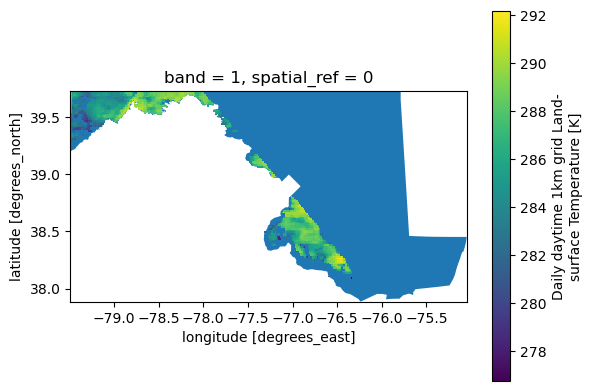

In [10]:
gdf.plot()
ds_cropped['LST_Day_1km'].plot()

### Workflow: Bulk / Create yearly cropped dfs

In [50]:
import gdown #for downloading from google drive
import zipfile, os #for unzipping the files
import xarray as xr
import rioxarray
import matplotlib.pyplot as plt
import zipfile
import os

1. Get a list of the files for the year

In [7]:
year = 2005
JJA = [152,243]

directory = f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/MODISA_LST/{year}'
hdfFiles = []
for file in os.listdir(directory):
    if '.hdf' in file:
        julian_day = int(file[13:16])
        hdfFiles.append(file)
        #if JJA[0] <= julian_day <= JJA[1]: #Summer Only
        #    hdfFiles.append(file) #Summer Only
print(hdfFiles[0:5])
print(f'Files: {len(hdfFiles)}')

['MYD11A1.A2005001.h12v05.061.2020216172502.hdf', 'MYD11A1.A2005001.h11v05.061.2020216172450.hdf', 'MYD11A1.A2005002.h11v05.061.2020216200344.hdf', 'MYD11A1.A2005002.h12v05.061.2020216200246.hdf', 'MYD11A1.A2005003.h12v05.061.2020216202159.hdf']
Files: 732


In [25]:
year = 2005
ID = str(hdfFiles[0][0])
fileDir = f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/MODISA_LST/{year}'
hdf_file = f'{fileDir}/{ID}'
# Open the subdataset using xarray
ds = xr.open_dataset(hdf_file, engine="rasterio")
str(ds.rio.crs)

'PROJCS["unnamed",GEOGCS["Unknown datum based upon the custom spheroid",DATUM["Not specified (based on custom spheroid)",SPHEROID["Custom spheroid",6371007.181,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Sinusoidal"],PARAMETER["longitude_of_center",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["Meter",1],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'

2. Get average for the year

In [11]:
def openHDF(ID):
    import xarray as xr
    print(ID)
    # Path to the HDF file
    fileDir = f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/MODISA_LST/{year}'
    hdf_file = f'{fileDir}/{ID}'
    # Open the subdataset using xarray
    ds = xr.open_dataset(hdf_file, engine="rasterio")
    date = ds.attrs['RANGEBEGINNINGDATE']
    ds = ds.assign_coords({'date': str(date)})
    return(ds)


# Compile the hdf files into a single ds
hdfFiles_toRun = hdfFiles[:]
data_arrays = [openHDF(_id) for _id in hdfFiles_toRun]
composite_data_array = xr.concat(data_arrays, dim='date')

# Check how many files are in use...
numFiles = (len(composite_data_array.date))
print(f'Arrays in use: {numFiles}')

composite_data_array.to_netcdf(f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/MODISA_LST/Cropped/{year}_all.nc')
# Average the files
#composite_mean = composite_data_array.mean(dim='date', skipna=True)

('MYD11A1.A2005001.h12v05.061.2020216172502.hdf', 1)


RasterioIOError: /panfs/ccds02/nobackup/people/slsmit34/Satellite/MODISA_LST/2005/('MYD11A1.A2005001.h12v05.061.2020216172502.hdf', 1): No such file or directory

In [51]:
import os
import numpy as np
import xarray as xr
from datetime import datetime, timedelta

def openHDF(ID, year):
    print(ID)
    # Path to the HDF file
    fileDir = f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/MODISA_LST/{year}'
    hdf_file = f'{fileDir}/{ID}'
    # Open the subdataset using xarray
    ds = xr.open_dataset(hdf_file, engine="rasterio")
    date = ds.attrs['RANGEBEGINNINGDATE']
    ds = ds.assign_coords({'date': str(date)})
    return ds

years = np.arange(2003, 2005)

for year in years:
    directory = f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/MODISA_LST/{year}'
    hdfFiles = []
    for file in os.listdir(directory):
        if '.hdf' in file:
            julian_day = int(file[13:16])
            hdfFiles.append((file, julian_day))
    
    print(hdfFiles[0:5])
    print(f'Files: {len(hdfFiles)}')

    # Group files by month
    files_by_month = {month: [] for month in range(1, 13)}
    for file, julian_day in hdfFiles:
        date = datetime(year, 1, 1) + timedelta(days=julian_day - 1)
        month = date.month
        files_by_month[month].append(file)
    
    for month in range(1, 13):
        monthly_files = files_by_month[month]
        if not monthly_files:
            print(f"No files found for {year}-{month:02d}")
            continue
        
        print(f'Files for {year}-{month:02d}: {len(monthly_files)}')
        
        # Process monthly files
        data_arrays = [openHDF(_id, year) for _id in monthly_files]
        
        if len(data_arrays) > 0:
            composite_data_array = xr.concat(data_arrays, dim='date')
            
            # Save monthly file
            output_path = f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/MODISA_LST/Cropped/{year}_{month:02d}.nc'
            composite_data_array.to_netcdf(output_path)
            print(f'Saved: {output_path}')

[('MYD11A1.A2003274.h11v05.061.2020145051102.hdf', 274), ('MYD11A1.A2003274.h12v05.061.2020145051045.hdf', 274), ('MYD11A1.A2003275.h11v05.061.2020145052342.hdf', 275), ('MYD11A1.A2003275.h12v05.061.2020145052343.hdf', 275), ('MYD11A1.A2003276.h11v05.061.2020145071234.hdf', 276)]
Files: 725
Files for 2003-01: 62
MYD11A1.A2003001.h12v05.061.2020133175643.hdf
MYD11A1.A2003001.h11v05.061.2020133175651.hdf
MYD11A1.A2003002.h12v05.061.2020133180017.hdf
MYD11A1.A2003002.h11v05.061.2020133180030.hdf
MYD11A1.A2003003.h11v05.061.2020133185618.hdf
MYD11A1.A2003003.h12v05.061.2020133185612.hdf
MYD11A1.A2003004.h11v05.061.2020133190058.hdf
MYD11A1.A2003004.h12v05.061.2020133190040.hdf
MYD11A1.A2003005.h11v05.061.2020133201005.hdf
MYD11A1.A2003005.h12v05.061.2020133200956.hdf
MYD11A1.A2003006.h12v05.061.2020133201147.hdf
MYD11A1.A2003006.h11v05.061.2020133201201.hdf
MYD11A1.A2003007.h11v05.061.2020133213551.hdf
MYD11A1.A2003007.h12v05.061.2020133213553.hdf
MYD11A1.A2003008.h11v05.061.2020133213949.

## A. PLOTS: Reproject + Crop to MD

In [68]:
import xarray as xr
tgtDate = '2023_07'
# Open the dataset
composite_data_array = xr.open_dataset(f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/MODISA_LST/Cropped/{tgtDate}.nc')

# Select only the variables LST_Day_1km and LST_Night_1km
selected_data_array = composite_data_array[['LST_Day_1km', 'LST_Night_1km']]

# Calculate the mean along the 'date' dimension, skipping NaN values
composite_mean = selected_data_array.mean(dim='date', skipna=True)

# Print the result to verify
print(composite_mean)

<xarray.Dataset> Size: 46MB
Dimensions:        (band: 1, y: 1200, x: 2400)
Coordinates:
  * band           (band) int64 8B 1
  * x              (x) float64 19kB -7.783e+06 -7.782e+06 ... -5.56e+06
  * y              (y) float64 10kB 4.447e+06 4.446e+06 ... 3.337e+06 3.336e+06
Data variables:
    LST_Day_1km    (band, y, x) float64 23MB 303.7 303.0 302.8 ... nan nan nan
    LST_Night_1km  (band, y, x) float64 23MB 291.3 291.1 291.1 ... nan nan nan


In [69]:
import rioxarray
from pyproj import CRS
import geopandas as gpd
from shapely.geometry import mapping

import rioxarray
from pyproj import CRS

def reproject(ds):
    # Assign the CRS to the dataset
    ds_crs = 'PROJCS["unnamed",GEOGCS["Unknown datum based upon the custom spheroid",DATUM["Not specified (based on custom spheroid)",SPHEROID["Custom spheroid",6371007.181,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Sinusoidal"],PARAMETER["longitude_of_center",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["Meter",1],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'
    sinusoidal_crs = CRS.from_wkt(ds_crs)#str(ds.rio.crs))
    ds.rio.write_crs(sinusoidal_crs, inplace=True)
    #print("Assigned CRS:", ds.rio.crs)
    
    # Reproject to EPSG:4326 (WGS84)
    ds_reprojected = ds.rio.reproject("EPSG:4326")
    
    # Check the new coordinates and CRS
    print("Reprojected CRS:", ds_reprojected.rio.crs)
    print("Reprojected coordinates:", ds_reprojected.coords)

    return(ds_reprojected)

def reproject(ds):
    # Ensure the dataset is an xarray.DataArray
    if not isinstance(ds, (xr.DataArray, xr.Dataset)):
        raise TypeError("Input must be an xarray.DataArray or xarray.Dataset")
    
    # Assign the CRS to the dataset
    ds_crs = 'PROJCS["unnamed",GEOGCS["Unknown datum based upon the custom spheroid",DATUM["Not specified (based on custom spheroid)",SPHEROID["Custom spheroid",6371007.181,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Sinusoidal"],PARAMETER["longitude_of_center",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["Meter",1],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'
    sinusoidal_crs = CRS.from_wkt(ds_crs)#str(ds.rio.crs))
    ds.rio.write_crs(sinusoidal_crs, inplace=True)
    print("Assigned CRS:", ds.rio.crs)
    
    # Reproject to EPSG:4326 (WGS84)
    ds_reprojected = ds.rio.reproject("EPSG:4326")
    
    # Mask values outside reasonable LST range (e.g., 200K to 400K)
    ds_reprojected = ds_reprojected.where((ds_reprojected >= 200) & (ds_reprojected <= 400))
    
    # Check the new coordinates and CRS
    print("Reprojected CRS:", ds_reprojected.rio.crs)
    print("Reprojected coordinates:", ds_reprojected.coords)
    
    return ds_reprojected



def cropToShp(ds_reprojected):
    # Load the shapefile and ensure it's in EPSG:4326
    shapefile_path = "/panfs/ccds02/nobackup/people/slsmit34/shapefiles/md_stateBoundary/Maryland_Political_Boundaries_-_State_Boundary.shp"
    gdf = gpd.read_file(shapefile_path)
    gdf = gdf.to_crs("EPSG:4326")
    geom = gdf.geometry.unary_union
    
    # Clip the dataset using the shapefile geometry
    cropped_ds = ds_reprojected.rio.clip([mapping(geom)], crs="EPSG:4326")
    
    # Mask values outside reasonable LST range (e.g., 200K to 400K)
    cropped_ds = cropped_ds.where((cropped_ds >= 200) & (cropped_ds <= 400))
    
    return cropped_ds


ds_reproj = reproject(composite_mean)
ds_cropped = cropToShp(ds_reproj)
ds_cropped

Assigned CRS: PROJCS["unnamed",GEOGCS["Unknown datum based upon the custom spheroid",DATUM["Not specified (based on custom spheroid)",SPHEROID["Custom spheroid",6371007.181,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Sinusoidal"],PARAMETER["longitude_of_center",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["Meter",1],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
Reprojected CRS: EPSG:4326
Reprojected coordinates: Coordinates:
  * x            (x) float64 21kB -91.37 -91.36 -91.35 ... -57.77 -57.76 -57.74
  * y            (y) float64 6kB 39.99 39.98 39.97 39.95 ... 30.03 30.01 30.0
  * band         (band) int64 8B 1
    spatial_ref  int64 8B 0


<xarray.Dataset> Size: 763kB
Dimensions:        (band: 1, y: 140, x: 339)
Coordinates:
  * x              (x) float64 3kB -79.48 -79.47 -79.46 ... -75.09 -75.07 -75.06
  * y              (y) float64 1kB 39.72 39.71 39.69 39.68 ... 37.93 37.91 37.9
  * band           (band) int64 8B 1
    spatial_ref    int64 8B 0
Data variables:
    LST_Day_1km    (band, y, x) float64 380kB nan 299.0 299.0 ... nan nan nan
    LST_Night_1km  (band, y, x) float64 380kB nan 288.1 288.7 ... nan nan nan

4. Plot day and Night

Text(0.5, 1.0, '2023_07 seasonal average - DAYTIME')

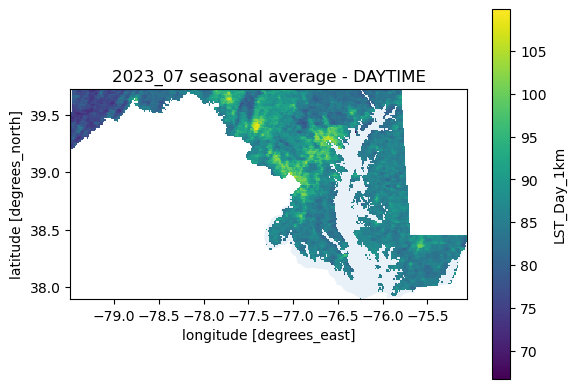

In [70]:
def kelvin_to_fahrenheit(kelvin):
    return (kelvin - 273.15) * (9/5) + 32

# If using xarray dataset
ds_cropped['LST_Day_1km'] = kelvin_to_fahrenheit(ds_cropped['LST_Day_1km'])

gdf.plot(alpha = 0.1)
ds_cropped['LST_Day_1km'].plot()
plt.title(f'{tgtDate} seasonal average - DAYTIME')

Text(0.5, 1.0, '2005 JJA seasonal average - NIGHTTIME')

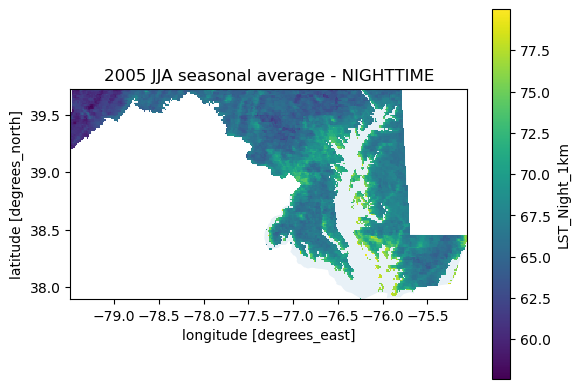

In [48]:
def kelvin_to_fahrenheit(kelvin):
    return (kelvin - 273.15) * (9/5) + 32

# If using xarray dataset
ds_cropped['LST_Night_1km'] = kelvin_to_fahrenheit(ds_cropped['LST_Night_1km'])

gdf.plot(alpha = 0.1)
ds_cropped['LST_Night_1km'].plot()
plt.title('2005 JJA seasonal average - NIGHTTIME')

## TIME SERIES: hotspots

In [6]:
import rioxarray
from pyproj import CRS
import geopandas as gpd
from shapely.geometry import mapping
import rioxarray
from pyproj import CRS
import xarray as xr
import pandas as pd
import os

In [7]:
def cropToShp(ds_reprojected):
    # Load the shapefile and ensure it's in EPSG:4326
    shapefile_path = "/panfs/ccds02/nobackup/people/slsmit34/shapefiles/md_stateBoundary/Maryland_Political_Boundaries_-_State_Boundary.shp"
    gdf = gpd.read_file(shapefile_path)
    gdf = gdf.to_crs("EPSG:4326")
    geom = gdf.geometry.unary_union
    
    # Clip the dataset using the shapefile geometry
    cropped_ds = ds_reprojected.rio.clip([mapping(geom)], crs="EPSG:4326")
    
    # Mask values outside reasonable LST range (e.g., 200K to 400K)
    cropped_ds = cropped_ds.where((cropped_ds >= 200) & (cropped_ds <= 400))
    
    return cropped_ds

def reproject(ds):
    # Ensure the dataset is an xarray.DataArray
    if not isinstance(ds, (xr.DataArray, xr.Dataset)):
        raise TypeError("Input must be an xarray.DataArray or xarray.Dataset")
    
    # Assign the CRS to the dataset
    ds_crs = 'PROJCS["unnamed",GEOGCS["Unknown datum based upon the custom spheroid",DATUM["Not specified (based on custom spheroid)",SPHEROID["Custom spheroid",6371007.181,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Sinusoidal"],PARAMETER["longitude_of_center",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["Meter",1],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'
    sinusoidal_crs = CRS.from_wkt(ds_crs)#str(ds.rio.crs))
    ds.rio.write_crs(sinusoidal_crs, inplace=True)
    #print("Assigned CRS:", ds.rio.crs)
    
    # Reproject to EPSG:4326 (WGS84)
    ds_reprojected = ds.rio.reproject("EPSG:4326")
    
    # Mask values outside reasonable LST range (e.g., 200K to 400K)
    ds_reprojected = ds_reprojected.where((ds_reprojected >= 200) & (ds_reprojected <= 400))
    
    # Check the new coordinates and CRS
    #print("Reprojected CRS:", ds_reprojected.rio.crs)
    #print("Reprojected coordinates:", ds_reprojected.coords)
    
    return ds_reprojected

In [44]:
# Loop for getting data at coordinates (RUN 2/24/2025)
years = np.arange(2010,2024)  # Replace with the desired year
for year in years:
    print('--------------------------')
    print(year)
    print('--------------------------')
    months = np.arange(1,13)   # Replace with the desired month
    
    #Info to run
    all_results = []
    coordDict = {
            'Salisbury': [38.37034548784061, -75.58516762162914],
            'Hagerstown': [39.65259759024378, -77.7130892831205],
            'Frederick': [39.43177706683794, -77.43813311337723],
            'Rockville': [39.032183386991164, -77.13926771148228],
            'Baltimore': [39.30530883113323, -76.6282946891492],
            'BelAir': [39.52709263840793, -76.33130987233803],
            'Catoctin' : [39.64832819775264,-77.46994722557348],
            'Patapsco' : [39.346603303846706, -76.8813559059837],
            'Patuxent' : [39.23790317202646, -77.05816192894771]
        }
    
    #The loop
    i = 0
    for month in months: 
        print(f'\n({i}) Monthly Average = {month} / {year}')
        monthlyDir = f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/MODISA_LST/Cropped/{year}_{month:02d}.nc'
        
        # Initialize an empty DataFrame to store the results
        results_list = []
        
        # Load the dataset
        ds = xr.open_dataset(monthlyDir)
        ds = ds[['LST_Day_1km', 'LST_Night_1km']]
        print(f'      -- loaded in dataset.')
        
        # Filter out dates outside the target year
        ds['date'] = pd.to_datetime(ds['date'])  # Ensure date is in datetime format
        ds = ds.sel(date=ds['date'].dt.year == year)  # Keep only dates in the correct year
        
        # Compute the mean over the 'date' dimension
        composite_mean = ds.mean(dim='date', skipna=True)
        print(f'      -- averaged dataset.')
        
        #Reproject and Crop
        composite_mean = reproject(composite_mean)
        composite_mean = cropToShp(composite_mean)
        print(f'      -- reproject/cropped dataset.')
        composite_mean.to_netcdf(f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/MODISA_LST/Cropped/Mean/{year}_{month:02d}.nc')
        print(f'      -- saved dataset to directory.')
        
        # Initialize a dictionary to store results
        results_dict = {}
        
        # Extract values for each location
        for location, (lat, lon) in coordDict.items():
            values = composite_mean.sel(y=lat, x=lon, method='nearest').to_array().values.flatten()  # Extract as [day, night]
            results_dict[f"{location}_Day"] = values[0]
            results_dict[f"{location}_Night"] = values[1]
        
        # Convert to DataFrame
        results_df = pd.DataFrame(results_dict, index=[f"{year}-{month:02d}"])
        all_results.append(results_df)
        print(f'      -- recorded LST at coordinates. Complete!')
        i=i+1
        
    final_results_df = pd.concat(all_results)
    
    # Save to CSV
    final_results_df.to_csv(f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/MODISA_LST/TimeSeries/{year}_LST_Results.csv')
    
    # Print final results
    final_results_df

--------------------------
2010
--------------------------

(0) Monthly Average = 1 / 2010
      -- loaded in dataset.
      -- averaged dataset.
      -- reproject/cropped dataset.
      -- saved dataset to directory.
      -- recorded LST at coordinates. Complete!

(1) Monthly Average = 2 / 2010
      -- loaded in dataset.
      -- averaged dataset.
      -- reproject/cropped dataset.
      -- saved dataset to directory.
      -- recorded LST at coordinates. Complete!

(2) Monthly Average = 3 / 2010
      -- loaded in dataset.
      -- averaged dataset.
      -- reproject/cropped dataset.
      -- saved dataset to directory.
      -- recorded LST at coordinates. Complete!

(3) Monthly Average = 4 / 2010
      -- loaded in dataset.
      -- averaged dataset.
      -- reproject/cropped dataset.
      -- saved dataset to directory.
      -- recorded LST at coordinates. Complete!

(4) Monthly Average = 5 / 2010
      -- loaded in dataset.
      -- averaged dataset.
      -- reproject/cro

In [8]:
# ---- START HERE -------
import numpy as np
year = 2003
bulkDf = pd.read_csv(f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/MODISA_LST/TimeSeries/{year}_LST_Results.csv')
years = np.arange(2004,2024)
for year in years:
    #Load in the file
    tempDf = pd.read_csv(f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/MODISA_LST/TimeSeries/{year}_LST_Results.csv')
    bulkDf = pd.concat([bulkDf, tempDf])
bulkDf['date'] = pd.to_datetime(bulkDf['Unnamed: 0'])

#Separate by day/night
day_columns = [col for col in bulkDf.columns if '_Day' in col] + ['date']
night_columns = [col for col in bulkDf.columns if '_Night' in col] + ['date']

# Create the dataframe
df_day = bulkDf[day_columns]
df_night = bulkDf[night_columns]

df_day.head()

Salisbury_Day  Hagerstown_Day  Frederick_Day  Rockville_Day  Baltimore_Day  \
0     277.682500      279.090000     276.715000     276.051667     277.951667   
1     281.900000      277.686667     276.395000     280.360000     279.115000   
2     294.266154      297.156667     290.780000     292.635000     295.269091   
3     301.890769      302.670909     300.516364     299.941667     304.737333   
4     306.385000      302.928000     304.105000     301.846667     307.126667   

   BelAir_Day  Catoctin_Day  Patapsco_Day  Patuxent_Day       date  
0  272.788571    271.080000    273.635556    274.406667 2003-01-01  
1  277.195000           NaN    276.240000    277.136000 2003-02-01  
2  291.568571    292.006667    289.940000    286.488000 2003-03-01  
3  297.737143    296.776364    297.571429    298.588333 2003-04-01  
4  299.180000    295.044000    295.420000    297.595000 2003-05-01

In [9]:
# Get average MD LST
inputDir = f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/MODISA_LST/Cropped/Mean/'

# Initialize an empty list to store the results
results = []

# Iterate through the files in the directory
for filename in os.listdir(inputDir):
    if filename.endswith('.nc'):
        # Construct the full file path
        filepath = os.path.join(inputDir, filename)
        
        # Open the NetCDF file
        ds = xr.open_dataset(filepath)
        
        # Assuming the LST variable is named 'LST'
        # Calculate the average LST
        day_lst = ds['LST_Day_1km'].mean().item()
        night_lst = ds['LST_Night_1km'].mean().item()
        
        # Extract the year and month from the filename
        year = filename[0:4]
        month = filename[5:7]
        print(year, month)
        
        # Append the results to the list
        results.append({'year': int(year), 'month': int(month), 'day_lst': day_lst, 'night_lst': night_lst})

# Convert the results list to a dataframe
df = pd.DataFrame(results)

df.to_csv(f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/MODISA_LST/TimeSeries/MD_LST.csv')

2023 01
2007 01
2007 02
2003 01
2003 02
2003 03
2003 04
2003 05
2003 06
2003 07
2003 08
2003 09
2003 10
2003 11
2003 12
2004 01
2004 02
2004 03
2004 04
2004 05
2004 06
2004 07
2004 08
2004 09
2004 10
2004 11
2004 12
2005 01
2005 02
2005 03
2005 04
2005 05
2005 06
2005 07
2005 08
2005 09
2005 10
2005 11
2005 12
2006 01
2006 02
2006 03
2006 04
2006 05
2006 06
2006 07
2006 08
2006 09
2006 10
2006 11
2006 12
2007 03
2007 04
2007 05
2007 06
2007 07
2007 08
2007 09
2007 10
2007 11
2007 12
2008 01
2008 02
2008 03
2008 04
2008 05
2008 06
2008 07
2008 08
2008 09
2008 10
2008 11
2008 12
2009 01
2009 02
2009 03
2009 04
2009 05
2009 06
2009 07
2009 08
2009 09
2009 10
2009 11
2009 12
2010 01
2010 02
2010 03
2010 04
2010 05
2010 06
2010 07
2010 08
2010 09
2010 10
2010 11
2010 12
2011 01
2011 02
2011 03
2011 04
2011 05
2011 06
2011 07
2011 08
2011 09
2011 10
2011 11
2011 12
2012 01
2012 02
2012 03
2012 04
2012 05
2012 06
2012 07
2012 08
2012 09
2012 10
2012 11
2012 12
2013 01
2013 02
2013 03
2013 04


In [10]:
#Average by month
df.head()
df['day_lst'] = (df['day_lst'] - 273.15) * 9/5 + 32
df['night_lst'] = (df['night_lst'] - 273.15) * 9/5 + 32

monthly_avg = df.groupby(['month']).agg({'day_lst': 'mean', 'night_lst': 'mean'}).reset_index()
#Convert to C
monthly_avg.head()

month    day_lst  night_lst
0      1  41.085222  25.321588
1      2  46.203446  26.470546
2      3  59.629310  32.593367
3      4  73.291287  41.834132
4      5  79.058753  51.583299

(10.0, 120.0)

<Figure size 1000x600 with 0 Axes>

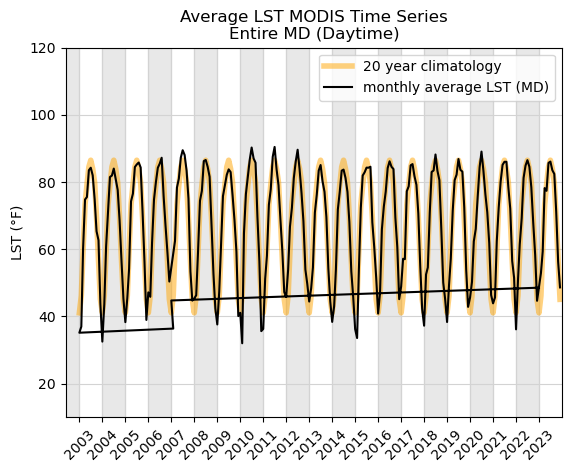

In [11]:
# plot climatology
import matplotlib.pyplot as plt
TOD = 'Day'
years = range(2003, 2024)
data = []
for year in years:
    for index, row in monthly_avg.iterrows():
        data.append({
            'year': year,
            'month': row['month'],
            'day_lst': row['day_lst'],
            'night_lst': row['night_lst']
        })
df_repeated = pd.DataFrame(data)

# Create a datetime column for plotting
df_repeated['date'] = pd.to_datetime(df_repeated[['year', 'month']].assign(day=1))
df_repeated
from matplotlib.dates import YearLocator, DateFormatter
plt.figure(figsize=(10, 6))
fig,ax = plt.subplots()
year_all = [year for year in range(2001, 2024)]

plt.grid(c = 'lightgray')
for year in range(2002, 2024, 2):
    start_date = pd.Timestamp(year, 1, 1)
    end_date = pd.Timestamp(year + 1, 1, 1)
    plt.axvspan(start_date, end_date, color='lightgray', alpha=0.5)

#Plot climatology
plt.plot(df_repeated['date'], df_repeated['day_lst'], c='orange', lw = 4, linestyle = '-', alpha = 0.5,label = '20 year climatology')

#Plot monthly average
df = df.dropna()
df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))
plt.plot(df['date'], df['day_lst'], c = 'black', label = 'monthly average LST (MD)')


plt.title(f'Average LST MODIS Time Series\nEntire MD ({TOD}time)')
plt.gca().xaxis.set_major_locator(YearLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))
plt.xticks(rotation = 45)
plt.ylabel('LST (°F)')
yearStart, yearEnd = 2002, 2023
plt.legend()
plt.xlim(pd.Timestamp(yearStart, 6, 1), pd.Timestamp(yearEnd, 12, 31))
plt.ylim(10,120)


In [12]:
#Convert to F
columns_to_convert = [col for col in df_day.columns if col != 'date']
df_day[columns_to_convert] = df_day[columns_to_convert].apply(lambda x: (x - 273.15) * 9/5 + 32)

columns_to_convert = [col for col in df_night.columns if col != 'date']
df_night[columns_to_convert] = df_night[columns_to_convert].apply(lambda x: (x - 273.15) * 9/5 + 32)


/explore/nobackup/people/slsmit34/.nccstmp/ipykernel_1285834/3134585155.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day[columns_to_convert] = df_day[columns_to_convert].apply(lambda x: (x - 273.15) * 9/5 + 32)
/explore/nobackup/people/slsmit34/.nccstmp/ipykernel_1285834/3134585155.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_night[columns_to_convert] = df_night[columns_to_convert].apply(lambda x: (x - 273.15) * 9/5 + 32)


(10.0, 120.0)

<Figure size 1000x600 with 0 Axes>

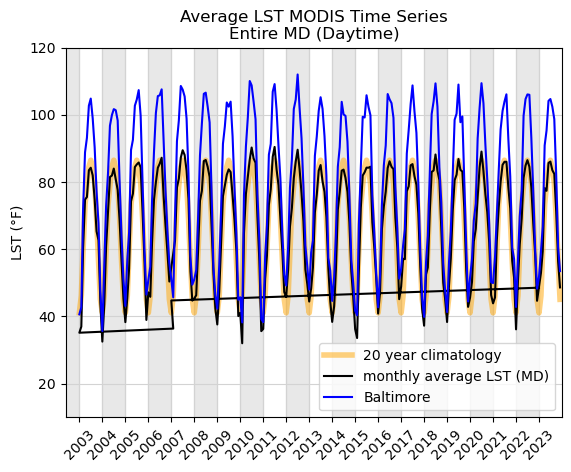

In [13]:
# Create a datetime column for plotting
df_repeated['date'] = pd.to_datetime(df_repeated[['year', 'month']].assign(day=1))
df_repeated
from matplotlib.dates import YearLocator, DateFormatter
plt.figure(figsize=(10, 6))
fig,ax = plt.subplots()
year_all = [year for year in range(2001, 2024)]

plt.grid(c = 'lightgray')
for year in range(2002, 2024, 2):
    start_date = pd.Timestamp(year, 1, 1)
    end_date = pd.Timestamp(year + 1, 1, 1)
    plt.axvspan(start_date, end_date, color='lightgray', alpha=0.5)
    
#Plot climatology
plt.plot(df_repeated['date'], df_repeated['day_lst'], c='orange', lw = 4, linestyle = '-', alpha = 0.5,label = '20 year climatology')

#Plot monthly average
df = df.dropna()
df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))
df = df.reset_index()
plt.plot(df['date'], df['day_lst'], c = 'black', label = 'monthly average LST (MD)')

plt.plot(df_day['date'], df_day['Baltimore_Day'], c = 'b', label = 'Baltimore')

plt.title(f'Average LST MODIS Time Series\nEntire MD ({TOD}time)')
plt.gca().xaxis.set_major_locator(YearLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))
plt.xticks(rotation = 45)
plt.ylabel('LST (°F)')
yearStart, yearEnd = 2002, 2023
plt.legend()
plt.xlim(pd.Timestamp(yearStart, 6, 1), pd.Timestamp(yearEnd, 12, 31))
plt.ylim(10,120)

no std


<Figure size 1000x600 with 0 Axes>

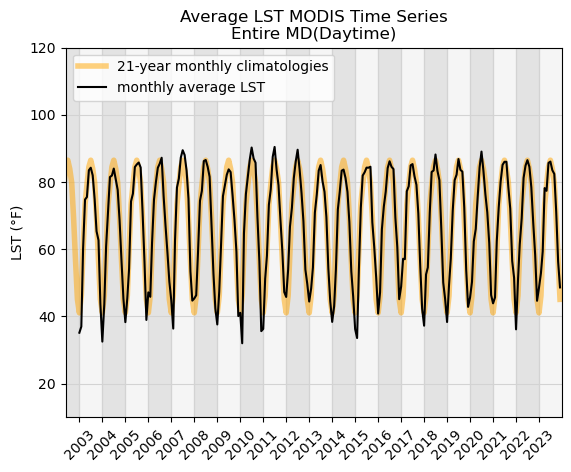

In [14]:
#Make plots - Monthly average
from matplotlib.dates import YearLocator, DateFormatter
plt.figure(figsize=(10, 6))
fig,ax = plt.subplots()
year_all = [year for year in range(2001, 2024)]

plt.grid(c = 'lightgray')
for year in range(2002, 2024, 2):
    start_date = pd.Timestamp(year, 1, 1)
    end_date = pd.Timestamp(year + 1, 1, 1)
    plt.axvspan(start_date, end_date, color='lightgray', alpha=0.5)

#get monthly avgs
df_merged = df
dfMonthlies = df_merged.groupby(['month','year']).mean()
dfMonthlies['average'] = dfMonthlies['day_lst']
dfMonthliesSTD = df_merged.groupby(['month','year']).std()
dfMonthlies.reset_index(inplace=True)
dfMonthliesSTD.reset_index(inplace=True)
dfMonthlies['date'] = pd.to_datetime(dfMonthlies['year'].astype(str) + dfMonthlies['month'].astype(str) + str(1), format='%Y%m%d')
dfMonthlies = dfMonthlies.sort_values(by='date')
dfMonthliesSTD['date'] = pd.to_datetime(dfMonthliesSTD['year'].astype(str) + dfMonthliesSTD['month'].astype(str) + str(1), format='%Y%m%d')
dfMonthliesSTD = dfMonthliesSTD.sort_values(by='date')
#Get 20 year climatology
median_df = dfMonthlies.groupby(['month']).mean()
median_df['average'] = median_df['day_lst']
median_df.reset_index(inplace=True)
median_df['date'] = pd.to_datetime(str(year_all[0]) + median_df['month'].astype(str) + str(1), format='%Y%m%d')
median_df_store = median_df
for year in year_all[1:]:#Add to it and plot
    median_df_store['date'] = pd.to_datetime(str(year) + median_df['month'].astype(str) + str(1), format='%Y%m%d')
    median_df = pd.concat([median_df, median_df_store], ignore_index = True)
median_df = median_df.sort_values(by='date')
subtracted_df = dfMonthlies - median_df
#plot climatologies
plt.plot(median_df['date'], median_df['average'],c='orange', lw = 4, linestyle = '-', alpha = 0.5, label = '21-year monthly climatologies')

#Plot everything 
#plt.plot(df_merged['date'], df_merged['average'])

#plot monthlies
plt.plot(dfMonthlies['date'], dfMonthlies['average'], c = 'black', label = 'monthly average LST')

#try:plt.fill_between(dfMonthlies['date'], dfMonthlies[f'stdUpper'], dfMonthlies[f'stdLower'], color='blue', alpha=0.3, label='Std. Deviation')
try:plt.fill_between(dfMonthliesSTD['date'], dfMonthlies['average'] + dfMonthliesSTD['average'],  dfMonthlies['average'] - dfMonthliesSTD['average'], color='blue', alpha=0.3, label='Std. deviation')
except: print('no std')

#format
plt.title(f'Average LST MODIS Time Series\nEntire MD({TOD}time)')
plt.gca().xaxis.set_major_locator(YearLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))
plt.xticks(rotation = 45)
plt.ylabel('LST (°F)')
yearStart, yearEnd = 2002, 2023
plt.xlim(pd.Timestamp(yearStart, 6, 1), pd.Timestamp(yearEnd, 12, 31))
plt.ylim(10,120)
ax.set_facecolor('whitesmoke')
plt.legend(loc = 'upper left')
plt.savefig(f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/plots/png/{TOD}_Climatology.png', format='png', dpi=300)
plt.show()

In [20]:
columns_to_convert = [col for col in df_day.columns if col != 'date']
df_day[columns_to_convert] = df_day[columns_to_convert].apply(lambda x: (x - 273.15) * 9/5 + 32)

columns_to_convert = [col for col in df_night.columns if col != 'date']
df_night[columns_to_convert] = df_night[columns_to_convert].apply(lambda x: (x - 273.15) * 9/5 + 32)

df_night.head()

/explore/nobackup/people/slsmit34/.nccstmp/ipykernel_13385/811755234.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day[columns_to_convert] = df_day[columns_to_convert].apply(lambda x: (x - 273.15) * 9/5 + 32)
/explore/nobackup/people/slsmit34/.nccstmp/ipykernel_13385/811755234.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_night[columns_to_convert] = df_night[columns_to_convert].apply(lambda x: (x - 273.15) * 9/5 + 32)


Salisbury_Night  Hagerstown_Night  Frederick_Night  Rockville_Night  \
0      -421.329486       -421.647700      -422.968000      -419.913143   
1      -415.710400       -423.248800      -420.588914      -412.162600   
2      -382.234720       -406.147771      -402.737440      -396.497200   
3      -375.523600       -385.690327      -385.444171      -380.599600   
4      -369.086800       -377.910400      -369.167800      -367.680640   

   Baltimore_Night  BelAir_Night  Catoctin_Night  Patapsco_Night  \
0      -418.202255   -419.749600     -412.292200     -426.888400   
1      -416.326000   -422.082400     -430.697714     -417.006400   
2      -395.641459   -402.537486     -406.819158     -403.273120   
3      -380.491600   -388.341657     -382.565200     -387.487055   
4      -364.302400   -371.214400     -375.845440     -378.981760   

   Patuxent_Night       date  
0     -428.792800 2003-01-01  
1     -427.646560 2003-02-01  
2     -407.047450 2003-03-01  
3     -393.274646 2003-04-01  
4     -367.612600 2003-05-01

In [15]:
df_day['month'] = pd.to_datetime(df_day['date']).dt.month
df_night['month'] = pd.to_datetime(df_night['date']).dt.month

# Merge df_day and df_night with dfMD on the month column
df_day_merged = pd.merge(df_day, monthly_avg[['month', 'day_lst']], on='month', how='left')
df_night_merged = pd.merge(df_night, monthly_avg[['month', 'night_lst']], on='month', how='left')

df_day_merged.head()

/explore/nobackup/people/slsmit34/.nccstmp/ipykernel_1285834/3868464389.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day['month'] = pd.to_datetime(df_day['date']).dt.month
/explore/nobackup/people/slsmit34/.nccstmp/ipykernel_1285834/3868464389.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_night['month'] = pd.to_datetime(df_night['date']).dt.month


Salisbury_Day  Hagerstown_Day  Frederick_Day  Rockville_Day  Baltimore_Day  \
0      40.158500       42.692000      38.417000         37.223      40.643000   
1      47.750000       40.166000      37.841000         44.978      42.737000   
2      70.009077       75.212000      63.734000         67.073      71.814364   
3      83.733385       85.137636      81.259455         80.225      88.857200   
4      91.823000       85.600400      87.719000         83.654      93.158000   

   BelAir_Day  Catoctin_Day  Patapsco_Day  Patuxent_Day       date  month  \
0   31.349429     28.274000     32.874000       34.2620 2003-01-01      1   
1   39.281000           NaN     37.562000       39.1748 2003-02-01      2   
2   65.153429     65.942000     62.222000       56.0084 2003-03-01      3   
3   76.256857     74.527455     75.958571       77.7890 2003-04-01      4   
4   78.854000     71.409200     72.086000       76.0010 2003-05-01      5   

     day_lst  
0  41.085222  
1  46.203446  
2  59.629310  
3  73.291287  
4  79.058753

In [16]:
# Subtract the average LST from dfMD for the daytime and nighttime
day_columns = [col for col in df_day.columns if '_Day' in col]
night_columns = [col for col in df_night.columns if '_Night' in col]

for col in day_columns:
    df_day_merged[col] = df_day_merged[col] - df_day_merged['day_lst']

for col in night_columns:
    df_night_merged[col] = df_night_merged[col] - df_night_merged['night_lst']
# Drop the extra columns used for merging
df_day_merged = df_day_merged.drop(columns=['day_lst', 'month'])
df_night_merged = df_night_merged.drop(columns=['night_lst', 'month'])


Text(0, 0.5, 'Temperature Anomoly (°F)')

<Figure size 1000x600 with 0 Axes>

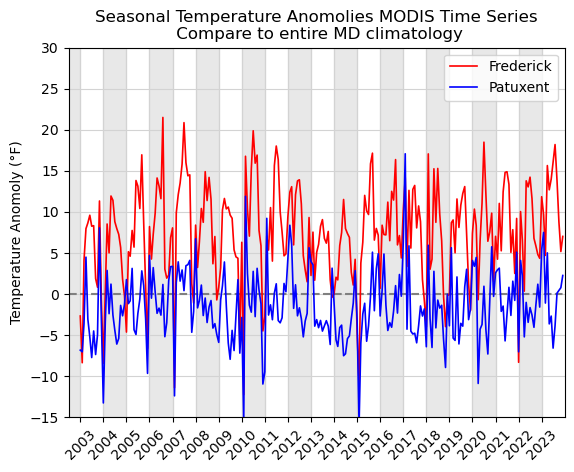

In [17]:
from matplotlib.dates import YearLocator, DateFormatter
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
fig,ax = plt.subplots()
year_all = [year for year in range(2001, 2024)]
plt.grid(c = 'lightgray')
for year in range(2002, 2024, 2):
    start_date = pd.Timestamp(year, 1, 1)
    end_date = pd.Timestamp(year + 1, 1, 1)
    plt.axvspan(start_date, end_date, color='lightgray', alpha=0.5)

plt.axhline(y=0, color='gray', linestyle='--')
TOD = 'Day'
keys = ['Frederick', 'Patuxent']
colors = ['r', 'b', 'g']
i = 0
for key in keys:
    colName = f'{key}_{TOD}'
    plt.plot(df_day_merged['date'],df_day_merged[colName], lw = 1.2, c = colors[i], label = key)
    i = i+1
plt.legend()
plt.title(f'Seasonal Temperature Anomolies MODIS Time Series\n Compare to entire MD climatology')
plt.gca().xaxis.set_major_locator(YearLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))
plt.xticks(rotation = 45)
yearStart, yearEnd = 2002,2023
plt.xlim(pd.Timestamp(yearStart, 7, 1), pd.Timestamp(yearEnd, 12, 31))
plt.ylim(-15,30)
plt.ylabel('Temperature Anomoly (°F)')

In [18]:
#seasonal average
import pandas as pd

# Assuming df_day_merged is your dataframe
df_day_merged['date'] = pd.to_datetime(df_day_merged['date'])

# Define a function to determine the season
def get_season(row):
    month = row['date'].month
    year = row['date'].year
    if month in [12, 1, 2]:
        season = 'Winter'
        if month == 12:
            year += 1  # December belongs to the next year's winter
    elif month in [3, 4, 5]:
        season = 'Spring'
    elif month in [6, 7, 8]:
        season = 'Summer'
    elif month in [9, 10, 11]:
        season = 'Fall'
    return pd.Series([year, season])

# Apply the function to create new columns for year and season
df_day_merged[['year', 'season']] = df_day_merged.apply(get_season, axis=1)

# Group by year and season, then calculate the mean for each group
seasonal_averages = df_day_merged.groupby(['year', 'season']).mean().reset_index()

# Drop the 'date' column as it is no longer needed
seasonal_averages = seasonal_averages.drop(columns=['date'])

season_to_month = {
    'Winter': 1,  # January
    'Spring': 4,  # April
    'Summer': 7,  # July
    'Fall': 10    # October
}

# Create the 'dummy_date' column
seasonal_averages['date'] = seasonal_averages.apply(
    lambda row: pd.Timestamp(year=row['year'], month=season_to_month[row['season']], day=1),
    axis=1
)

seasonal_averages = seasonal_averages.sort_values(by='date')
seasonal_averages = seasonal_averages.reset_index(drop=True)

seasonal_averages.head()

year  season  Salisbury_Day  Hagerstown_Day  Frederick_Day  Rockville_Day  \
0  2003  Winter       0.309916       -2.215334      -5.515334      -2.543834   
1  2003  Spring      11.195370       11.323562       6.911035       6.324216   
2  2003  Summer      13.745532        9.733987       8.730389       2.871889   
3  2003    Fall       9.747194        3.997775       4.680518       1.945709   
4  2004  Winter       5.158488       -3.480571      -2.839374      -0.159236   

   Baltimore_Day  BelAir_Day  Catoctin_Day  Patapsco_Day  Patuxent_Day  \
0      -1.954334   -8.329120    -12.811222     -8.426334     -6.925934   
1      13.950071    2.761645     -0.033565     -0.570926     -0.726984   
2      17.195661    2.332703     -9.389254     -7.203065     -5.814062   
3       9.808141   -0.191521     -7.507082     -1.790558     -1.418225   
4       2.171096   -2.832920    -11.995138     -4.590533     -6.618690   

        date  
0 2003-01-01  
1 2003-04-01  
2 2003-07-01  
3 2003-10-01  
4 2004-01-01

P-value for BelAir: 0.01741211155179844
P-value for Catoctin: 0.11681536720485564
P-value for Baltimore: 0.9865325016030231


<Figure size 1000x600 with 0 Axes>

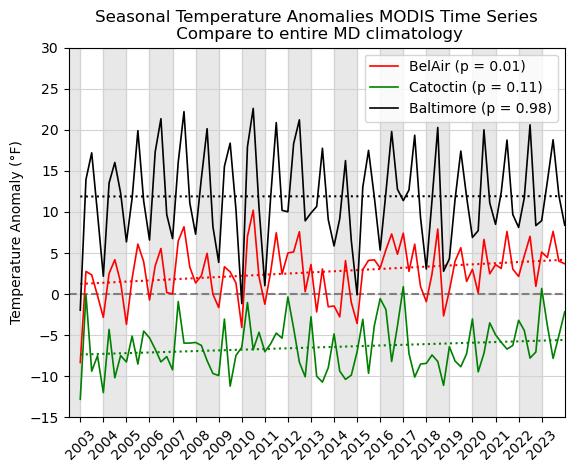

In [19]:
from matplotlib.dates import YearLocator, DateFormatter
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress


plt.figure(figsize=(10, 6))
fig, ax = plt.subplots()
year_all = [year for year in range(2001, 2024)]
plt.grid(c='lightgray')

for year in range(2002, 2024, 2):
    start_date = pd.Timestamp(year, 1, 1)
    end_date = pd.Timestamp(year + 1, 1, 1)
    plt.axvspan(start_date, end_date, color='lightgray', alpha=0.5)

# Add statistics 

# Plots
plt.axhline(y=0, color='gray', linestyle='--')
TOD = 'Day'
#keys = ['Frederick', 'Patuxent', 'Baltimore', 'Salisbury', 'Hagerstown', 'Rockville', 'Catoctin', 'BelAir', 'Patapsco']
keys = ['BelAir', 'Catoctin', 'Baltimore']
colors = ['r', 'g', 'black', 'orange', 'purple', 'blue', 'lightblue', 'lightgreen', 'grey']
i = 0

for key in keys:
    colName = f'{key}_{TOD}'
    
    # Calculate linear regression
    x = pd.to_datetime(seasonal_averages['date']).map(pd.Timestamp.toordinal)
    y = seasonal_averages[colName]
    mask = ~np.isnan(y)
    x = x[mask]
    y = y[mask]
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    
    # Plot linear regression line
    plt.plot(seasonal_averages['date'], seasonal_averages[colName], lw=1.2, c=colors[i], label=f'{key} (p = {str(p_value)[0:4]})')
    plt.plot(seasonal_averages['date'], intercept + slope * pd.to_datetime(seasonal_averages['date']).map(pd.Timestamp.toordinal), 
             linestyle=':', color=colors[i])
    
    # Print p-value
    print(f'P-value for {key}: {p_value}')
    
    i = i + 1

plt.legend()
plt.title(f'Seasonal Temperature Anomalies MODIS Time Series\n Compare to entire MD climatology')
plt.gca().xaxis.set_major_locator(YearLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))
plt.xticks(rotation=45)
yearStart, yearEnd = 2002, 2023
plt.xlim(pd.Timestamp(yearStart, 7, 1), pd.Timestamp(yearEnd, 12, 31))
plt.ylim(-15, 30)
plt.ylabel('Temperature Anomaly (°F)')
plt.show()

Text(0, 0.5, 'Temperature Anomoly (°F)')

<Figure size 1000x600 with 0 Axes>

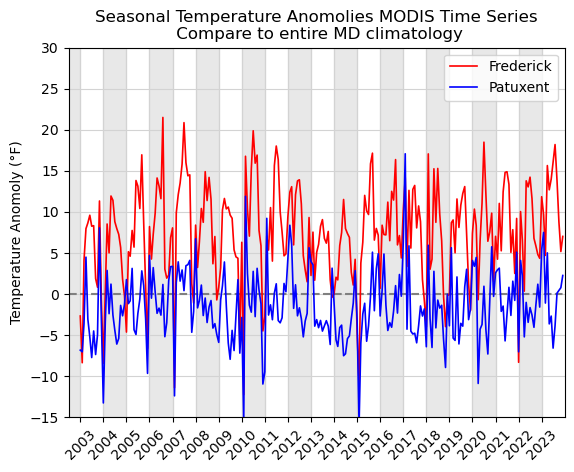

In [20]:
from matplotlib.dates import YearLocator, DateFormatter
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
fig,ax = plt.subplots()
year_all = [year for year in range(2001, 2024)]
plt.grid(c = 'lightgray')
for year in range(2002, 2024, 2):
    start_date = pd.Timestamp(year, 1, 1)
    end_date = pd.Timestamp(year + 1, 1, 1)
    plt.axvspan(start_date, end_date, color='lightgray', alpha=0.5)

plt.axhline(y=0, color='gray', linestyle='--')
TOD = 'Day'
keys = ['Frederick', 'Patuxent']
colors = ['r', 'b', 'g']
i = 0
for key in keys:
    colName = f'{key}_{TOD}'
    plt.plot(df_day_merged['date'],df_day_merged[colName], lw = 1.2, c = colors[i], label = key)
    i = i+1
plt.legend()
plt.title(f'Seasonal Temperature Anomolies MODIS Time Series\n Compare to entire MD climatology')
plt.gca().xaxis.set_major_locator(YearLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))
plt.xticks(rotation = 45)
yearStart, yearEnd = 2002,2023
plt.xlim(pd.Timestamp(yearStart, 7, 1), pd.Timestamp(yearEnd, 12, 31))
plt.ylim(-15,30)
plt.ylabel('Temperature Anomoly (°F)')

## Plot all

In [28]:
import os
import xarray as xr
import matplotlib.pyplot as plt

# Define the input directory
inputDir = '/panfs/ccds02/nobackup/people/slsmit34/Satellite/MODISA_LST/Cropped/Mean/'

# List all files in the directory that contain '_08' in their names
files = [f for f in os.listdir(inputDir) if '_07' in f and f.endswith('.nc')]

# Initialize an empty list to store the datasets
datasets = []

# Load each file and append the dataset to the list
for file in files:
    filepath = os.path.join(inputDir, file)
    ds = xr.open_dataset(filepath)
    datasets.append(ds)

# Concatenate all datasets along a new dimension (e.g., 'time')
combined_ds = xr.concat(datasets, dim='time')


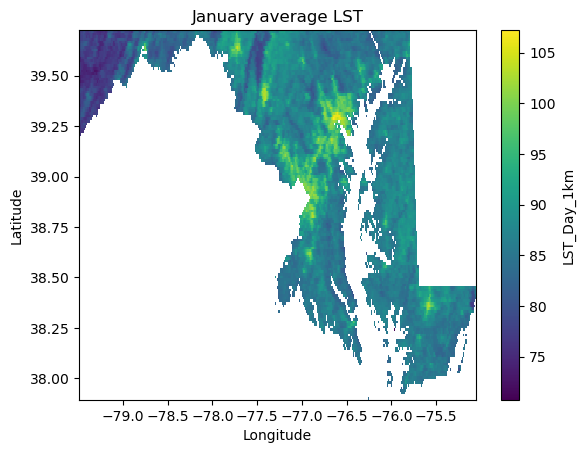

In [29]:
# Compute the average of the 'day_1km_lst' variable across all files
average_lst = combined_ds['LST_Day_1km'].mean(dim='time')
# Convert the average_lst from Kelvin to Fahrenheit
average_lst_F = (average_lst - 273.15) * 9/5 + 32

# Plot the averaged 'day_1km_lst' variable in Fahrenheit
average_lst_F.plot()

plt.title('January average LST')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [30]:
shapefile_path = "/panfs/ccds02/nobackup/people/slsmit34/shapefiles/md_stateBoundary/Maryland_Political_Boundaries_-_State_Boundary.shp"
gdf = gpd.read_file(shapefile_path)
gdf = gdf.to_crs("EPSG:4326")
geom = gdf.geometry.unary_union


Day



hi
hi
hi


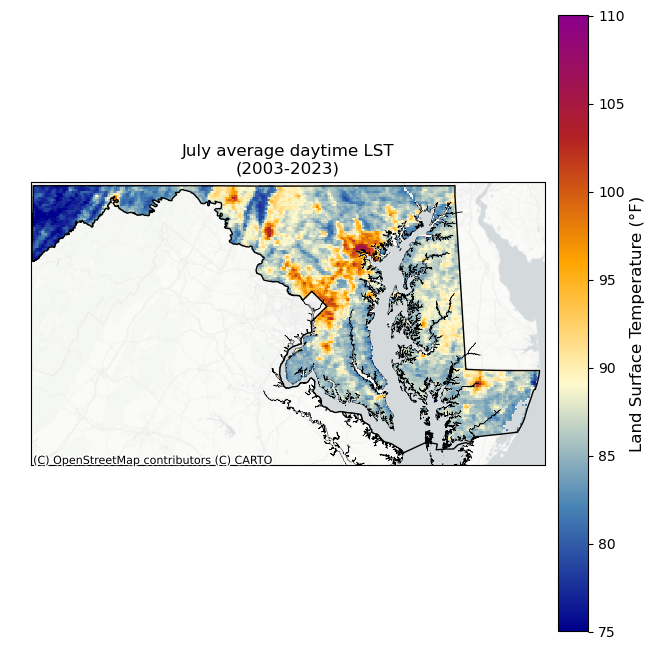

In [41]:
# With basemap: 
#DAY
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import geopandas as gpd
import contextily as cx
from matplotlib_scalebar.scalebar import ScaleBar
TOD='Day'
print(TOD)
print('\n\n')

# Define custom color scale
colors = ['black', 'blue', 'greenyellow', 'lemonchiffon', 'darkorange', 'firebrick', 'darkmagenta']
colors = ['darkblue', 'steelblue', 'lemonchiffon', 'orange', 'firebrick', 'darkmagenta']

cmap = mcolors.LinearSegmentedColormap.from_list('custom_heatmap', colors)
#cmap = 'jet'

# Plot
fig, ax = plt.subplots(figsize=(8,8))
ax.set_facecolor('white')

# Plot the dataset using custom colormap
im = average_lst_F.plot(ax=ax, cmap=cmap, vmin=75, vmax=110, add_colorbar=False)
#im = average_lst_F.plot(ax=ax, cmap=cmap, vmin=20, vmax=60, add_colorbar=False)
#im = composite_mean['LST'].plot(ax=ax, cmap=cmap, vmin = 75, vmax = 105, add_colorbar=False)

# Add shapefile boundary
gdf.boundary.plot(ax=ax, edgecolor='black', alpha=1, lw = 1)
shapefile_path = r"/panfs/ccds02/nobackup/people/slsmit34/shapefiles/Chesapeake_Bay_Shoreline_High_Resolution.shp"
gdf2 = gpd.read_file(shapefile_path)
gdf2 = gdf2.to_crs("EPSG:4326")
gdf2.boundary.plot(ax=ax, edgecolor='black', alpha=1, lw = 0.3)

#-79.4873028815064, 37.8865300198836, -75.04920140727783, 39.722874421633605
plt.ylim(37.8, 39.75)
plt.xlim(-79.5, -75.0)

# Add basemap
#cx.add_basemap(ax, crs=composite_mean.rio.crs.to_string(), source=cx.providers.OpenStreetMap.BlackAndWhite)
cx.add_basemap(ax, crs="EPSG:4326", source=cx.providers.CartoDB.PositronNoLabels)


# Add colorbar
cbar = fig.colorbar(im, ax=ax, orientation='vertical', pad=0.02)
cbar.set_label('Land Surface Temperature (°F)', fontsize=12)
#cbar.ax.tick_params(labelsize=10)

# Set labels and grid
ax.set_xlabel(' ', fontsize=12)
ax.set_ylabel(' ', fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

# Add scale bar
#scalebar = ScaleBar(1 / 1609.34, units="mi", location="lower left", scale_loc="bottom",
                    #length_fraction=0.2, color="black")
#ax.add_artist(scalebar)

# Title (optional)
ax.set_title('    ', fontsize=14)
props = dict(boxstyle='round', facecolor='whitesmoke', alpha=0.5)
ax.set_xticks([])
ax.set_yticks([])

# Export as png
plt.title('July average daytime LST\n(2003-2023)')

coordDict = {
            'Salisbury': [38.37034548784061, -75.58516762162914],
            'Hagerstown': [39.65259759024378, -77.7130892831205],
            'Frederick': [39.43177706683794, -77.43813311337723],
            'Rockville': [39.032183386991164, -77.13926771148228],
            'Baltimore': [39.30530883113323, -76.6282946891492],
            'BelAir': [39.52709263840793, -76.33130987233803],
            'Catoctin' : [39.64832819775264,-77.46994722557348],
            'Patapsco' : [39.346603303846706, -76.8813559059837],
            'Patuxent' : [39.23790317202646, -77.05816192894771]
        }
locKeys = ['BelAir', 'Catoctin', 'Baltimore']
for locKey in locKeys:
    #plt.scatter(coordDict[locKey][1], coordDict[locKey][0], label = coordDict[locKey], edgecolors = 'black', s = 40, linewidth = 2,  facecolor = 'none')
    #plt.scatter(coordDict[locKey][1], coordDict[locKey][0], label = coordDict[locKey], edgecolors = 'green', s = 50,  facecolor = 'none')
    print('hi')
output_filename = f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/MODISA_LST/MD_LST_Jul.png'
plt.savefig(output_filename, format='png', dpi = 300)
plt.show()

#plt.tight_layout()

#38.5, 39.1

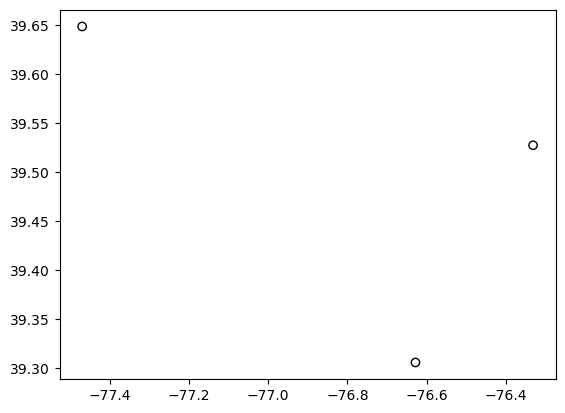

In [78]:
coordDict = {
            'Salisbury': [38.37034548784061, -75.58516762162914],
            'Hagerstown': [39.65259759024378, -77.7130892831205],
            'Frederick': [39.43177706683794, -77.43813311337723],
            'Rockville': [39.032183386991164, -77.13926771148228],
            'Baltimore': [39.30530883113323, -76.6282946891492],
            'BelAir': [39.52709263840793, -76.33130987233803],
            'Catoctin' : [39.64832819775264,-77.46994722557348],
            'Patapsco' : [39.346603303846706, -76.8813559059837],
            'Patuxent' : [39.23790317202646, -77.05816192894771]
        }
locKeys = ['BelAir', 'Catoctin', 'Baltimore']
for locKey in keys:
    plt.scatter(coordDict[locKey][1], coordDict[locKey][0], label = coordDict[locKey], edgecolors = 'black', facecolor = 'none')